In [ ]:
from dash import Dash, html, callback, Output, Input, State, dcc
from dash.dependencies import ALL
import dash
import json

app = Dash(__name__)

# Define the sectors with bolder colors
sectors = [
    {"name": "Technology", "color": "#D32F2F", "industries": ["Software", "Hardware", "IT Services"]},
    {"name": "Healthcare", "color": "#1976D2", "industries": ["Pharmaceuticals", "Medical Devices", "Healthcare Services"]},
    {"name": "Finance", "color": "#388E3C", "industries": ["Banking", "Insurance", "Investment Services"]},
    {"name": "Energy", "color": "#F57C00", "industries": ["Oil & Gas", "Renewable Energy", "Utilities"]},
    {"name": "Consumer Goods", "color": "#512DA8", "industries": ["Food & Beverage", "Household Products", "Apparel"]},
    {"name": "Utilities", "color": "#00796B", "industries": ["Electric", "Water", "Gas"]},
    {"name": "Real Estate", "color": "#C2185B", "industries": ["Residential", "Commercial", "Industrial"]},
    {"name": "Telecommunications", "color": "#689F38", "industries": ["Mobile", "Broadband", "Satellite"]},
    {"name": "Materials", "color": "#0288D1", "industries": ["Chemicals", "Metals & Mining", "Construction Materials"]},
    {"name": "Industrials", "color": "#7B1FA2", "industries": ["Aerospace & Defense", "Machinery", "Industrial Services"]},
    {"name": "Consumer Services", "color": "#AFB42B", "industries": ["Retail", "Travel & Leisure", "Media"]},
    {"name": "Transportation", "color": "#FBC02D", "industries": ["Airlines", "Railroads", "Logistics"]}
]

# Generate the initial sector tiles
initial_sector_tiles = [
    html.Div(
        sector["name"],
        id={'type': 'sector-box', 'index': i}, 
        n_clicks=0,
        style={
            'display': 'flex',
            'justifyContent': 'center',
            'alignItems': 'center',
            'border': '2px solid #fff',
            'borderRadius': '15px',
            'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
            'fontSize': '14px', 
            'cursor': 'pointer',
            'backgroundColor': sector["color"],
            'color': '#fff',
            'textAlign': 'center',
            'fontWeight': 'bold',
            'width': '100px',
            'height': '100px',
            'padding': '5px',
            'textOverflow': 'ellipsis',
            'wordWrap': 'break-word',
            'overflow': 'hidden',
            'transition': 'transform 0.2s, box-shadow 0.2s'
        },
        className='sector-box'
    ) for i, sector in enumerate(sectors)
]

# App layout
app.layout = html.Div([
    dcc.Store(id='selected-sectors', data=[]),  # Store to keep track of selected sectors
    dcc.Store(id='industries-view', data=False),  # Store to track if industries should be displayed

    # Large Square Container
    html.Div(
        id='sector-container',
        children=initial_sector_tiles,  # Set the initial children to the sector tiles
        style={
            'display': 'grid',
            'gridTemplateColumns': 'repeat(4, 1fr)',
            'gridTemplateRows': 'repeat(3, 1fr)',
            'gap': '10px',
            'justifyItems': 'center',
            'alignItems': 'center',
            'width': '500px',
            'height': '370px',
            'border': '2px solid black',
            'borderRadius': '20px',
            'padding': '10px',
            'boxShadow': '0px 10px 15px rgba(0, 0, 0, 0.2)',
            'backgroundColor': '#f9f9f9',
            'margin': '50px auto'
        }
    ),

    # "Okay" Button
    html.Button('Okay', id='okay-button', n_clicks=0, style={
        'display': 'block',
        'margin': '20px auto',
        'padding': '10px 20px',
        'fontSize': '16px',
        'fontWeight': 'bold',
        'color': '#fff',
        'backgroundColor': '#007BFF',
        'border': 'none',
        'borderRadius': '5px',
        'cursor': 'pointer',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    }),

    # Output Box for Displaying Selected Sectors
    html.Div(id='selected-sector', style={
        'width': '460px', 
        'height': 'auto', 
        'border': '2px solid black', 
        'borderRadius': '10px',
        'padding': '10px', 
        'margin': '20px auto',
        'textAlign': 'center',
        'fontSize': '20px',
        'fontWeight': 'bold',
        'backgroundColor': '#fff',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    })
])

# Callback to handle multiple selections and industry display
@callback(
    Output('selected-sectors', 'data'),
    Output('sector-container', 'children'),
    Output('industries-view', 'data'),
    Input({'type': 'sector-box', 'index': ALL}, 'n_clicks'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data'),
    State('industries-view', 'data')
)
def update_selected_sectors_or_industries(n_clicks, okay_clicks, selected_sectors, industries_view):
    ctx = dash.callback_context

    if not ctx.triggered:
        return selected_sectors, dash.no_update, dash.no_update

    triggered_id = ctx.triggered[0]['prop_id'].split('.')[0]

    if 'sector-box' in triggered_id:
        clicked_index = json.loads(triggered_id)['index']
        selected_sector = sectors[clicked_index]["name"]

        # Toggle selection
        if selected_sector in selected_sectors:
            selected_sectors.remove(selected_sector)
        else:
            selected_sectors.append(selected_sector)

        # Update the styles of the boxes to reflect selection
        updated_children = [
            html.Div(
                sector["name"],
                id={'type': 'sector-box', 'index': i}, 
                n_clicks=0,
                style={
                    'display': 'flex',
                    'justifyContent': 'center',
                    'alignItems': 'center',
                    'border': '2px solid #fff',
                    'borderRadius': '15px',
                    'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                    'fontSize': '14px',
                    'cursor': 'pointer',
                    'backgroundColor': sector["color"] if sector["name"] not in selected_sectors else '#000000',
                    'color': '#fff' if sector["name"] not in selected_sectors else '#00ff00',
                    'textAlign': 'center',
                    'fontWeight': 'bold',
                    'width': '100px',
                    'height': '100px',
                    'padding': '5px',
                    'textOverflow': 'ellipsis',
                    'wordWrap': 'break-word',
                    'overflow': 'hidden',
                    'transition': 'transform 0.2s, box-shadow 0.2s'
                },
                className='sector-box'
            ) for i, sector in enumerate(sectors)
        ]

        return selected_sectors, updated_children, industries_view

    elif 'okay-button' in triggered_id and okay_clicks > 0:
        industries_view = True

        # Generate industry tiles
        industry_tiles = []
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    industry_tiles.append(
                        html.Div(
                            industry,
                            style={
                                'display': 'flex',
                                'justifyContent': 'center',
                                'alignItems': 'center',
                                'border': '2px solid #fff',
                                'borderRadius': '15px',
                                'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                                'fontSize': '14px',
                                'backgroundColor': '#333',
                                'color': '#fff',
                                'textAlign': 'center',
                                'fontWeight': 'bold',
                                'width': '100px',
                                'height': '100px',
                                'padding': '5px',
                                'textOverflow': 'ellipsis',
                                'wordWrap': 'break-word',
                                'overflow': 'hidden',
                                'transition': 'transform 0.2s, box-shadow 0.2s'
                            },
                            className='industry-box'
                        )
                    )

        return selected_sectors, industry_tiles, industries_view

    return selected_sectors, dash.no_update, industries_view

# Callback to handle the "Okay" button click
@callback(
    Output('selected-sector', 'children'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data')
)
def handle_okay_click(n_clicks, selected_sectors):
    if n_clicks > 0:
        if not selected_sectors:
            return "No sectors selected"
        return f"Selected Sectors: {', '.join(selected_sectors)}"
    return "Click 'Okay' to confirm your selections"

if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
    {"name": "Technology", "color": "#D32F2F", "industries": ["Software", "Hardware", "IT Services"]},
    {"name": "Healthcare", "color": "#1976D2", "industries": ["Pharmaceuticals", "Medical Devices", "Healthcare Services"]},
    {"name": "Finance", "color": "#388E3C", "industries": ["Banking", "Insurance", "Investment Services"]},
    {"name": "Energy", "color": "#F57C00", "industries": ["Oil & Gas", "Renewable Energy", "Utilities"]},
    {"name": "Consumer Goods", "color": "#512DA8", "industries": ["Food & Beverage", "Household Products", "Apparel"]},
    {"name": "Utilities", "color": "#00796B", "industries": ["Electric", "Water", "Gas"]},
    {"name": "Real Estate", "color": "#C2185B", "industries": ["Residential", "Commercial", "Industrial"]},
    {"name": "Telecommunications", "color": "#689F38", "industries": ["Mobile", "Broadband", "Satellite"]},
    {"name": "Materials", "color": "#0288D1", "industries": ["Chemicals", "Metals & Mining", "Construction Materials"]},
    {"name": "Industrials", "color": "#7B1FA2", "industries": ["Aerospace & Defense", "Machinery", "Industrial Services"]},
    {"name": "Consumer Services", "color": "#AFB42B", "industries": ["Retail", "Travel & Leisure", "Media"]},
    {"name": "Transportation", "color": "#FBC02D", "industries": ["Airlines", "Railroads", "Logistics"]}

In [ ]:
from dash import Dash, html, callback, Output, Input, State, dcc
from dash.dependencies import ALL
import dash
import json

app = Dash(__name__)

# Define the sectors with bolder colors
sectors = [
    {"name": "Technology", "color": "#D32F2F", "industries": ["Software", "Hardware", "IT Services"]},
    {"name": "Healthcare", "color": "#1976D2", "industries": ["Pharmaceuticals", "Medical Devices", "Healthcare Services"]},
    {"name": "Finance", "color": "#388E3C", "industries": ["Banking", "Insurance", "Investment Services"]},
    {"name": "Energy", "color": "#F57C00", "industries": ["Oil & Gas", "Renewable Energy", "Utilities"]},
    {"name": "Consumer Goods", "color": "#512DA8", "industries": ["Food & Beverage", "Household Products", "Apparel"]},
    {"name": "Utilities", "color": "#00796B", "industries": ["Electric", "Water", "Gas"]},
    {"name": "Real Estate", "color": "#C2185B", "industries": ["Residential", "Commercial", "Industrial"]},
    {"name": "Telecommunications", "color": "#689F38", "industries": ["Mobile", "Broadband", "Satellite"]},
    {"name": "Materials", "color": "#0288D1", "industries": ["Chemicals", "Metals & Mining", "Construction Materials"]},
    {"name": "Industrials", "color": "#7B1FA2", "industries": ["Aerospace & Defense", "Machinery", "Industrial Services"]},
    {"name": "Consumer Services", "color": "#AFB42B", "industries": ["Retail", "Travel & Leisure", "Media"]},
    {"name": "Transportation", "color": "#FBC02D", "industries": ["Airlines", "Railroads", "Logistics"]}
]

# Generate the initial sector tiles
initial_sector_tiles = [
    html.Div(
        sector["name"],
        id={'type': 'sector-box', 'index': i}, 
        n_clicks=0,
        style={
            'display': 'flex',
            'justifyContent': 'center',
            'alignItems': 'center',
            'border': '2px solid #fff',
            'borderRadius': '15px',
            'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
            'fontSize': '14px', 
            'cursor': 'pointer',
            'backgroundColor': sector["color"],
            'color': '#fff',
            'textAlign': 'center',
            'fontWeight': 'bold',
            'width': '100px',
            'height': '100px',
            'padding': '5px',
            'textOverflow': 'ellipsis',
            'wordWrap': 'break-word',
            'overflow': 'hidden',
            'transition': 'transform 0.2s, box-shadow 0.2s'
        },
        className='sector-box'
    ) for i, sector in enumerate(sectors)
]

# App layout
app.layout = html.Div([
    dcc.Store(id='selected-sectors', data=[]),  # Store to keep track of selected sectors

    # Large Square Container for sectors or industries
    html.Div(
        id='sector-container',
        children=initial_sector_tiles,  # Set the initial children to the sector tiles
        style={
            'display': 'grid',
            'gridTemplateColumns': 'repeat(4, 1fr)',
            'gridTemplateRows': 'repeat(3, 1fr)',
            'gap': '10px',
            'justifyItems': 'center',
            'alignItems': 'center',
            'width': '500px',
            'height': 'auto',  # Allow the container to auto-adjust its height
            'border': '2px solid black',
            'borderRadius': '20px',
            'padding': '10px',
            'boxShadow': '0px 10px 15px rgba(0, 0, 0, 0.2)',
            'backgroundColor': '#f9f9f9',
            'margin': '50px auto'
        }
    ),

    # "Okay" Button
    html.Button('Okay', id='okay-button', n_clicks=0, style={
        'display': 'block',
        'margin': '20px auto',
        'padding': '10px 20px',
        'fontSize': '16px',
        'fontWeight': 'bold',
        'color': '#fff',
        'backgroundColor': '#007BFF',
        'border': 'none',
        'borderRadius': '5px',
        'cursor': 'pointer',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    }),

    # Output Box for Displaying Selected Sectors
    html.Div(id='selected-sector', style={
        'width': '460px', 
        'height': 'auto', 
        'border': '2px solid black', 
        'borderRadius': '10px',
        'padding': '10px', 
        'margin': '20px auto',
        'textAlign': 'center',
        'fontSize': '20px',
        'fontWeight': 'bold',
        'backgroundColor': '#fff',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    })
])

# Callback to handle multiple selections and industry display
@callback(
    Output('selected-sectors', 'data'),
    Output('sector-container', 'children'),
    Input({'type': 'sector-box', 'index': ALL}, 'n_clicks'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data')
)
def update_selected_sectors_or_industries(n_clicks, okay_clicks, selected_sectors):
    ctx = dash.callback_context

    if not ctx.triggered:
        return selected_sectors, dash.no_update

    triggered_id = ctx.triggered[0]['prop_id'].split('.')[0]

    if 'sector-box' in triggered_id:
        clicked_index = json.loads(triggered_id)['index']
        selected_sector = sectors[clicked_index]["name"]

        # Toggle selection
        if selected_sector in selected_sectors:
            selected_sectors.remove(selected_sector)
        else:
            selected_sectors.append(selected_sector)

        # Update the styles of the boxes to reflect selection
        updated_children = [
            html.Div(
                sector["name"],
                id={'type': 'sector-box', 'index': i}, 
                n_clicks=0,
                style={
                    'display': 'flex',
                    'justifyContent': 'center',
                    'alignItems': 'center',
                    'border': '2px solid #fff',
                    'borderRadius': '15px',
                    'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                    'fontSize': '14px',
                    'cursor': 'pointer',
                    'backgroundColor': sector["color"] if sector["name"] not in selected_sectors else '#000000',
                    'color': '#fff' if sector["name"] not in selected_sectors else '#00ff00',
                    'textAlign': 'center',
                    'fontWeight': 'bold',
                    'width': '100px',
                    'height': '100px',
                    'padding': '5px',
                    'textOverflow': 'ellipsis',
                    'wordWrap': 'break-word',
                    'overflow': 'hidden',
                    'transition': 'transform 0.2s, box-shadow 0.2s'
                },
                className='sector-box'
            ) for i, sector in enumerate(sectors)
        ]

        return selected_sectors, updated_children

    elif 'okay-button' in triggered_id and okay_clicks > 0:
        # Replace the sector grid with the industries grid
        industry_tiles = []
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    industry_tiles.append(
                        html.Div(
                            industry,
                            style={
                                'display': 'flex',
                                'justifyContent': 'center',
                                'alignItems': 'center',
                                'border': '2px solid #fff',
                                'borderRadius': '15px',
                                'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                                'fontSize': '14px',
                                'backgroundColor': '#333',
                                'color': '#fff',
                                'textAlign': 'center',
                                'fontWeight': 'bold',
                                'width': '100px',
                                'height': '100px',
                                'padding': '5px',
                                'textOverflow': 'ellipsis',
                                'wordWrap': 'break-word',
                                'overflow': 'hidden',
                                'transition': 'transform 0.2s, box-shadow 0.2s'
                            },
                            className='industry-box'
                        )
                    )

        # Return the industries grid, adjust the button and selected sector display
        return selected_sectors, industry_tiles

    return selected_sectors, dash.no_update

# Callback to handle the "Okay" button click
@callback(
    Output('selected-sector', 'children'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data')
)
def handle_okay_click(n_clicks, selected_sectors):
    if n_clicks > 0:
        if not selected_sectors:
            return "No sectors selected"
        return f"Selected Sectors: {', '.join(selected_sectors)}"
    return "Click 'Okay' to confirm your selections"

if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
from dash import Dash, html, callback, Output, Input, State, dcc
from dash.dependencies import ALL
import dash
import json

app = Dash(__name__)

# Define the sectors with bolder colors
sectors = [
    {"name": "Technology", "color": "#D32F2F", "industries": ["Software", "Hardware", "IT Services"]},
    {"name": "Healthcare", "color": "#1976D2", "industries": ["Pharmaceuticals", "Medical Devices", "Healthcare Services"]},
    {"name": "Finance", "color": "#388E3C", "industries": ["Banking", "Insurance", "Investment Services"]},
    {"name": "Energy", "color": "#F57C00", "industries": ["Oil & Gas", "Renewable Energy", "Utilities"]},
    {"name": "Consumer Goods", "color": "#512DA8", "industries": ["Food & Beverage", "Household Products", "Apparel"]},
    {"name": "Utilities", "color": "#00796B", "industries": ["Electric", "Water", "Gas"]},
    {"name": "Real Estate", "color": "#C2185B", "industries": ["Residential", "Commercial", "Industrial"]},
    {"name": "Telecommunications", "color": "#689F38", "industries": ["Mobile", "Broadband", "Satellite"]},
    {"name": "Materials", "color": "#0288D1", "industries": ["Chemicals", "Metals & Mining", "Construction Materials"]},
    {"name": "Industrials", "color": "#7B1FA2", "industries": ["Aerospace & Defense", "Machinery", "Industrial Services"]},
    {"name": "Consumer Services", "color": "#AFB42B", "industries": ["Retail", "Travel & Leisure", "Media"]},
    {"name": "Transportation", "color": "#FBC02D", "industries": ["Airlines", "Railroads", "Logistics"]}
]

# Generate the initial sector tiles
initial_sector_tiles = [
    html.Div(
        sector["name"],
        id={'type': 'sector-box', 'index': i}, 
        n_clicks=0,
        style={
            'display': 'flex',
            'justifyContent': 'center',
            'alignItems': 'center',
            'border': '2px solid #fff',
            'borderRadius': '15px',
            'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
            'fontSize': '14px', 
            'cursor': 'pointer',
            'backgroundColor': sector["color"],
            'color': '#fff',
            'textAlign': 'center',
            'fontWeight': 'bold',
            'width': '100px',
            'height': '100px',
            'padding': '5px',
            'textOverflow': 'ellipsis',
            'wordWrap': 'break-word',
            'overflow': 'hidden',
            'transition': 'transform 0.2s, box-shadow 0.2s'
        },
        className='sector-box'
    ) for i, sector in enumerate(sectors)
]

# App layout
app.layout = html.Div([
    dcc.Store(id='selected-sectors', data=[]),  # Store to keep track of selected sectors
    dcc.Store(id='selected-industries', data=[]),  # Store to keep track of selected industries

    # Large Square Container for sectors or industries
    html.Div(
        id='sector-container',
        children=initial_sector_tiles,  # Set the initial children to the sector tiles
        style={
            'display': 'grid',
            'gridTemplateColumns': 'repeat(4, 1fr)',
            'gridTemplateRows': 'repeat(3, 1fr)',
            'gap': '10px',
            'justifyItems': 'center',
            'alignItems': 'center',
            'width': '500px',
            'height': 'auto',  # Allow the container to auto-adjust its height
            'border': '2px solid black',
            'borderRadius': '20px',
            'padding': '10px',
            'boxShadow': '0px 10px 15px rgba(0, 0, 0, 0.2)',
            'backgroundColor': '#f9f9f9',
            'margin': '50px auto'
        }
    ),

    # "Okay" Button
    html.Button('Okay', id='okay-button', n_clicks=0, style={
        'display': 'block',
        'margin': '20px auto',
        'padding': '10px 20px',
        'fontSize': '16px',
        'fontWeight': 'bold',
        'color': '#fff',
        'backgroundColor': '#007BFF',
        'border': 'none',
        'borderRadius': '5px',
        'cursor': 'pointer',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    }),

    # Output Box for Displaying Selected Sectors and Industries
    html.Div(id='selected-sector', style={
        'width': '460px', 
        'height': 'auto', 
        'border': '2px solid black', 
        'borderRadius': '10px',
        'padding': '10px', 
        'margin': '20px auto',
        'textAlign': 'center',
        'fontSize': '20px',
        'fontWeight': 'bold',
        'backgroundColor': '#fff',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    })
])

# Callback to handle sector and industry selections
@callback(
    Output('selected-sectors', 'data'),
    Output('sector-container', 'children'),
    Input({'type': 'sector-box', 'index': ALL}, 'n_clicks'),
    Input({'type': 'industry-box', 'index': ALL}, 'n_clicks'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data'),
    State('selected-industries', 'data')
)
def update_sectors_and_industries(sector_clicks, industry_clicks, okay_clicks, selected_sectors, selected_industries):
    ctx = dash.callback_context

    if not ctx.triggered:
        return selected_sectors, dash.no_update

    triggered_id = ctx.triggered[0]['prop_id'].split('.')[0]

    if 'sector-box' in triggered_id:
        clicked_index = json.loads(triggered_id)['index']
        selected_sector = sectors[clicked_index]["name"]

        # Toggle sector selection
        if selected_sector in selected_sectors:
            selected_sectors.remove(selected_sector)
        else:
            selected_sectors.append(selected_sector)

        # Update sector selection grid
        updated_children = [
            html.Div(
                sector["name"],
                id={'type': 'sector-box', 'index': i}, 
                n_clicks=0,
                style={
                    'display': 'flex',
                    'justifyContent': 'center',
                    'alignItems': 'center',
                    'border': '2px solid #fff',
                    'borderRadius': '15px',
                    'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                    'fontSize': '14px',
                    'cursor': 'pointer',
                    'backgroundColor': sector["color"] if sector["name"] not in selected_sectors else '#000000',
                    'color': '#fff' if sector["name"] not in selected_sectors else '#00ff00',
                    'textAlign': 'center',
                    'fontWeight': 'bold',
                    'width': '100px',
                    'height': '100px',
                    'padding': '5px',
                    'textOverflow': 'ellipsis',
                    'wordWrap': 'break-word',
                    'overflow': 'hidden',
                    'transition': 'transform 0.2s, box-shadow 0.2s'
                },
                className='sector-box'
            ) for i, sector in enumerate(sectors)
        ]

        return selected_sectors, updated_children

    elif 'industry-box' in triggered_id:
        clicked_index = json.loads(triggered_id)['index']
        selected_industry = selected_industries[clicked_index]

        # Toggle industry selection
        if selected_industry in selected_industries:
            selected_industries.remove(selected_industry)
        else:
            selected_industries.append(selected_industry)

    elif 'okay-button' in triggered_id and okay_clicks > 0:
        industry_tiles = []
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    industry_tiles.append(
                        html.Div(
                            industry,
                            id={'type': 'industry-box', 'index': len(industry_tiles)},  # Assign index for each industry
                            n_clicks=0,
                            style={
                                'display': 'flex',
                                'justifyContent': 'center',
                                'alignItems': 'center',
                                'border': '2px solid #fff',
                                'borderRadius': '15px',
                                'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                                'fontSize': '14px',
                                'backgroundColor': '#333',
                                'color': '#fff',
                                'textAlign': 'center',
                                'fontWeight': 'bold',
                                'width': '100px',
                                'height': '100px',
                                'padding': '5px',
                                'textOverflow': 'ellipsis',
                                'wordWrap': 'break-word',
                                'overflow': 'hidden',
                                'transition': 'transform 0.2s, box-shadow 0.2s'
                            },
                            className='industry-box'
                        )
                    )

        return selected_sectors, industry_tiles

    return selected_sectors, dash.no_update

# Callback to handle displaying the selected sectors and industries
@callback(
    Output('selected-sector', 'children'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data'),
    State('selected-industries', 'data')
)
def handle_okay_click(n_clicks, selected_sectors, selected_industries):
    if n_clicks > 0:
        if not selected_sectors and not selected_industries:
            return "No sectors or industries selected"
        selected_items = []
        if selected_sectors:
            selected_items.append(f"Selected Sectors: {', '.join(selected_sectors)}")
        if selected_industries:
            selected_items.append(f"Selected Industries: {', '.join(selected_industries)}")
        return html.Div([html.P(item) for item in selected_items])
    return "Click 'Okay' to confirm your selections"

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
from dash import Dash, html, callback, Output, Input, State, dcc
from dash.dependencies import ALL
import dash
import json

app = Dash(__name__)

# Define the sectors with bolder colors
sectors = [
    {"name": "Technology", "color": "#D32F2F", "industries": ["Software", "Hardware", "IT Services"]},
    {"name": "Healthcare", "color": "#1976D2", "industries": ["Pharmaceuticals", "Medical Devices", "Healthcare Services"]},
    {"name": "Finance", "color": "#388E3C", "industries": ["Banking", "Insurance", "Investment Services"]},
    {"name": "Energy", "color": "#F57C00", "industries": ["Oil & Gas", "Renewable Energy", "Utilities"]},
    {"name": "Consumer Goods", "color": "#512DA8", "industries": ["Food & Beverage", "Household Products", "Apparel"]},
    {"name": "Utilities", "color": "#00796B", "industries": ["Electric", "Water", "Gas"]},
    {"name": "Real Estate", "color": "#C2185B", "industries": ["Residential", "Commercial", "Industrial"]},
    {"name": "Telecommunications", "color": "#689F38", "industries": ["Mobile", "Broadband", "Satellite"]},
    {"name": "Materials", "color": "#0288D1", "industries": ["Chemicals", "Metals & Mining", "Construction Materials"]},
    {"name": "Industrials", "color": "#7B1FA2", "industries": ["Aerospace & Defense", "Machinery", "Industrial Services"]},
    {"name": "Consumer Services", "color": "#AFB42B", "industries": ["Retail", "Travel & Leisure", "Media"]},
    {"name": "Transportation", "color": "#FBC02D", "industries": ["Airlines", "Railroads", "Logistics"]}
]

# Generate the initial sector tiles
initial_sector_tiles = [
    html.Div(
        sector["name"],
        id={'type': 'sector-box', 'index': i}, 
        n_clicks=0,
        style={
            'display': 'flex',
            'justifyContent': 'center',
            'alignItems': 'center',
            'border': '2px solid #fff',
            'borderRadius': '15px',
            'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
            'fontSize': '14px', 
            'cursor': 'pointer',
            'backgroundColor': sector["color"],
            'color': '#fff',
            'textAlign': 'center',
            'fontWeight': 'bold',
            'width': '100px',
            'height': '100px',
            'padding': '5px',
            'textOverflow': 'ellipsis',
            'wordWrap': 'break-word',
            'overflow': 'hidden',
            'transition': 'transform 0.2s, box-shadow 0.2s'
        },
        className='sector-box'
    ) for i, sector in enumerate(sectors)
]

# App layout
app.layout = html.Div([
    dcc.Store(id='selected-sectors', data=[]),  # Store to keep track of selected sectors
    dcc.Store(id='selected-industries', data=[]),  # Store to keep track of selected industries

    # Large Square Container for sectors or industries
    html.Div(
        id='sector-container',
        children=initial_sector_tiles,  # Set the initial children to the sector tiles
        style={
            'display': 'grid',
            'gridTemplateColumns': 'repeat(4, 1fr)',
            'gridTemplateRows': 'repeat(3, 1fr)',
            'gap': '10px',
            'justifyItems': 'center',
            'alignItems': 'center',
            'width': '500px',
            'height': 'auto',  # Allow the container to auto-adjust its height
            'border': '2px solid black',
            'borderRadius': '20px',
            'padding': '10px',
            'boxShadow': '0px 10px 15px rgba(0, 0, 0, 0.2)',
            'backgroundColor': '#f9f9f9',
            'margin': '50px auto'
        }
    ),

    # "Okay" Button
    html.Button('Okay', id='okay-button', n_clicks=0, style={
        'display': 'block',
        'margin': '20px auto',
        'padding': '10px 20px',
        'fontSize': '16px',
        'fontWeight': 'bold',
        'color': '#fff',
        'backgroundColor': '#007BFF',
        'border': 'none',
        'borderRadius': '5px',
        'cursor': 'pointer',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    }),

    # Output Box for Displaying Selected Sectors and Industries
    html.Div(id='selected-sector', style={
        'width': '460px', 
        'height': 'auto', 
        'border': '2px solid black', 
        'borderRadius': '10px',
        'padding': '10px', 
        'margin': '20px auto',
        'textAlign': 'center',
        'fontSize': '20px',
        'fontWeight': 'bold',
        'backgroundColor': '#fff',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    })
])

# Callback to handle sector and industry selections
@callback(
    Output('selected-sectors', 'data'),
    Output('sector-container', 'children'),
    Output('selected-industries', 'data'),
    Input({'type': 'sector-box', 'index': ALL}, 'n_clicks'),
    Input({'type': 'industry-box', 'index': ALL}, 'n_clicks'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data'),
    State('selected-industries', 'data')
)
def update_sectors_and_industries(sector_clicks, industry_clicks, okay_clicks, selected_sectors, selected_industries):
    ctx = dash.callback_context

    if not ctx.triggered:
        return selected_sectors, dash.no_update, selected_industries

    triggered_id = ctx.triggered[0]['prop_id'].split('.')[0]

    if 'sector-box' in triggered_id:
        clicked_index = json.loads(triggered_id)['index']
        selected_sector = sectors[clicked_index]["name"]

        # Toggle sector selection
        if selected_sector in selected_sectors:
            selected_sectors.remove(selected_sector)
        else:
            selected_sectors.append(selected_sector)

        # Update sector selection grid
        updated_children = [
            html.Div(
                sector["name"],
                id={'type': 'sector-box', 'index': i}, 
                n_clicks=0,
                style={
                    'display': 'flex',
                    'justifyContent': 'center',
                    'alignItems': 'center',
                    'border': '2px solid #fff',
                    'borderRadius': '15px',
                    'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                    'fontSize': '14px',
                    'cursor': 'pointer',
                    'backgroundColor': sector["color"] if sector["name"] not in selected_sectors else '#000000',
                    'color': '#fff' if sector["name"] not in selected_sectors else '#00ff00',
                    'textAlign': 'center',
                    'fontWeight': 'bold',
                    'width': '100px',
                    'height': '100px',
                    'padding': '5px',
                    'textOverflow': 'ellipsis',
                    'wordWrap': 'break-word',
                    'overflow': 'hidden',
                    'transition': 'transform 0.2s, box-shadow 0.2s'
                },
                className='sector-box'
            ) for i, sector in enumerate(sectors)
        ]

        return selected_sectors, updated_children, selected_industries

    elif 'industry-box' in triggered_id:
        clicked_index = json.loads(triggered_id)['index']

        # Get the industry by mapping the index correctly
        selected_industry = None
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    if industry_counter == clicked_index:
                        selected_industry = industry
                        break
                    industry_counter += 1
            if selected_industry:
                break

        # Toggle industry selection
        if selected_industry in selected_industries:
            selected_industries.remove(selected_industry)
        else:
            selected_industries.append(selected_industry)

        # Update industry selection grid
        updated_industry_children = []
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    industry_selected = industry in selected_industries
                    updated_industry_children.append(
                        html.Div(
                            industry,
                            id={'type': 'industry-box', 'index': industry_counter},
                            n_clicks=0,
                            style={
                                'display': 'flex',
                                'justifyContent': 'center',
                                'alignItems': 'center',
                                'border': '2px solid #fff',
                                'borderRadius': '15px',
                                'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                                'fontSize': '14px',
                                'cursor': 'pointer',
                                'backgroundColor': '#00ff00' if industry_selected else '#333',
                                'color': '#fff',
                                'textAlign': 'center',
                                'fontWeight': 'bold',
                                'width': '100px',
                                'height': '100px',
                                'padding': '5px',
                                'textOverflow': 'ellipsis',
                                'wordWrap': 'break-word',
                                'overflow': 'hidden',
                                'transition': 'transform 0.2s, box-shadow 0.2s'
                            },
                            className='industry-box'
                        )
                    )
                    industry_counter += 1

        return selected_sectors, updated_industry_children, selected_industries

    elif 'okay-button' in triggered_id and okay_clicks > 0:
        industry_tiles = []
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    industry_tiles.append(
                        html.Div(
                            industry,
                            id={'type': 'industry-box', 'index': industry_counter},  # Assign index for each industry
                            n_clicks=0,
                            style={
                                'display': 'flex',
                                'justifyContent': 'center',
                                'alignItems': 'center',
                                'border': '2px solid #fff',
                                'borderRadius': '15px',
                                'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                                'fontSize': '14px',
                                'backgroundColor': '#333',
                                'color': '#fff',
                                'textAlign': 'center',
                                'fontWeight': 'bold',
                                'width': '100px',
                                'height': '100px',
                                'padding': '5px',
                                'textOverflow': 'ellipsis',
                                'wordWrap': 'break-word',
                                'overflow': 'hidden',
                                'transition': 'transform 0.2s, box-shadow 0.2s'
                            },
                            className='industry-box'
                        )
                    )
                    industry_counter += 1

        return selected_sectors, industry_tiles, selected_industries

    return selected_sectors, dash.no_update, selected_industries

# Callback to handle displaying the selected sectors and industries
@callback(
    Output('selected-sector', 'children'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data'),
    State('selected-industries', 'data')
)
def handle_okay_click(n_clicks, selected_sectors, selected_industries):
    if n_clicks > 0:
        if not selected_sectors and not selected_industries:
            return "No sectors or industries selected"
        selected_items = []
        if selected_sectors:
            selected_items.append(f"Selected Sectors: {', '.join(selected_sectors)}")
        if selected_industries:
            selected_items.append(f"Selected Industries: {', '.join(selected_industries)}")
        return html.Div([html.P(item) for item in selected_items])
    return "Click 'Okay' to confirm your selections"

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
from dash import Dash, html, callback, Output, Input, State, dcc
from dash.dependencies import ALL
import dash
import json

app = Dash(__name__)

# Define the sectors with bolder colors
sectors = [
    {"name": "Technology", "color": "#D32F2F", "industries": ["Software", "Hardware", "IT Services"]},
    {"name": "Healthcare", "color": "#1976D2", "industries": ["Pharmaceuticals", "Medical Devices", "Healthcare Services"]},
    {"name": "Finance", "color": "#388E3C", "industries": ["Banking", "Insurance", "Investment Services"]},
    {"name": "Energy", "color": "#F57C00", "industries": ["Oil & Gas", "Renewable Energy", "Utilities"]},
    {"name": "Consumer Goods", "color": "#512DA8", "industries": ["Food & Beverage", "Household Products", "Apparel"]},
    {"name": "Utilities", "color": "#00796B", "industries": ["Electric", "Water", "Gas"]},
    {"name": "Real Estate", "color": "#C2185B", "industries": ["Residential", "Commercial", "Industrial"]},
    {"name": "Telecommunications", "color": "#689F38", "industries": ["Mobile", "Broadband", "Satellite"]},
    {"name": "Materials", "color": "#0288D1", "industries": ["Chemicals", "Metals & Mining", "Construction Materials"]},
    {"name": "Industrials", "color": "#7B1FA2", "industries": ["Aerospace & Defense", "Machinery", "Industrial Services"]},
    {"name": "Consumer Services", "color": "#AFB42B", "industries": ["Retail", "Travel & Leisure", "Media"]},
    {"name": "Transportation", "color": "#FBC02D", "industries": ["Airlines", "Railroads", "Logistics"]}
]

# Generate the initial sector tiles
initial_sector_tiles = [
    html.Div(
        sector["name"],
        id={'type': 'sector-box', 'index': i}, 
        n_clicks=0,
        style={
            'display': 'flex',
            'justifyContent': 'center',
            'alignItems': 'center',
            'border': '2px solid #fff',
            'borderRadius': '15px',
            'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
            'fontSize': '14px', 
            'cursor': 'pointer',
            'backgroundColor': sector["color"],
            'color': '#fff',
            'textAlign': 'center',
            'fontWeight': 'bold',
            'width': '100px',
            'height': '100px',
            'padding': '5px',
            'textOverflow': 'ellipsis',
            'wordWrap': 'break-word',
            'overflow': 'hidden',
            'transition': 'transform 0.2s, box-shadow 0.2s'
        },
        className='sector-box'
    ) for i, sector in enumerate(sectors)
]

# App layout
app.layout = html.Div([
    dcc.Store(id='selected-sectors', data=[]),  # Store to keep track of selected sectors
    dcc.Store(id='selected-industries', data=[]),  # Store to keep track of selected industries
    dcc.Store(id='step', data='sectors'),  # Track current step: 'sectors' or 'industries'

    # Large Square Container for sectors or industries
    html.Div(
        id='sector-container',
        children=initial_sector_tiles,  # Set the initial children to the sector tiles
        style={
            'display': 'grid',
            'gridTemplateColumns': 'repeat(4, 1fr)',
            'gridTemplateRows': 'repeat(3, 1fr)',
            'gap': '10px',
            'justifyItems': 'center',
            'alignItems': 'center',
            'width': '500px',
            'height': 'auto',  # Allow the container to auto-adjust its height
            'border': '2px solid black',
            'borderRadius': '20px',
            'padding': '10px',
            'boxShadow': '0px 10px 15px rgba(0, 0, 0, 0.2)',
            'backgroundColor': '#f9f9f9',
            'margin': '50px auto'
        }
    ),

    # "Okay" Button
    html.Button('Okay', id='okay-button', n_clicks=0, style={
        'display': 'block',
        'margin': '20px auto',
        'padding': '10px 20px',
        'fontSize': '16px',
        'fontWeight': 'bold',
        'color': '#fff',
        'backgroundColor': '#007BFF',
        'border': 'none',
        'borderRadius': '5px',
        'cursor': 'pointer',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    }),

    # Output Box for Displaying Selected Sectors and Industries
    html.Div(id='selected-sector', style={
        'width': '460px', 
        'height': 'auto', 
        'border': '2px solid black', 
        'borderRadius': '10px',
        'padding': '10px', 
        'margin': '20px auto',
        'textAlign': 'center',
        'fontSize': '20px',
        'fontWeight': 'bold',
        'backgroundColor': '#fff',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    })
])

# Callback to handle sector and industry selections and to show/hide grids
@callback(
    Output('selected-sectors', 'data'),
    Output('sector-container', 'children'),
    Output('sector-container', 'style'),
    Output('selected-industries', 'data'),
    Output('step', 'data'),  # Track which step: 'sectors' or 'industries'
    Output('okay-button', 'style'),  # To hide the Okay button after final selection
    Input({'type': 'sector-box', 'index': ALL}, 'n_clicks'),
    Input({'type': 'industry-box', 'index': ALL}, 'n_clicks'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data'),
    State('selected-industries', 'data'),
    State('step', 'data')
)
def update_sectors_and_industries(sector_clicks, industry_clicks, okay_clicks, selected_sectors, selected_industries, step):
    ctx = dash.callback_context

    # Step 1: Select sectors
    if step == 'sectors' and 'sector-box' in ctx.triggered[0]['prop_id']:
        clicked_index = json.loads(ctx.triggered[0]['prop_id'].split('.')[0])['index']
        selected_sector = sectors[clicked_index]["name"]

        if selected_sector in selected_sectors:
            selected_sectors.remove(selected_sector)
        else:
            selected_sectors.append(selected_sector)

        # Update the sector grid
        updated_sector_children = [
            html.Div(
                sector["name"],
                id={'type': 'sector-box', 'index': i},
                n_clicks=0,
                style={
                    'display': 'flex',
                    'justifyContent': 'center',
                    'alignItems': 'center',
                    'border': '2px solid #fff',
                    'borderRadius': '15px',
                    'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                    'fontSize': '14px',
                    'cursor': 'pointer',
                    'backgroundColor': sector["color"] if sector["name"] not in selected_sectors else '#000000',
                    'color': '#fff' if sector["name"] not in selected_sectors else '#00ff00',
                    'textAlign': 'center',
                    'fontWeight': 'bold',
                    'width': '100px',
                    'height': '100px',
                    'padding': '5px',
                    'textOverflow': 'ellipsis',
                    'wordWrap': 'break-word',
                    'overflow': 'hidden',
                    'transition': 'transform 0.2s, box-shadow 0.2s'
                },
                className='sector-box'
            ) for i, sector in enumerate(sectors)
        ]

        return selected_sectors, updated_sector_children, dash.no_update, selected_industries, 'sectors', dash.no_update

    # Step 2: Click "Okay" to confirm sectors and show industries
    elif okay_clicks > 0 and step == 'sectors':
        updated_industry_children = []
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    updated_industry_children.append(
                        html.Div(
                            industry,
                            id={'type': 'industry-box', 'index': industry_counter},
                            n_clicks=0,
                            style={
                                'display': 'flex',
                                'justifyContent': 'center',
                                'alignItems': 'center',
                                'border': '2px solid #fff',
                                'borderRadius': '15px',
                                'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                                'fontSize': '14px',
                                'cursor': 'pointer',
                                'backgroundColor': '#333',
                                'color': '#fff',
                                'textAlign': 'center',
                                'fontWeight': 'bold',
                                'width': '100px',
                                'height': '100px',
                                'padding': '5px',
                                'textOverflow': 'ellipsis',
                                'wordWrap': 'break-word',
                                'overflow': 'hidden',
                                'transition': 'transform 0.2s, box-shadow 0.2s'
                            },
                            className='industry-box'
                        )
                    )
                    industry_counter += 1
        return selected_sectors, updated_industry_children, dash.no_update, selected_industries, 'industries', dash.no_update

    # Step 3: Select industries
    elif step == 'industries' and 'industry-box' in ctx.triggered[0]['prop_id']:
        clicked_index = json.loads(ctx.triggered[0]['prop_id'].split('.')[0])['index']

        # Identify the selected industry
        selected_industry = None
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    if industry_counter == clicked_index:
                        selected_industry = industry
                        break
                    industry_counter += 1
            if selected_industry:
                break

        # Toggle the selected industry
        if selected_industry in selected_industries:
            selected_industries.remove(selected_industry)
        else:
            selected_industries.append(selected_industry)

        # Update the industry grid
        updated_industry_children = []
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    industry_selected = industry in selected_industries
                    updated_industry_children.append(
                        html.Div(
                            industry,
                            id={'type': 'industry-box', 'index': industry_counter},
                            n_clicks=0,
                            style={
                                'display': 'flex',
                                'justifyContent': 'center',
                                'alignItems': 'center',
                                'border': '2px solid #fff',
                                'borderRadius': '15px',
                                'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                                'fontSize': '14px',
                                'cursor': 'pointer',
                                'backgroundColor': '#00ff00' if industry_selected else '#333',
                                'color': '#fff',
                                'textAlign': 'center',
                                'fontWeight': 'bold',
                                'width': '100px',
                                'height': '100px',
                                'padding': '5px',
                                'textOverflow': 'ellipsis',
                                'wordWrap': 'break-word',
                                'overflow': 'hidden',
                                'transition': 'transform 0.2s, box-shadow 0.2s'
                            },
                            className='industry-box'
                        )
                    )
                    industry_counter += 1

        return selected_sectors, updated_industry_children, dash.no_update, selected_industries, 'industries', dash.no_update

    # Step 4: Click "Okay" to confirm industries and finalize, hide both grid and button
    elif okay_clicks > 0 and step == 'industries':
        return selected_sectors, [], {'display': 'none'}, selected_industries, 'industries', {'display': 'none'}

    return selected_sectors, dash.no_update, dash.no_update, selected_industries, step, dash.no_update

# Callback to display selected sectors and industries
@callback(
    Output('selected-sector', 'children'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data'),
    State('selected-industries', 'data')
)
def handle_okay_click(n_clicks, selected_sectors, selected_industries):
    if n_clicks > 0:
        if not selected_sectors and not selected_industries:
            return "No sectors or industries selected"
        selected_items = []
        if selected_sectors:
            selected_items.append(f"Selected Sectors: {', '.join(selected_sectors)}")
        if selected_industries:
            selected_items.append(f"Selected Industries: {', '.join(selected_industries)}")
        return html.Div([html.P(item) for item in selected_items])
    return "Click 'Okay' to confirm your selections"

if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
from dash import Dash, html, callback, Output, Input, State, dcc
from dash.dependencies import ALL
import dash
import json

app = Dash(__name__)

# Define the sectors with bolder colors and associated industries
sectors = [
    {"name": "Technology", "color": "#D32F2F", "industries": ["Software", "Hardware", "IT Services"]},
    {"name": "Healthcare", "color": "#1976D2", "industries": ["Pharmaceuticals", "Medical Devices", "Healthcare Services"]},
    {"name": "Finance", "color": "#388E3C", "industries": ["Banking", "Insurance", "Investment Services"]},
    {"name": "Energy", "color": "#F57C00", "industries": ["Oil & Gas", "Renewable Energy", "Utilities"]},
    {"name": "Consumer Goods", "color": "#512DA8", "industries": ["Food & Beverage", "Household Products", "Apparel"]},
    {"name": "Utilities", "color": "#00796B", "industries": ["Electric", "Water", "Gas"]},
    {"name": "Real Estate", "color": "#C2185B", "industries": ["Residential", "Commercial", "Industrial"]},
    {"name": "Telecommunications", "color": "#689F38", "industries": ["Mobile", "Broadband", "Satellite"]},
    {"name": "Materials", "color": "#0288D1", "industries": ["Chemicals", "Metals & Mining", "Construction Materials"]},
    {"name": "Industrials", "color": "#7B1FA2", "industries": ["Aerospace & Defense", "Machinery", "Industrial Services"]},
    {"name": "Consumer Services", "color": "#AFB42B", "industries": ["Retail", "Travel & Leisure", "Media"]},
    {"name": "Transportation", "color": "#FBC02D", "industries": ["Airlines", "Railroads", "Logistics"]}
]

# Generate the initial sector tiles
initial_sector_tiles = [
    html.Div(
        sector["name"],
        id={'type': 'sector-box', 'index': i}, 
        n_clicks=0,
        style={
            'display': 'flex',
            'justifyContent': 'center',
            'alignItems': 'center',
            'border': '2px solid #fff',
            'borderRadius': '15px',
            'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
            'fontSize': '14px', 
            'cursor': 'pointer',
            'backgroundColor': sector["color"],
            'color': '#fff',
            'textAlign': 'center',
            'fontWeight': 'bold',
            'width': '100px',
            'height': '100px',
            'padding': '5px',
            'textOverflow': 'ellipsis',
            'wordWrap': 'break-word',
            'overflow': 'hidden',
            'transition': 'transform 0.2s, box-shadow 0.2s'
        },
        className='sector-box'
    ) for i, sector in enumerate(sectors)
]

# App layout
app.layout = html.Div([
    dcc.Store(id='selected-sectors', data=[]),  # Store to keep track of selected sectors
    dcc.Store(id='selected-industries', data=[]),  # Store to keep track of selected industries
    dcc.Store(id='step', data='sectors'),  # Track current step: 'sectors' or 'industries'

    # Large Square Container for sectors or industries
    html.Div(
        id='sector-container',
        children=initial_sector_tiles,  # Set the initial children to the sector tiles
        style={
            'display': 'grid',
            'gridTemplateColumns': 'repeat(4, 1fr)',
            'gridTemplateRows': 'repeat(3, 1fr)',
            'gap': '10px',
            'justifyItems': 'center',
            'alignItems': 'center',
            'width': '500px',
            'height': 'auto',  # Allow the container to auto-adjust its height
            'border': '2px solid black',
            'borderRadius': '20px',
            'padding': '10px',
            'boxShadow': '0px 10px 15px rgba(0, 0, 0, 0.2)',
            'backgroundColor': '#f9f9f9',
            'margin': '50px auto'
        }
    ),

    # "Okay" Button
    html.Button('Okay', id='okay-button', n_clicks=0, style={
        'display': 'block',
        'margin': '20px auto',
        'padding': '10px 20px',
        'fontSize': '16px',
        'fontWeight': 'bold',
        'color': '#fff',
        'backgroundColor': '#007BFF',
        'border': 'none',
        'borderRadius': '5px',
        'cursor': 'pointer',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    }),

    # Output Box for Displaying Selected Sectors and Industries
    html.Div(id='selected-sector', style={
        'width': '460px', 
        'height': 'auto', 
        'border': '2px solid black', 
        'borderRadius': '10px',
        'padding': '10px', 
        'margin': '20px auto',
        'textAlign': 'center',
        'fontSize': '20px',
        'fontWeight': 'bold',
        'backgroundColor': '#fff',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    })
])

# Callback to handle sector and industry selections and to show/hide grids
@callback(
    Output('selected-sectors', 'data'),
    Output('sector-container', 'children'),
    Output('sector-container', 'style'),
    Output('selected-industries', 'data'),
    Output('step', 'data'),  # Track which step: 'sectors' or 'industries'
    Output('okay-button', 'style'),  # To hide the Okay button after final selection
    Input({'type': 'sector-box', 'index': ALL}, 'n_clicks'),
    Input({'type': 'industry-box', 'index': ALL}, 'n_clicks'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data'),
    State('selected-industries', 'data'),
    State('step', 'data')
)
def update_sectors_and_industries(sector_clicks, industry_clicks, okay_clicks, selected_sectors, selected_industries, step):
    ctx = dash.callback_context

    # Step 1: Select sectors
    if step == 'sectors' and 'sector-box' in ctx.triggered[0]['prop_id']:
        clicked_index = json.loads(ctx.triggered[0]['prop_id'].split('.')[0])['index']
        selected_sector = sectors[clicked_index]["name"]

        if selected_sector in selected_sectors:
            selected_sectors.remove(selected_sector)
        else:
            selected_sectors.append(selected_sector)

        # Update the sector grid
        updated_sector_children = [
            html.Div(
                sector["name"],
                id={'type': 'sector-box', 'index': i},
                n_clicks=0,
                style={
                    'display': 'flex',
                    'justifyContent': 'center',
                    'alignItems': 'center',
                    'border': '2px solid #fff',
                    'borderRadius': '15px',
                    'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                    'fontSize': '14px',
                    'cursor': 'pointer',
                    'backgroundColor': sector["color"] if sector["name"] not in selected_sectors else '#000000',
                    'color': '#fff' if sector["name"] not in selected_sectors else '#00ff00',
                    'textAlign': 'center',
                    'fontWeight': 'bold',
                    'width': '100px',
                    'height': '100px',
                    'padding': '5px',
                    'textOverflow': 'ellipsis',
                    'wordWrap': 'break-word',
                    'overflow': 'hidden',
                    'transition': 'transform 0.2s, box-shadow 0.2s'
                },
                className='sector-box'
            ) for i, sector in enumerate(sectors)
        ]

        return selected_sectors, updated_sector_children, dash.no_update, selected_industries, 'sectors', dash.no_update

    # Step 2: Click "Okay" to confirm sectors and show industries
    elif okay_clicks > 0 and step == 'sectors':
        updated_industry_children = []
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    updated_industry_children.append(
                        html.Div(
                            industry,
                            id={'type': 'industry-box', 'index': industry_counter},
                            n_clicks=0,
                            style={
                                'display': 'flex',
                                'justifyContent': 'center',
                                'alignItems': 'center',
                                'border': '2px solid #fff',
                                'borderRadius': '15px',
                                'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                                'fontSize': '14px',
                                'cursor': 'pointer',
                                'backgroundColor': sector["color"],  # Match industry card to sector color
                                'color': '#fff',
                                'textAlign': 'center',
                                'fontWeight': 'bold',
                                'width': '100px',
                                'height': '100px',
                                'padding': '5px',
                                'textOverflow': 'ellipsis',
                                'wordWrap': 'break-word',
                                'overflow': 'hidden',
                                'transition': 'transform 0.2s, box-shadow 0.2s'
                            },
                            className='industry-box',
                            **{"data-sector-color": sector["color"]}
                        )
                    )
                    industry_counter += 1
        return selected_sectors, updated_industry_children, dash.no_update, selected_industries, 'industries', dash.no_update

    # Step 3: Select industries
    elif step == 'industries' and 'industry-box' in ctx.triggered[0]['prop_id']:
        clicked_index = json.loads(ctx.triggered[0]['prop_id'].split('.')[0])['index']

        # Identify the selected industry and its sector color
        selected_industry = None
        sector_color = None
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    if industry_counter == clicked_index:
                        selected_industry = industry
                        sector_color = sector["color"]
                        break
                    industry_counter += 1
            if selected_industry:
                break

        # Toggle the selected industry
        if selected_industry in selected_industries:
            selected_industries.remove(selected_industry)
        else:
            selected_industries.append(selected_industry)

        # Update the industry grid with the new selection and color change
        updated_industry_children = []
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    industry_selected = industry in selected_industries
                    updated_industry_children.append(
                        html.Div(
                            industry,
                            id={'type': 'industry-box', 'index': industry_counter},
                            n_clicks=0,
                            style={
                                'display': 'flex',
                                'justifyContent': 'center',
                                'alignItems': 'center',
                                'border': '2px solid #fff',
                                'borderRadius': '15px',
                                'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                                'fontSize': '14px',
                                'cursor': 'pointer',
                                'backgroundColor': "#000000" if industry_selected else sector["color"],  # Change color if selected
                                'color': "#00ff00" if industry_selected else "#fff",
                                'textAlign': 'center',
                                'fontWeight': 'bold',
                                'width': '100px',
                                'height': '100px',
                                'padding': '5px',
                                'textOverflow': 'ellipsis',
                                'wordWrap': 'break-word',
                                'overflow': 'hidden',
                                'transition': 'transform 0.2s, box-shadow 0.2s'
                            },
                            className='industry-box'
                        )
                    )
                    industry_counter += 1

        return selected_sectors, updated_industry_children, dash.no_update, selected_industries, 'industries', dash.no_update

    # Step 4: Click "Okay" to confirm industries and finalize, hide both grid and button
    elif okay_clicks > 0 and step == 'industries':
        return selected_sectors, [], {'display': 'none'}, selected_industries, 'industries', {'display': 'none'}

    return selected_sectors, dash.no_update, dash.no_update, selected_industries, step, dash.no_update

# Callback to display selected sectors and industries
@callback(
    Output('selected-sector', 'children'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data'),
    State('selected-industries', 'data')
)
def handle_okay_click(n_clicks, selected_sectors, selected_industries):
    if n_clicks > 0:
        if not selected_sectors and not selected_industries:
            return "No sectors or industries selected"
        selected_items = []
        if selected_sectors:
            selected_items.append(f"Selected Sectors: {', '.join(selected_sectors)}")
        if selected_industries:
            selected_items.append(f"Selected Industries: {', '.join(selected_industries)}")
        return html.Div([html.P(item) for item in selected_items])
    return "Click 'Okay' to confirm your selections"

if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
from dash import Dash, html, callback, Output, Input, State, dcc
from dash.dependencies import ALL
import plotly.express as px
import dash
import json

app = Dash(__name__)

# Define the sectors with bolder colors and associated industries
sectors = [
    {"name": "Technology", "color": "#D32F2F", "industries": ["Software", "Hardware", "IT Services"]},
    {"name": "Healthcare", "color": "#1976D2", "industries": ["Pharmaceuticals", "Medical Devices", "Healthcare Services"]},
    {"name": "Finance", "color": "#388E3C", "industries": ["Banking", "Insurance", "Investment Services"]},
    {"name": "Energy", "color": "#F57C00", "industries": ["Oil & Gas", "Renewable Energy", "Utilities"]},
    {"name": "Consumer Goods", "color": "#512DA8", "industries": ["Food & Beverage", "Household Products", "Apparel"]},
    {"name": "Utilities", "color": "#00796B", "industries": ["Electric", "Water", "Gas"]},
    {"name": "Real Estate", "color": "#C2185B", "industries": ["Residential", "Commercial", "Industrial"]},
    {"name": "Telecommunications", "color": "#689F38", "industries": ["Mobile", "Broadband", "Satellite"]},
    {"name": "Materials", "color": "#0288D1", "industries": ["Chemicals", "Metals & Mining", "Construction Materials"]},
    {"name": "Industrials", "color": "#7B1FA2", "industries": ["Aerospace & Defense", "Machinery", "Industrial Services"]},
    {"name": "Consumer Services", "color": "#AFB42B", "industries": ["Retail", "Travel & Leisure", "Media"]},
    {"name": "Transportation", "color": "#FBC02D", "industries": ["Airlines", "Railroads", "Logistics"]}
]

# Generate the initial sector tiles
initial_sector_tiles = [
    html.Div(
        sector["name"],
        id={'type': 'sector-box', 'index': i}, 
        n_clicks=0,
        style={
            'display': 'flex',
            'justifyContent': 'center',
            'alignItems': 'center',
            'border': '2px solid #fff',
            'borderRadius': '15px',
            'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
            'fontSize': '14px', 
            'cursor': 'pointer',
            'backgroundColor': sector["color"],
            'color': '#fff',
            'textAlign': 'center',
            'fontWeight': 'bold',
            'width': '100px',
            'height': '100px',
            'padding': '5px',
            'textOverflow': 'ellipsis',
            'wordWrap': 'break-word',
            'overflow': 'hidden',
            'transition': 'transform 0.2s, box-shadow 0.2s'
        },
        className='sector-box'
    ) for i, sector in enumerate(sectors)
]

# Create a sample scatterplot
def create_scatter_plot():
    df = px.data.iris()  # Example data
    fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species', size='petal_length', hover_data=['species'])
    return fig

# App layout
app.layout = html.Div([
    dcc.Store(id='selected-sectors', data=[]),  # Store to keep track of selected sectors
    dcc.Store(id='selected-industries', data=[]),  # Store to keep track of selected industries
    dcc.Store(id='step', data='scatter'),  # Track current step: 'sectors' or 'industries'
    dcc.Graph(id='scatter-plot', figure=create_scatter_plot()),  # Display scatter plot at the start

    # Large Square Container for sectors or industries
    html.Div(
        id='sector-container',
        children=initial_sector_tiles,  # Set the initial children to the sector tiles
        style={
            'display': 'none', # Initially hidden
            'gridTemplateColumns': 'repeat(4, 1fr)',
            'gridTemplateRows': 'repeat(3, 1fr)',
            'gap': '10px',
            'justifyItems': 'center',
            'alignItems': 'center',
            'width': '500px',
            'height': 'auto',  # Allow the container to auto-adjust its height
            'border': '2px solid black',
            'borderRadius': '20px',
            'padding': '10px',
            'boxShadow': '0px 10px 15px rgba(0, 0, 0, 0.2)',
            'backgroundColor': '#f9f9f9',
            'margin': '50px auto'
        }
    ),

    # "Okay" Button
    html.Button('Okay', id='okay-button', n_clicks=0, style={
        'display': 'none', #Initially hidden
        'margin': '20px auto',
        'padding': '10px 20px',
        'fontSize': '16px',
        'fontWeight': 'bold',
        'color': '#fff',
        'backgroundColor': '#007BFF',
        'border': 'none',
        'borderRadius': '5px',
        'cursor': 'pointer',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    }),

    # Output Box for Displaying Selected Sectors and Industries
    html.Div(id='selected-sector', style={
        'width': '460px', 
        'height': 'auto', 
        'border': '2px solid black', 
        'borderRadius': '10px',
        'padding': '10px', 
        'margin': '20px auto',
        'textAlign': 'center',
        'fontSize': '20px',
        'fontWeight': 'bold',
        'backgroundColor': '#fff',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    })
])

# Callback to handle sector and industry selections and to show/hide grids
@callback(
    Output('selected-sectors', 'data'),
    Output('sector-container', 'children'),
    Output('sector-container', 'style'),
    Output('selected-industries', 'data'),
    Output('step', 'data'),  # Track which step: 'sectors' or 'industries'
    Output('okay-button', 'style'),  # To hide the Okay button after final selection
    Output('scatter-plot', 'style'), # Update scatterplot
    Input('scatter-plot', 'clickData'),
    Input({'type': 'sector-box', 'index': ALL}, 'n_clicks'),
    Input({'type': 'industry-box', 'index': ALL}, 'n_clicks'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data'),
    State('selected-industries', 'data'),
    State('step', 'data')
)
def update_sectors_and_industries(click_data, sector_clicks, industry_clicks, okay_clicks, selected_sectors, selected_industries, step):
    ctx = dash.callback_context

    if step == 'scatter' and click_data:
        # Hide scatterplot and show grid with 'Okay' button
        return selected_sectors, initial_sector_tiles, {'display': 'grid'}, selected_industries, "sectors", {'display': 'block'}, {'display': 'none'}
    
    # Step 1: Select sectors
    if step == 'sectors' and ctx.triggered and 'sector-box' in ctx.triggered[0]['prop_id']:
        clicked_index = json.loads(ctx.triggered[0]['prop_id'].split('.')[0])['index']
        selected_sector = sectors[clicked_index]["name"]

        if selected_sector in selected_sectors:
            selected_sectors.remove(selected_sector)
        else:
            selected_sectors.append(selected_sector)

        # Update the sector grid
        updated_sector_children = [
            html.Div(
                sector["name"],
                id={'type': 'sector-box', 'index': i},
                n_clicks=0,
                style={
                    'display': 'flex',
                    'justifyContent': 'center',
                    'alignItems': 'center',
                    'border': '2px solid #fff',
                    'borderRadius': '15px',
                    'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                    'fontSize': '14px',
                    'cursor': 'pointer',
                    'backgroundColor': sector["color"] if sector["name"] not in selected_sectors else '#000000',
                    'color': '#fff' if sector["name"] not in selected_sectors else '#00ff00',
                    'textAlign': 'center',
                    'fontWeight': 'bold',
                    'width': '100px',
                    'height': '100px',
                    'padding': '5px',
                    'textOverflow': 'ellipsis',
                    'wordWrap': 'break-word',
                    'overflow': 'hidden',
                    'transition': 'transform 0.2s, box-shadow 0.2s'
                },
                className='sector-box'
            ) for i, sector in enumerate(sectors)
        ]

        return selected_sectors, updated_sector_children, dash.no_update, selected_industries, 'sectors', dash.no_update, dash.no_update

    # Step 2: Click "Okay" to confirm sectors and show industries
    if okay_clicks > 0 and step == 'sectors':
        updated_industry_children = []
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    updated_industry_children.append(
                        html.Div(
                            industry,
                            id={'type': 'industry-box', 'index': industry_counter},
                            n_clicks=0,
                            style={
                                'display': 'flex',
                                'justifyContent': 'center',
                                'alignItems': 'center',
                                'border': '2px solid #fff',
                                'borderRadius': '15px',
                                'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                                'fontSize': '14px',
                                'cursor': 'pointer',
                                'backgroundColor': sector["color"],  # Match industry card to sector color
                                'color': '#fff',
                                'textAlign': 'center',
                                'fontWeight': 'bold',
                                'width': '100px',
                                'height': '100px',
                                'padding': '5px',
                                'textOverflow': 'ellipsis',
                                'wordWrap': 'break-word',
                                'overflow': 'hidden',
                                'transition': 'transform 0.2s, box-shadow 0.2s'
                            },
                            className='industry-box',
                            **{"data-sector-color": sector["color"]}
                        )
                    )
                    industry_counter += 1
        return selected_sectors, updated_industry_children, dash.no_update, selected_industries, 'industries', dash.no_update, dash.no_update

    if step == 'industries' and 'industry-box' in ctx.triggered[0]['prop_id']:
        clicked_index = json.loads(ctx.triggered[0]['prop_id'].split('.')[0])['index']

        # Identify the selected industry and its sector color
        selected_industry = None
        sector_color = None
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    if industry_counter == clicked_index:
                        selected_industry = industry
                        sector_color = sector["color"]
                        break
                    industry_counter += 1
            if selected_industry:
                break

        # Toggle the selected industry
        if selected_industry in selected_industries:
            selected_industries.remove(selected_industry)
        else:
            selected_industries.append(selected_industry)

        # Update the industry grid with the new selection and color change
        updated_industry_children = []
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    industry_selected = industry in selected_industries
                    updated_industry_children.append(
                        html.Div(
                            industry,
                            id={'type': 'industry-box', 'index': industry_counter},
                            n_clicks=0,
                            style={
                                'display': 'flex',
                                'justifyContent': 'center',
                                'alignItems': 'center',
                                'border': '2px solid #fff',
                                'borderRadius': '15px',
                                'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                                'fontSize': '14px',
                                'cursor': 'pointer',
                                'backgroundColor': "#000000" if industry_selected else sector["color"],  # Change color if selected
                                'color': "#00ff00" if industry_selected else "#fff",
                                'textAlign': 'center',
                                'fontWeight': 'bold',
                                'width': '100px',
                                'height': '100px',
                                'padding': '5px',
                                'textOverflow': 'ellipsis',
                                'wordWrap': 'break-word',
                                'overflow': 'hidden',
                                'transition': 'transform 0.2s, box-shadow 0.2s'
                            },
                            className='industry-box'
                        )
                    )
                    industry_counter += 1

        return selected_sectors, updated_industry_children, dash.no_update, selected_industries, 'industries', dash.no_update, dash.no_update

    # Step 4: Click "Okay" to confirm industries and finalize, hide both grid and button
    if okay_clicks > 0 and step == 'industries':
        return selected_sectors, [], {'display': 'none'}, selected_industries, 'industries', {'display': 'none'}, dash.no_update

    return selected_sectors, dash.no_update, dash.no_update, selected_industries, step, dash.no_update, dash.no_update

# Callback to display selected sectors and industries
@callback(
    Output('selected-sector', 'children'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data'),
    State('selected-industries', 'data')
)
def handle_okay_click(n_clicks, selected_sectors, selected_industries):
    if n_clicks > 0:
        if not selected_sectors and not selected_industries:
            return "No sectors or industries selected"
        selected_items = []
        if selected_sectors:
            selected_items.append(f"Selected Sectors: {', '.join(selected_sectors)}")
        if selected_industries:
            selected_items.append(f"Selected Industries: {', '.join(selected_industries)}")
        return html.Div([html.P(item) for item in selected_items])
    return "Click 'Okay' to confirm your selections"

if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
from dash import Dash, html, callback, Output, Input, State, dcc
from dash.dependencies import ALL
import plotly.express as px
import dash
import json

app = Dash(__name__)

# Define the sectors with bolder colors and associated industries
sectors = [
    {"name": "Technology", "color": "#D32F2F", "industries": ["Software", "Hardware", "IT Services"]},
    {"name": "Healthcare", "color": "#1976D2", "industries": ["Pharmaceuticals", "Medical Devices", "Healthcare Services"]},
    {"name": "Finance", "color": "#388E3C", "industries": ["Banking", "Insurance", "Investment Services"]},
    {"name": "Energy", "color": "#F57C00", "industries": ["Oil & Gas", "Renewable Energy", "Utilities"]},
    {"name": "Consumer Goods", "color": "#512DA8", "industries": ["Food & Beverage", "Household Products", "Apparel"]},
    {"name": "Utilities", "color": "#00796B", "industries": ["Electric", "Water", "Gas"]},
    {"name": "Real Estate", "color": "#C2185B", "industries": ["Residential", "Commercial", "Industrial"]},
    {"name": "Telecommunications", "color": "#689F38", "industries": ["Mobile", "Broadband", "Satellite"]},
    {"name": "Materials", "color": "#0288D1", "industries": ["Chemicals", "Metals & Mining", "Construction Materials"]},
    {"name": "Industrials", "color": "#7B1FA2", "industries": ["Aerospace & Defense", "Machinery", "Industrial Services"]},
    {"name": "Consumer Services", "color": "#AFB42B", "industries": ["Retail", "Travel & Leisure", "Media"]},
    {"name": "Transportation", "color": "#FBC02D", "industries": ["Airlines", "Railroads", "Logistics"]}
]

# Generate the initial sector tiles
initial_sector_tiles = [
    html.Div(
        sector["name"],
        id={'type': 'sector-box', 'index': i}, 
        n_clicks=0,
        style={
            'display': 'flex',
            'justifyContent': 'center',
            'alignItems': 'center',
            'border': '2px solid #fff',
            'borderRadius': '15px',
            'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
            'fontSize': '14px', 
            'cursor': 'pointer',
            'backgroundColor': sector["color"],
            'color': '#fff',
            'textAlign': 'center',
            'fontWeight': 'bold',
            'width': '100px',
            'height': '100px',
            'padding': '5px',
            'textOverflow': 'ellipsis',
            'wordWrap': 'break-word',
            'overflow': 'hidden',
            'transition': 'transform 0.2s, box-shadow 0.2s'
        },
        className='sector-box'
    ) for i, sector in enumerate(sectors)
]

# Create a sample scatterplot
def create_scatter_plot():
    df = px.data.iris()  # Example data
    fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species', size='petal_length', hover_data=['species'])
    return fig

# App layout
app.layout = html.Div([
    dcc.Store(id='selected-sectors', data=[]),  # Store to keep track of selected sectors
    dcc.Store(id='selected-industries', data=[]),  # Store to keep track of selected industries
    dcc.Store(id='step', data='scatter'),  # Track current step: 'scatter', 'sectors' or 'industries'
    dcc.Graph(id='scatter-plot', figure=create_scatter_plot()),  # Display scatter plot at the start

    # Large Square Container for sectors or industries
    html.Div(
        id='sector-container',
        children=initial_sector_tiles,  # Set the initial children to the sector tiles
        style={
            'display': 'none',  # Initially hidden
            'gridTemplateColumns': 'repeat(4, 1fr)',
            'gridTemplateRows': 'repeat(3, 1fr)',
            'gap': '10px',
            'justifyItems': 'center',
            'alignItems': 'center',
            'width': '500px',
            'height': 'auto',  # Allow the container to auto-adjust its height
            'border': '2px solid black',
            'borderRadius': '20px',
            'padding': '10px',
            'boxShadow': '0px 10px 15px rgba(0, 0, 0, 0.2)',
            'backgroundColor': '#f9f9f9',
            'margin': '50px auto'
        }
    ),

    # "Okay" Button
    html.Button('Okay', id='okay-button', n_clicks=0, style={
        'display': 'none',  # Initially hidden
        'margin': '20px auto',
        'padding': '10px 20px',
        'fontSize': '16px',
        'fontWeight': 'bold',
        'color': '#fff',
        'backgroundColor': '#007BFF',
        'border': 'none',
        'borderRadius': '5px',
        'cursor': 'pointer',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    }),

    # Output Box for Displaying Selected Sectors and Industries
    html.Div(id='selected-sector', style={
        'width': '460px', 
        'height': 'auto', 
        'border': '2px solid black', 
        'borderRadius': '10px',
        'padding': '10px', 
        'margin': '20px auto',
        'textAlign': 'center',
        'fontSize': '20px',
        'fontWeight': 'bold',
        'backgroundColor': '#fff',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    })
])

# Consolidated callback to handle all state transitions
@callback(
    Output('scatter-plot', 'style'),
    Output('sector-container', 'style'),
    Output('okay-button', 'style'),
    Output('selected-sectors', 'data'),
    Output('sector-container', 'children'),
    Output('selected-industries', 'data'),
    Output('step', 'data'),
    Input('scatter-plot', 'clickData'),
    Input({'type': 'sector-box', 'index': ALL}, 'n_clicks'),
    Input({'type': 'industry-box', 'index': ALL}, 'n_clicks'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data'),
    State('selected-industries', 'data'),
    State('step', 'data')
)
def handle_interactions(click_data, sector_clicks, industry_clicks, okay_clicks, selected_sectors, selected_industries, step):
    ctx = dash.callback_context

    # Step 1: Scatterplot click to transition to sectors
    if click_data is not None and step == 'scatter':
        return {'display': 'none'}, {'display': 'grid'}, {'display': 'block'}, selected_sectors, initial_sector_tiles, selected_industries, 'sectors'

    # Step 2: Sector selection
    if step == 'sectors' and ctx.triggered and 'sector-box' in ctx.triggered[0]['prop_id']:
        clicked_index = json.loads(ctx.triggered[0]['prop_id'].split('.')[0])['index']
        selected_sector = sectors[clicked_index]["name"]

        if selected_sector in selected_sectors:
            selected_sectors.remove(selected_sector)
        else:
            selected_sectors.append(selected_sector)

        # Update sector grid appearance
        updated_sector_children = [
            html.Div(
                sector["name"],
                id={'type': 'sector-box', 'index': i},
                n_clicks=0,
                style={
                    'display': 'flex',
                    'justifyContent': 'center',
                    'alignItems': 'center',
                    'border': '2px solid #fff',
                    'borderRadius': '15px',
                    'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                    'fontSize': '14px',
                    'cursor': 'pointer',
                    'backgroundColor': sector["color"] if sector["name"] not in selected_sectors else '#000000',
                    'color': '#fff' if sector["name"] not in selected_sectors else '#00ff00',
                    'textAlign': 'center',
                    'fontWeight': 'bold',
                    'width': '100px',
                    'height': '100px',
                    'padding': '5px',
                    'textOverflow': 'ellipsis',
                    'wordWrap': 'break-word',
                    'overflow': 'hidden',
                    'transition': 'transform 0.2s, box-shadow 0.2s'
                },
                className='sector-box'
            ) for i, sector in enumerate(sectors)
        ]

        return dash.no_update, dash.no_update, dash.no_update, selected_sectors, updated_sector_children, selected_industries, 'sectors'

    # Step 3: Clicking "Okay" button to transition to industries
    if okay_clicks > 0 and step == 'sectors':
        updated_industry_children = []
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    updated_industry_children.append(
                        html.Div(
                            industry,
                            id={'type': 'industry-box', 'index': industry_counter},
                            n_clicks=0,
                            style={
                                'display': 'flex',
                                'justifyContent': 'center',
                                'alignItems': 'center',
                                'border': '2px solid #fff',
                                'borderRadius': '15px',
                                'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                                'fontSize': '14px',
                                'cursor': 'pointer',
                                'backgroundColor': sector["color"],  # Match industry card to sector color
                                'color': '#fff',
                                'textAlign': 'center',
                                'fontWeight': 'bold',
                                'width': '100px',
                                'height': '100px',
                                'padding': '5px',
                                'textOverflow': 'ellipsis',
                                'wordWrap': 'break-word',
                                'overflow': 'hidden',
                                'transition': 'transform 0.2s, box-shadow 0.2s'
                            },
                            className='industry-box',
                            **{"data-sector-color": sector["color"]}
                        )
                    )
                    industry_counter += 1
        return dash.no_update, updated_industry_children, dash.no_update, selected_sectors, updated_industry_children, selected_industries, 'industries'

    # Step 4: Industry selection
    if step == 'industries' and ctx.triggered and 'industry-box' in ctx.triggered[0]['prop_id']:
        clicked_index = json.loads(ctx.triggered[0]['prop_id'].split('.')[0])['index']

        # Identify the selected industry and its sector color
        selected_industry = None
        sector_color = None
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    if industry_counter == clicked_index:
                        selected_industry = industry
                        sector_color = sector["color"]
                        break
                    industry_counter += 1
            if selected_industry:
                break

        # Toggle the selected industry
        if selected_industry in selected_industries:
            selected_industries.remove(selected_industry)
        else:
            selected_industries.append(selected_industry)

        # Update the industry grid with the new selection and color change
        updated_industry_children = []
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    industry_selected = industry in selected_industries
                    updated_industry_children.append(
                        html.Div(
                            industry,
                            id={'type': 'industry-box', 'index': industry_counter},
                            n_clicks=0,
                            style={
                                'display': 'flex',
                                'justifyContent': 'center',
                                'alignItems': 'center',
                                'border': '2px solid #fff',
                                'borderRadius': '15px',
                                'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                                'fontSize': '14px',
                                'cursor': 'pointer',
                                'backgroundColor': "#000000" if industry_selected else sector["color"],  # Change color if selected
                                'color': "#00ff00" if industry_selected else "#fff",
                                'textAlign': 'center',
                                'fontWeight': 'bold',
                                'width': '100px',
                                'height': '100px',
                                'padding': '5px',
                                'textOverflow': 'ellipsis',
                                'wordWrap': 'break-word',
                                'overflow': 'hidden',
                                'transition': 'transform 0.2s, box-shadow 0.2s'
                            },
                            className='industry-box'
                        )
                    )
                    industry_counter += 1

        return dash.no_update, updated_industry_children, dash.no_update, selected_sectors, updated_industry_children, selected_industries, 'industries'

    return dash.no_update, dash.no_update, dash.no_update, selected_sectors, dash.no_update, selected_industries, step


# Callback to display selected sectors and industries
@callback(
    Output('selected-sector', 'children'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data'),
    State('selected-industries', 'data')
)
def handle_okay_click(n_clicks, selected_sectors, selected_industries):
    if n_clicks > 0:
        if not selected_sectors and not selected_industries:
            return "No sectors or industries selected"
        selected_items = []
        if selected_sectors:
            selected_items.append(f"Selected Sectors: {', '.join(selected_sectors)}")
        if selected_industries:
            selected_items.append(f"Selected Industries: {', '.join(selected_industries)}")
        return html.Div([html.P(item) for item in selected_items])
    return "Click 'Okay' to confirm your selections"

if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
from dash import Dash, html, callback, Output, Input, State, dcc
from dash.dependencies import ALL
import plotly.express as px
import dash
import json

app = Dash(__name__)

# Define the sectors with bolder colors and associated industries
sectors = [
    {"name": "Technology", "color": "#D32F2F", "industries": ["Software", "Hardware", "IT Services"]},
    {"name": "Healthcare", "color": "#1976D2", "industries": ["Pharmaceuticals", "Medical Devices", "Healthcare Services"]},
    {"name": "Finance", "color": "#388E3C", "industries": ["Banking", "Insurance", "Investment Services"]},
    {"name": "Energy", "color": "#F57C00", "industries": ["Oil & Gas", "Renewable Energy", "Utilities"]},
    {"name": "Consumer Goods", "color": "#512DA8", "industries": ["Food & Beverage", "Household Products", "Apparel"]},
    {"name": "Utilities", "color": "#00796B", "industries": ["Electric", "Water", "Gas"]},
    {"name": "Real Estate", "color": "#C2185B", "industries": ["Residential", "Commercial", "Industrial"]},
    {"name": "Telecommunications", "color": "#689F38", "industries": ["Mobile", "Broadband", "Satellite"]},
    {"name": "Materials", "color": "#0288D1", "industries": ["Chemicals", "Metals & Mining", "Construction Materials"]},
    {"name": "Industrials", "color": "#7B1FA2", "industries": ["Aerospace & Defense", "Machinery", "Industrial Services"]},
    {"name": "Consumer Services", "color": "#AFB42B", "industries": ["Retail", "Travel & Leisure", "Media"]},
    {"name": "Transportation", "color": "#FBC02D", "industries": ["Airlines", "Railroads", "Logistics"]}
]

# Generate the initial sector tiles
initial_sector_tiles = [
    html.Div(
        sector["name"],
        id={'type': 'sector-box', 'index': i}, 
        n_clicks=0,
        style={
            'display': 'flex',
            'justifyContent': 'center',
            'alignItems': 'center',
            'border': '2px solid #fff',
            'borderRadius': '15px',
            'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
            'fontSize': '14px', 
            'cursor': 'pointer',
            'backgroundColor': sector["color"],
            'color': '#fff',
            'textAlign': 'center',
            'fontWeight': 'bold',
            'width': '100px',
            'height': '100px',
            'padding': '5px',
            'textOverflow': 'ellipsis',
            'wordWrap': 'break-word',
            'overflow': 'hidden',
            'transition': 'transform 0.2s, box-shadow 0.2s'
        },
        className='sector-box'
    ) for i, sector in enumerate(sectors)
]

# Create a sample scatterplot
def create_scatter_plot():
    df = px.data.iris()  # Example data
    fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species', size='petal_length', hover_data=['species'])
    return fig

# App layout
app.layout = html.Div([
    dcc.Store(id='selected-sectors', data=[]),  # Store to keep track of selected sectors
    dcc.Store(id='selected-industries', data=[]),  # Store to keep track of selected industries
    dcc.Store(id='step', data='scatter'),  # Track current step: 'sectors' or 'industries'
    dcc.Graph(id='scatter-plot', figure=create_scatter_plot()),  # Display scatter plot at the start

    # Large Square Container for sectors or industries
    html.Div(
        id='sector-container',
        children=initial_sector_tiles,  # Set the initial children to the sector tiles
        style={
            'display': 'none', # Initially hidden
            'gridTemplateColumns': 'repeat(4, 1fr)',
            'gridTemplateRows': 'repeat(3, 1fr)',
            'gap': '10px',
            'justifyItems': 'center',
            'alignItems': 'center',
            'width': '500px',
            'height': 'auto',  # Allow the container to auto-adjust its height
            'border': '2px solid black',
            'borderRadius': '20px',
            'padding': '10px',
            'boxShadow': '0px 10px 15px rgba(0, 0, 0, 0.2)',
            'backgroundColor': '#f9f9f9',
            'margin': '50px auto'
        }
    ),

    # "Okay" Button
    html.Button('Okay', id='okay-button', n_clicks=0, style={
        'display': 'none', # Initially hidden
        'margin': '20px auto',
        'padding': '10px 20px',
        'fontSize': '16px',
        'fontWeight': 'bold',
        'color': '#fff',
        'backgroundColor': '#007BFF',
        'border': 'none',
        'borderRadius': '5px',
        'cursor': 'pointer',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    }),

    # Output Box for Displaying Selected Sectors and Industries
    html.Div(id='selected-sector', style={
        'width': '460px', 
        'height': 'auto', 
        'border': '2px solid black', 
        'borderRadius': '10px',
        'padding': '10px', 
        'margin': '20px auto',
        'textAlign': 'center',
        'fontSize': '20px',
        'fontWeight': 'bold',
        'backgroundColor': '#fff',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    })
])

# Callback to handle sector and industry selections and to show/hide grids
@callback(
    Output('selected-sectors', 'data'),
    Output('sector-container', 'children'),
    Output('sector-container', 'style'),
    Output('selected-industries', 'data'),
    Output('step', 'data'),  # Track which step: 'sectors' or 'industries'
    Output('okay-button', 'style'),  # To hide the Okay button after final selection
    Output('scatter-plot', 'style'),  # Update scatterplot
    Input('scatter-plot', 'clickData'),
    Input({'type': 'sector-box', 'index': ALL}, 'n_clicks'),
    Input({'type': 'industry-box', 'index': ALL}, 'n_clicks'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data'),
    State('selected-industries', 'data'),
    State('step', 'data')
)
def update_sectors_and_industries(click_data, sector_clicks, industry_clicks, okay_clicks, selected_sectors, selected_industries, step):
    ctx = dash.callback_context

    # Step 1: Scatterplot clicked, transition to sector grid
    if step == 'scatter' and click_data:
        return selected_sectors, initial_sector_tiles, {'display': 'grid'}, selected_industries, 'sectors', {'display': 'block'}, {'display': 'none'}

    # Step 2: Select sectors
    if step == 'sectors' and ctx.triggered and 'sector-box' in ctx.triggered[0]['prop_id']:
        clicked_index = json.loads(ctx.triggered[0]['prop_id'].split('.')[0])['index']
        selected_sector = sectors[clicked_index]["name"]

        if selected_sector in selected_sectors:
            selected_sectors.remove(selected_sector)
        else:
            selected_sectors.append(selected_sector)

        # Update the sector grid
        updated_sector_children = [
            html.Div(
                sector["name"],
                id={'type': 'sector-box', 'index': i},
                n_clicks=0,
                style={
                    'display': 'flex',
                    'justifyContent': 'center',
                    'alignItems': 'center',
                    'border': '2px solid #fff',
                    'borderRadius': '15px',
                    'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                    'fontSize': '14px',
                    'cursor': 'pointer',
                    'backgroundColor': sector["color"] if sector["name"] not in selected_sectors else '#000000',
                    'color': '#fff' if sector["name"] not in selected_sectors else '#00ff00',
                    'textAlign': 'center',
                    'fontWeight': 'bold',
                    'width': '100px',
                    'height': '100px',
                    'padding': '5px',
                    'textOverflow': 'ellipsis',
                    'wordWrap': 'break-word',
                    'overflow': 'hidden',
                    'transition': 'transform 0.2s, box-shadow 0.2s'
                },
                className='sector-box'
            ) for i, sector in enumerate(sectors)
        ]

        return selected_sectors, updated_sector_children, dash.no_update, selected_industries, 'sectors', dash.no_update, dash.no_update

    # Step 3: Click "Okay" to confirm sectors and show industries
    if okay_clicks > 0 and step == 'sectors':
        updated_industry_children = []
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    updated_industry_children.append(
                        html.Div(
                            industry,
                            id={'type': 'industry-box', 'index': industry_counter},
                            n_clicks=0,
                            style={
                                'display': 'flex',
                                'justifyContent': 'center',
                                'alignItems': 'center',
                                'border': '2px solid #fff',
                                'borderRadius': '15px',
                                'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                                'fontSize': '14px',
                                'cursor': 'pointer',
                                'backgroundColor': sector["color"],  # Match industry card to sector color
                                'color': '#fff',
                                'textAlign': 'center',
                                'fontWeight': 'bold',
                                'width': '100px',
                                'height': '100px',
                                'padding': '5px',
                                'textOverflow': 'ellipsis',
                                'wordWrap': 'break-word',
                                'overflow': 'hidden',
                                'transition': 'transform 0.2s, box-shadow 0.2s'
                            },
                            className='industry-box',
                            **{"data-sector-color": sector["color"]}
                        )
                    )
                    industry_counter += 1
        return selected_sectors, updated_industry_children, dash.no_update, selected_industries, 'industries', dash.no_update, dash.no_update

    # Step 4: Industry selection
    if step == 'industries' and ctx.triggered and 'industry-box' in ctx.triggered[0]['prop_id']:
        clicked_index = json.loads(ctx.triggered[0]['prop_id'].split('.')[0])['index']

        # Identify the selected industry and its sector color
        selected_industry = None
        sector_color = None
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    if industry_counter == clicked_index:
                        selected_industry = industry
                        sector_color = sector["color"]
                        break
                    industry_counter += 1
            if selected_industry:
                break

        # Toggle the selected industry
        if selected_industry in selected_industries:
            selected_industries.remove(selected_industry)
        else:
            selected_industries.append(selected_industry)

        # Update the industry grid with the new selection and color change
        updated_industry_children = []
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    industry_selected = industry in selected_industries
                    updated_industry_children.append(
                        html.Div(
                            industry,
                            id={'type': 'industry-box', 'index': industry_counter},
                            n_clicks=0,
                            style={
                                'display': 'flex',
                                'justifyContent': 'center',
                                'alignItems': 'center',
                                'border': '2px solid #fff',
                                'borderRadius': '15px',
                                'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                                'fontSize': '14px',
                                'cursor': 'pointer',
                                'backgroundColor': "#000000" if industry_selected else sector["color"],  # Change color if selected
                                'color': "#00ff00" if industry_selected else "#fff",
                                'textAlign': 'center',
                                'fontWeight': 'bold',
                                'width': '100px',
                                'height': '100px',
                                'padding': '5px',
                                'textOverflow': 'ellipsis',
                                'wordWrap': 'break-word',
                                'overflow': 'hidden',
                                'transition': 'transform 0.2s, box-shadow 0.2s'
                            },
                            className='industry-box'
                        )
                    )
                    industry_counter += 1

        return selected_sectors, updated_industry_children, dash.no_update, selected_industries, 'industries', dash.no_update, dash.no_update

    # Step 5: Click "Okay" to confirm industries and finalize, hide both grid and button
    if okay_clicks > 0 and step == 'industries':
        return selected_sectors, [], {'display': 'none'}, selected_industries, 'industries', {'display': 'none'}, dash.no_update

    return selected_sectors, dash.no_update, dash.no_update, selected_industries, step, dash.no_update, dash.no_update

# Callback to display selected sectors and industries
@callback(
    Output('selected-sector', 'children'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data'),
    State('selected-industries', 'data')
)
def handle_okay_click(n_clicks, selected_sectors, selected_industries):
    if n_clicks > 0:
        if not selected_sectors and not selected_industries:
            return "No sectors or industries selected"
        selected_items = []
        if selected_sectors:
            selected_items.append(f"Selected Sectors: {', '.join(selected_sectors)}")
        if selected_industries:
            selected_items.append(f"Selected Industries: {', '.join(selected_industries)}")
        return html.Div([html.P(item) for item in selected_items])
    return "Click 'Okay' to confirm your selections"

if __name__ == '__main__':
    app.run(debug=True)

In [1]:
from dash import Dash, html, callback, Output, Input, State, dcc
from dash.dependencies import ALL
import plotly.express as px
import dash
import json

app = Dash(__name__)

# Define the sectors with bolder colors and associated industries
sectors = [
    {"name": "Technology", "color": "#D32F2F", "industries": ["Software", "Hardware", "IT Services"]},
    {"name": "Healthcare", "color": "#1976D2", "industries": ["Pharmaceuticals", "Medical Devices", "Healthcare Services"]},
    {"name": "Finance", "color": "#388E3C", "industries": ["Banking", "Insurance", "Investment Services"]},
    {"name": "Energy", "color": "#F57C00", "industries": ["Oil & Gas", "Renewable Energy", "Utilities"]},
    {"name": "Consumer Goods", "color": "#512DA8", "industries": ["Food & Beverage", "Household Products", "Apparel"]},
    {"name": "Utilities", "color": "#00796B", "industries": ["Electric", "Water", "Gas"]},
    {"name": "Real Estate", "color": "#C2185B", "industries": ["Residential", "Commercial", "Industrial"]},
    {"name": "Telecommunications", "color": "#689F38", "industries": ["Mobile", "Broadband", "Satellite"]},
    {"name": "Materials", "color": "#0288D1", "industries": ["Chemicals", "Metals & Mining", "Construction Materials"]},
    {"name": "Industrials", "color": "#7B1FA2", "industries": ["Aerospace & Defense", "Machinery", "Industrial Services"]},
    {"name": "Consumer Services", "color": "#AFB42B", "industries": ["Retail", "Travel & Leisure", "Media"]},
    {"name": "Transportation", "color": "#FBC02D", "industries": ["Airlines", "Railroads", "Logistics"]}
]

# Generate the initial sector tiles
initial_sector_tiles = [
    html.Div(
        sector["name"],
        id={'type': 'sector-box', 'index': i}, 
        n_clicks=0,
        style={
            'display': 'flex',
            'justifyContent': 'center',
            'alignItems': 'center',
            'border': '2px solid #fff',
            'borderRadius': '15px',
            'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
            'fontSize': '14px', 
            'cursor': 'pointer',
            'backgroundColor': sector["color"],
            'color': '#fff',
            'textAlign': 'center',
            'fontWeight': 'bold',
            'width': '100px',
            'height': '100px',
            'padding': '5px',
            'textOverflow': 'ellipsis',
            'wordWrap': 'break-word',
            'overflow': 'hidden',
            'transition': 'transform 0.2s, box-shadow 0.2s'
        },
        className='sector-box'
    ) for i, sector in enumerate(sectors)
]

# Create a sample scatterplot
def create_scatter_plot():
    df = px.data.iris()  # Example data
    fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species', size='petal_length', hover_data=['species'])
    return fig

# Preset the original sector container style for reuse
SECTOR_CONTAINER_STYLE = {
    'display': 'none',  # Hidden by default
    'gridTemplateColumns': 'repeat(4, 1fr)',
    'gridTemplateRows': 'repeat(3, 1fr)',
    'gap': '10px',
    'justifyItems': 'center',
    'alignItems': 'center',
    'width': '500px',
    'height': 'auto',  # Allow the container to auto-adjust its height
    'border': '2px solid black',
    'borderRadius': '20px',
    'padding': '10px',
    'boxShadow': '0px 10px 15px rgba(0, 0, 0, 0.2)',
    'backgroundColor': '#f9f9f9',
    'margin': '50px auto'
}

# Preset the original "Okay" button style for reuse
OKAY_BUTTON_STYLE = {
    'display': 'none',  # Initially hidden
    'margin': '20px auto',
    'padding': '10px 20px',
    'fontSize': '16px',
    'fontWeight': 'bold',
    'color': '#fff',
    'backgroundColor': '#007BFF',
    'border': 'none',
    'borderRadius': '5px',
    'cursor': 'pointer',
    'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
}

# App layout
app.layout = html.Div([
    dcc.Store(id='selected-sectors', data=[]),  # Store to keep track of selected sectors
    dcc.Store(id='selected-industries', data=[]),  # Store to keep track of selected industries
    dcc.Store(id='step', data='scatter'),  # Track current step: 'sectors' or 'industries'
    dcc.Graph(id='scatter-plot', figure=create_scatter_plot()),  # Display scatter plot at the start

    # Large Square Container for sectors or industries
    html.Div(
        id='sector-container',
        children=initial_sector_tiles,  # Set the initial children to the sector tiles
        style=SECTOR_CONTAINER_STYLE
    ),

    # "Okay" Button
    html.Button('Okay', id='okay-button', n_clicks=0, style=OKAY_BUTTON_STYLE),

    # Output Box for Displaying Selected Sectors and Industries
    html.Div(id='selected-sector', style={
        'width': '460px', 
        'height': 'auto', 
        'border': '2px solid black', 
        'borderRadius': '10px',
        'padding': '10px', 
        'margin': '20px auto',
        'textAlign': 'center',
        'fontSize': '20px',
        'fontWeight': 'bold',
        'backgroundColor': '#fff',
        'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)'
    })
])

# Callback to handle sector and industry selections and to show/hide grids
@callback(
    Output('selected-sectors', 'data'),
    Output('sector-container', 'children'),
    Output('sector-container', 'style'),
    Output('selected-industries', 'data'),
    Output('step', 'data'),  # Track which step: 'sectors' or 'industries'
    Output('okay-button', 'style'),  # To hide the Okay button after final selection
    Output('scatter-plot', 'style'), # Update scatterplot
    Input('scatter-plot', 'clickData'),
    Input({'type': 'sector-box', 'index': ALL}, 'n_clicks'),
    Input({'type': 'industry-box', 'index': ALL}, 'n_clicks'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data'),
    State('selected-industries', 'data'),
    State('step', 'data')
)
def update_sectors_and_industries(click_data, sector_clicks, industry_clicks, okay_clicks, selected_sectors, selected_industries, step):
    ctx = dash.callback_context

    if step == 'scatter' and click_data:
        # Hide scatterplot and show sector grid
        return (selected_sectors, initial_sector_tiles, 
                {**SECTOR_CONTAINER_STYLE, 'display': 'grid'}, 
                selected_industries, "sectors", 
                {**OKAY_BUTTON_STYLE, 'display': 'block'},  # Show the button
                {'display': 'none'})

    if step == 'sectors' and ctx.triggered and 'sector-box' in ctx.triggered[0]['prop_id']:
        clicked_index = json.loads(ctx.triggered[0]['prop_id'].split('.')[0])['index']
        selected_sector = sectors[clicked_index]["name"]

        if selected_sector in selected_sectors:
            selected_sectors.remove(selected_sector)
        else:
            selected_sectors.append(selected_sector)

        # Update the sector grid
        updated_sector_children = [
            html.Div(
                sector["name"],
                id={'type': 'sector-box', 'index': i},
                n_clicks=0,
                style={
                    'display': 'flex',
                    'justifyContent': 'center',
                    'alignItems': 'center',
                    'border': '2px solid #fff',
                    'borderRadius': '15px',
                    'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                    'fontSize': '14px',
                    'cursor': 'pointer',
                    'backgroundColor': sector["color"] if sector["name"] not in selected_sectors else '#000000',
                    'color': '#fff' if sector["name"] not in selected_sectors else '#00ff00',
                    'textAlign': 'center',
                    'fontWeight': 'bold',
                    'width': '100px',
                    'height': '100px',
                    'padding': '5px',
                    'textOverflow': 'ellipsis',
                    'wordWrap': 'break-word',
                    'overflow': 'hidden',
                    'transition': 'transform 0.2s, box-shadow 0.2s'
                },
                className='sector-box'
            ) for i, sector in enumerate(sectors)
        ]

        return selected_sectors, updated_sector_children, dash.no_update, selected_industries, 'sectors', dash.no_update, dash.no_update

    if okay_clicks > 0 and step == 'sectors':
        # Show industries after sectors have been selected
        updated_industry_children = []
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    updated_industry_children.append(
                        html.Div(
                            industry,
                            id={'type': 'industry-box', 'index': industry_counter},
                            n_clicks=0,
                            style={
                                'display': 'flex',
                                'justifyContent': 'center',
                                'alignItems': 'center',
                                'border': '2px solid #fff',
                                'borderRadius': '15px',
                                'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                                'fontSize': '14px',
                                'cursor': 'pointer',
                                'backgroundColor': sector["color"],  # Match industry card to sector color
                                'color': '#fff',
                                'textAlign': 'center',
                                'fontWeight': 'bold',
                                'width': '100px',
                                'height': '100px',
                                'padding': '5px',
                                'textOverflow': 'ellipsis',
                                'wordWrap': 'break-word',
                                'overflow': 'hidden',
                                'transition': 'transform 0.2s, box-shadow 0.2s'
                            },
                            className='industry-box',
                            **{"data-sector-color": sector["color"]}
                        )
                    )
                    industry_counter += 1
        return selected_sectors, updated_industry_children, {**SECTOR_CONTAINER_STYLE, 'display': 'grid'}, selected_industries, 'industries', {**OKAY_BUTTON_STYLE, 'display': 'block'}, dash.no_update

    if step == 'industries' and 'industry-box' in ctx.triggered[0]['prop_id']:
        clicked_index = json.loads(ctx.triggered[0]['prop_id'].split('.')[0])['index']

        # Identify the selected industry and its sector color
        selected_industry = None
        sector_color = None
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    if industry_counter == clicked_index:
                        selected_industry = industry
                        sector_color = sector["color"]
                        break
                    industry_counter += 1
            if selected_industry:
                break

        # Toggle the selected industry
        if selected_industry in selected_industries:
            selected_industries.remove(selected_industry)
        else:
            selected_industries.append(selected_industry)

        # Update the industry grid with the new selection and color change
        updated_industry_children = []
        industry_counter = 0
        for sector in sectors:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    industry_selected = industry in selected_industries
                    updated_industry_children.append(
                        html.Div(
                            industry,
                            id={'type': 'industry-box', 'index': industry_counter},
                            n_clicks=0,
                            style={
                                'display': 'flex',
                                'justifyContent': 'center',
                                'alignItems': 'center',
                                'border': '2px solid #fff',
                                'borderRadius': '15px',
                                'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
                                'fontSize': '14px',
                                'cursor': 'pointer',
                                'backgroundColor': "#000000" if industry_selected else sector["color"],  # Change color if selected
                                'color': "#00ff00" if industry_selected else "#fff",
                                'textAlign': 'center',
                                'fontWeight': 'bold',
                                'width': '100px',
                                'height': '100px',
                                'padding': '5px',
                                'textOverflow': 'ellipsis',
                                'wordWrap': 'break-word',
                                'overflow': 'hidden',
                                'transition': 'transform 0.2s, box-shadow 0.2s'
                            },
                            className='industry-box'
                        )
                    )
                    industry_counter += 1

        return selected_sectors, updated_industry_children, dash.no_update, selected_industries, 'industries', dash.no_update, dash.no_update

    if okay_clicks > 0 and step == 'industries':
        return selected_sectors, [], {'display': 'none'}, selected_industries, 'industries', {'display': 'none'}, dash.no_update

    return selected_sectors, dash.no_update, dash.no_update, selected_industries, step, dash.no_update, dash.no_update

# Callback to display selected sectors and industries
@callback(
    Output('selected-sector', 'children'),
    Input('okay-button', 'n_clicks'),
    State('selected-sectors', 'data'),
    State('selected-industries', 'data')
)
def handle_okay_click(n_clicks, selected_sectors, selected_industries):
    if n_clicks > 0:
        if not selected_sectors and not selected_industries:
            return "No sectors or industries selected"
        selected_items = []
        if selected_sectors:
            selected_items.append(f"Selected Sectors: {', '.join(selected_sectors)}")
        if selected_industries:
            selected_items.append(f"Selected Industries: {', '.join(selected_industries)}")
        return html.Div([html.P(item) for item in selected_items])
    return "Click 'Okay' to confirm your selections"

if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State, ALL
import pandas as pd
import json

# Create a sample dataframe
data = {
    'Names': ['Name1', 'Name2', 'Name3', 'Name4', 'Name5', 'Name6', 'Name7', 'Name8', 'Name9', 'Name10', 'Name11', 'Name12', 'Name13'],
    'Category': ['Green', 'Yellow', 'Red', 'Orange', 'Green', 'Yellow', 'Red', 'Orange', 'Red', 'Yellow', 'Red', 'Orange', 'Red']
}
df = pd.DataFrame(data)

# Define category colors
category_colors = {
    'Green': '#00FF00',
    'Yellow': '#FFFF00',
    'Red': '#FF0000',
    'Orange': '#FFA500',
    'Selected': '#000000'  # Black for selected state
}

# Generic color button style
COLOR_BUTTON_STYLE = {
    'width': '25px', 
    'height': '25px', 
    'borderRadius': '50%', 
    'border': 'none', 
    'margin': '10px',
    'boxShadow': 'inset 0px 4px 6px rgba(0, 0, 0, 0.3)'
}

# Generic name bubble style
NAME_BUBBLE_STYLE = {
    'borderRadius': '50%',
    'width': '100px',
    'height': '100px',
    'lineHeight': '100px',
    'textAlign': 'center',
    'margin': '10px',
    'display': 'inline-block',
    'cursor': 'pointer',
    'fontSize': '16px',
    'transition': '0.3s',
    'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
}

# Sort dataframe by custom category order
category_order = {'Green': 0, 'Yellow': 1, 'Red': 3, 'Orange': 2}
df['Order'] = df['Category'].map(category_order)
df = df.sort_values('Order')

# Initial name layout
initial_name_elements = [
    html.Div(children = row["Names"],
             id = {'type' : 'name-bubble', 'index': row["Names"]},
             style = {**NAME_BUBBLE_STYLE,
                      'backgroundColor': category_colors[row['Category']],
                      'textColor': '#000'},
             className = 'bubble'
            ) for _,row in df.iterrows()]

# Initialize selected status
initial_selected = {i:False for i in df["Names"]}

# Initialize Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([

    # Store rleevant state variables
    dcc.Store(id = "selected-names", data = initial_selected), # Store dict with name status
    
    # Category selection/deselection buttons
    html.Div([
        html.Button('', id='btn-green', style = {**COLOR_BUTTON_STYLE, 'backgroundColor': category_colors['Green']}),
        html.Button('', id='btn-yellow', style = {**COLOR_BUTTON_STYLE, 'backgroundColor': category_colors['Yellow']}),
        html.Button('', id='btn-orange', style = {**COLOR_BUTTON_STYLE, 'backgroundColor': category_colors['Orange']}),
        html.Button('', id='btn-red', style = {**COLOR_BUTTON_STYLE, 'backgroundColor': category_colors['Red']}),
    ], style={'textAlign': 'center', 'marginBottom': '20px'}),

    # Display Names
    html.Div(id='names-container',
             children = initial_name_elements,
             style={'textAlign': 'center', 'display': 'flex', 'flexWrap': 'wrap', 'justifyContent': 'center'}),

    # Okay button
    html.Button('Okay', id='okay-button', style={'marginTop': '20px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    
    # Div to display selected names after "Okay" is pressed
    html.Div(id='selected-names-out', style={'textAlign': 'center', 'marginTop': '20px'})
])

# Call back to update the name bubbles to reflect user selection
@app.callback(
    Output('names-container', 'children'),
    Output('selected-names', 'data'),
    Input('btn-green', 'n_clicks'),
    Input('btn-yellow', 'n_clicks'),
    Input('btn-orange', 'n_clicks'),
    Input('btn-red', 'n_clicks'),
    Input({'type': 'name-bubble', 'index': ALL}, 'n_clicks'),
    State('names-container', 'children'),
    State('selected-names', 'data'),
)
def update_name_bubbles(green_btn, yellow_btn, orange_btn, red_btn, 
                        name_clicks, names_container, selected_status):

    ctx = dash.callback_context
    clicked_id = ctx.triggered[0]['prop_id'].split('.')[0]

    # Handle color category click
    if clicked_id.startswith('btn-'): # Check that a color button was clicked
        
        category_clicked = clicked_id.split('-')[1].capitalize() # Extract color category

        # Look into the appropriate color category and decide if it is to be selected or deselected
        # If all names in a category are selected, deselect them otherwise select all
        toggle_select = not all([selected_status[name] for name in df[df["Category"] == category_clicked]["Names"]])

        # Update the selected status dict
        for name in df[df['Category'] == category_clicked]['Names']:
            selected_status[name] = toggle_select

        # Output the new bubbles
        updated_name_elements = [
             html.Div(children = row["Names"],
                      id = {'type' : 'name-bubble', 'index': row["Names"]},
                      style = {**NAME_BUBBLE_STYLE,
                               'backgroundColor': category_colors['Selected'] if selected_status[row['Names']] else category_colors[row['Category']],
                               'color': category_colors[row['Category']] if selected_status[row['Names']] else '#000'},
                      className = 'bubble'
                      ) for _,row in df.iterrows()]

        return updated_name_elements, selected_status

    # Update names colors based on clicks
    if 'name-bubble' in clicked_id:
        # Get the clicked name
        name_clicked = json.loads(clicked_id)['index']

        # Toggle for the selected name
        selected_status[name_clicked] = not selected_status[name_clicked]

        # Output the new bubbles
        updated_name_elements = [
             html.Div(children = row["Names"],
                      id = {'type' : 'name-bubble', 'index': row["Names"]},
                      style = {**NAME_BUBBLE_STYLE,
                               'backgroundColor': category_colors['Selected'] if selected_status[row['Names']] else category_colors[row['Category']],
                               'color': category_colors[row['Category']] if selected_status[row['Names']] else '#000'},
                      className = 'bubble'
                      ) for _,row in df.iterrows()]

        return updated_name_elements, selected_status

    return dash.no_update, selected_status


# Run app
if __name__ == '__main__':
    app.run_server(debug=True)

In [ ]:
import dash
from dash import dcc, html, Input, Output, State
import dash_bootstrap_components as dbc
import pandas as pd

# Sample data
data = {
    "Names": ["Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace", "Heidi"],
    "Category": ["Green", "Yellow", "Orange", "Red", "Green", "Yellow", "Red", "Orange"]
}

# Create DataFrame
df = pd.DataFrame(data)

# Sort DataFrame by Category in the order: Green, Yellow, Red, Orange
category_order = {"Green": 0, "Yellow": 1, "Red": 2, "Orange": 3}
df["Category_Order"] = df["Category"].map(category_order)
df = df.sort_values("Category_Order").reset_index(drop=True)

# Initialize Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Mapping colors to categories
category_colors = {
    "Green": "green",
    "Yellow": "yellow",
    "Red": "red",
    "Orange": "orange"
}

# App layout
app.layout = html.Div([
    html.H1("Select Names"),
    html.Div(id="names-container", children=[]),
    html.Button("Okay", id="okay-button", n_clicks=0),
    html.Div(id="selected-names", children=[]),
])

# Create callback to display names based on categories
@app.callback(
    Output("names-container", "children"),
    Output("selected-names", "children"),
    [Input("okay-button", "n_clicks")],
    [State("names-container", "children")]
)
def display_names(n_clicks, name_buttons):
    if not name_buttons:
        # Generate buttons for each name in the sorted DataFrame
        name_buttons = []
        for i, row in df.iterrows():
            button = html.Button(
                row["Names"],
                id={"type": "name-button", "index": i},
                style={"background-color": category_colors[row["Category"]], "margin": "5px"},
                n_clicks=0  # Initialize n_clicks
            )
            name_buttons.append(button)

        return name_buttons, ""

    # After clicking "Okay" button, show the selected names
    selected_names = [
        button["props"]["id"]["index"]
        for button in name_buttons if "background-color" in button["props"]["style"] and button["props"]["style"]["background-color"] == "grey"
    ]
    if selected_names:
        selected_output = f"Selected Names: {', '.join(df.iloc[selected_names]['Names'].values)}"
    else:
        selected_output = "No names selected."

    return name_buttons, selected_output

# Callback to update the color of the names when clicked
@app.callback(
    Output({"type": "name-button", "index": dash.dependencies.ALL}, "style"),
    [Input({"type": "name-button", "index": dash.dependencies.ALL}, "n_clicks")],
    [State({"type": "name-button", "index": dash.dependencies.ALL}, "style")]
)
def update_name_color(n_clicks_list, styles):
    updated_styles = []
    for i, (n_clicks, style) in enumerate(zip(n_clicks_list, styles)):
        if n_clicks % 2 == 1:
            style["background-color"] = "grey"  # Mark as selected
        else:
            style["background-color"] = category_colors[df.iloc[i]["Category"]]  # Revert to original color
        updated_styles.append(style)
    return updated_styles

if __name__ == "__main__":
    app.run_server(debug=True)

In [ ]:
# Example Percentile Map
percentiles = pd.DataFrame(
    {"perc": range(0, 101),
     "A": list(itertools.chain(range(20,0,-1) ,range(81))),
     "B": range(0, 101),
     "C": list(itertools.chain(range(20,50), range(50, 30, -1), range(30, 81))),
     "D": range(100,-1,-1),
     "E": list(itertools.chain(range(40,20,-1), range(20, 51), range(50, 0, -1))),
     "F": list(itertools.chain(range(81,20,-1), range(20, 60))),
     "G": list(itertools.chain(range(70), range(70, 39, -1)))})

for n, j in enumerate(percentiles.columns[1:]):

    # To avoid shifting of axis
    x_min = percentiles[j][0]
    print(percentiles[j])
    x_max = percentiles[j][-1]

    print(x_min, x_max)

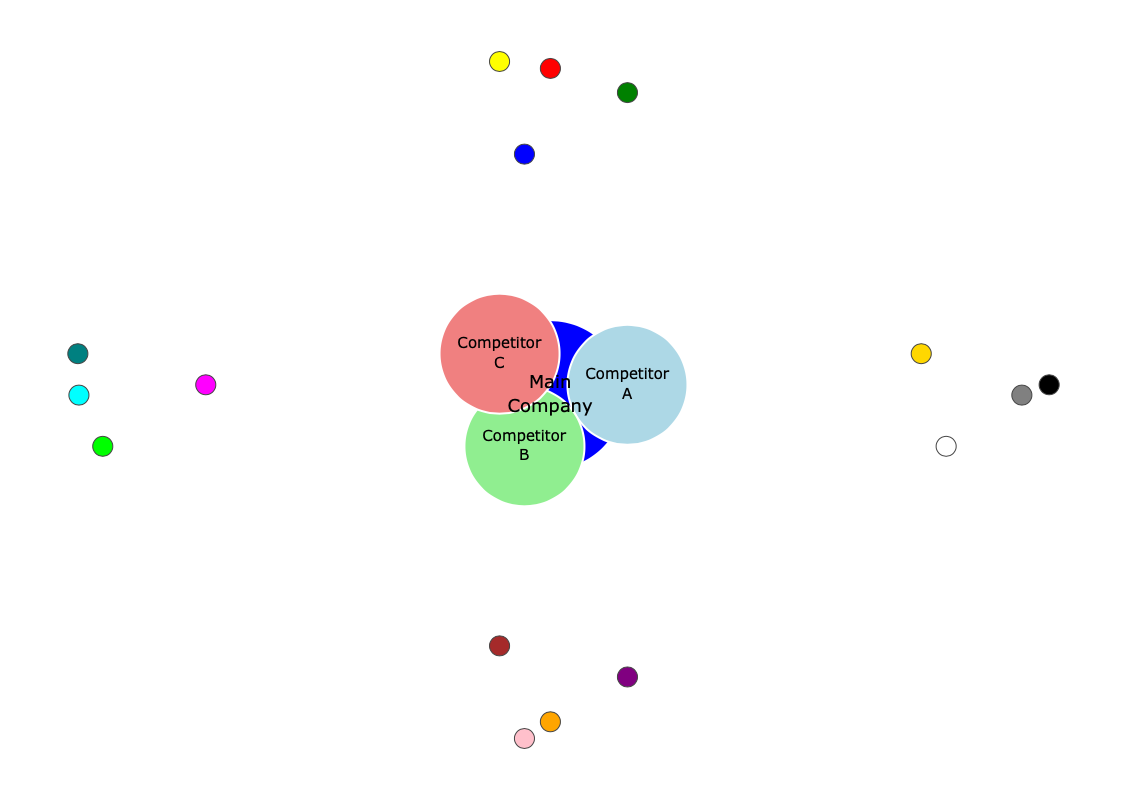

In [7]:
import networkx as nx
import plotly.graph_objects as go
import pandas as pd
import textwrap
import numpy as np

def create_network_graph(df, main_company, radius=2, wrap_width=10):
    """
    Create a network graph with the main company as the central node and competitors connected to it.
    Each node has 4 mini circles around it with colors from Color1, Color2, Color3, Color4 in the DataFrame.

    Args:
        df (pd.DataFrame): DataFrame with 'Company', 'Color', 'Color1', 'Color2', 'Color3', 'Color4' columns.
        main_company (str): Name of the main company.
        radius (float): Radius at which competitors are spaced around the main company.
        wrap_width (int): Number of characters per line for text wrapping inside the bubbles.

    Returns:
        fig (go.Figure): The resulting plotly figure.
    """
    # Create a NetworkX graph
    G = nx.Graph()

    # Add the main company as a node
    G.add_node(main_company)

    # Add competitors as nodes and connect them to the main company
    competitors = df[df['Company'] != main_company]['Company'].tolist()
    for competitor in competitors:
        G.add_node(competitor)
        G.add_edge(main_company, competitor)  # Create an edge from main company to each competitor

    # Use a spring layout to position nodes
    pos = nx.spring_layout(G, seed=42)

    # Extract node positions and edges
    node_x = []
    node_y = []
    for node in G.nodes:
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)

    edge_x = []
    edge_y = []
    for edge in G.edges:
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)  # None separates the edges
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    # Assign colors from the DataFrame
    color_dict = dict(zip(df['Company'], df['Color']))

    # Function to wrap the text for the company names
    def wrap_text(text, width):
        return '<br>'.join(textwrap.wrap(text, width=width))

    # Define function to calculate the distance to the edge of the main circle
    def get_offset_distance(main_size):
        # Calculate the radius of the main circle based on the marker size (size corresponds to area, radius = sqrt(size))
        return np.sqrt(main_size) / 2  # Adjust scaling for proper edge distance

    # Create the trace for the edges (lines connecting nodes)
    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=2, color='gray'),
        hoverinfo='none',
        mode='lines'
    )

    # Create traces for the main nodes (companies)
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        text=[wrap_text(node, wrap_width) for node in G.nodes],  # Wrap text for each node
        textposition='middle center',
        marker=dict(
            showscale=False,
            color=[color_dict[node] for node in G.nodes],  # Use colors from the DataFrame
            size=[150 if node == main_company else 120 for node in G.nodes],  # Larger size for main company
            line_width=2,
            opacity=1,  # Make circles fully opaque to hide lines underneath
        ),
        hoverinfo='text',
        textfont=dict(
            size=[18 if node == main_company else 15 for node in G.nodes],  # Dynamic font size
            color="black"
        )
    )

    # Create mini circle traces around each node at fixed top, bottom, left, right positions
    mini_circle_traces = []
    offsets = [(0, 1), (0, -1), (-1, 0), (1, 0)]  # Offsets for top, bottom, left, right

    for i, node in enumerate(G.nodes):
        x_center, y_center = pos[node]

        # Get the size of the main circle to calculate the proper distance to the edge
        main_size = 150 if node == main_company else 120
        edge_distance = get_offset_distance(main_size)

        # Get the mini-circle colors from the DataFrame
        row = df[df['Company'] == node]
        colors = [row['Color1'].values[0], row['Color2'].values[0], row['Color3'].values[0], row['Color4'].values[0]]

        for j, (x_offset, y_offset) in enumerate(offsets):
            # Position the mini circle at top, bottom, left, or right and adjust the distance based on edge_distance
            x_mini = x_center + x_offset * edge_distance
            y_mini = y_center + y_offset * edge_distance

            # Add mini circle as a separate trace
            mini_circle_traces.append(go.Scatter(
                x=[x_mini], y=[y_mini],
                mode='markers',
                marker=dict(
                    size=20,  # Mini circles size
                    color=colors[j],
                    line_width=1,
                    opacity=1
                ),
                hoverinfo='none'
            ))

    # Create the plot and add traces
    fig = go.Figure(data=[edge_trace, node_trace] + mini_circle_traces)

    # Set axis limits and layout
    fig.update_layout(
        showlegend=False,
        xaxis=dict(showgrid=False, zeroline=False, visible=False),
        yaxis=dict(showgrid=False, zeroline=False, visible=False),
        plot_bgcolor='white',
        height=800,  # Increased height
        width=800,   # Increased width
        margin=dict(l=10, r=10, t=10, b=10),  # Remove padding to minimize background
    )

    return fig

import pandas as pd

# Example DataFrame with companies and their respective colors
data = {
    'Company': ['Main Company', 'Competitor A', 'Competitor B', 'Competitor C'],
    'Color': ['blue', 'lightblue', 'lightgreen', 'lightcoral'],
    'Color1': ['red', 'green', 'blue', 'yellow'],
    'Color2': ['orange', 'purple', 'pink', 'brown'],
    'Color3': ['cyan', 'magenta', 'lime', 'teal'],
    'Color4': ['gray', 'black', 'white', 'gold']
}
df = pd.DataFrame(data)

# Create and show the graph with the DataFrame
main_company = 'Main Company'
fig = create_network_graph(df, main_company)
fig.show()


In [12]:
import dash
from dash import html, dcc
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.Div("Welcome to the App!", style={'textAlign': 'center', 'fontSize': 24}),
    
    html.Div(id='message-div', style={'textAlign': 'center', 'marginTop': '20px', 'fontSize': 20}),
    
    # Circular "Next" button with properly centered "➤" symbol
    html.Div([
        html.Button("➤", id='next-button', n_clicks=0, style={
            'width': '60px',
            'height': '60px',
            'fontSize': '30px',
            'color': 'white',
            'backgroundColor': '#333',  # Dark grey button
            'border': 'none',
            'borderRadius': '50%',  # Make it circular
            'cursor': 'pointer',
            'boxShadow': '0px 8px 12px rgba(0, 0, 0, 0.3)',  # Subtle shadow for depth
            'transition': 'all 0.3s ease',
            'fontWeight': 'bold',
            'display': 'flex',  # Flexbox to center the content
            'justifyContent': 'center',  # Horizontally center
            'alignItems': 'center',  # Vertically center
            'lineHeight': 'normal',  # Fix alignment issues with symbols
            'textAlign': 'center',
            'marginLeft': '20px',  # Positioned on the left side
            'fontFamily': 'Arial, sans-serif',  # Clean font family
        }),
        
        # Hover effect (CSS embedded here)
        dcc.Markdown('''
            <style>
                #next-button:hover {
                    background-color: #444;  /* Darker grey on hover */
                    box-shadow: 0px 12px 16px rgba(0, 0, 0, 0.5);  /* Lift effect on hover */
                    transform: translateY(-2px);  /* Slight lift */
                }

                #next-button:active {
                    transform: scale(0.95);  /* Button press effect */
                    box-shadow: 0px 5px 8px rgba(0, 0, 0, 0.2);  /* Reduced shadow on press */
                }
            </style>
        ''')
    ], style={'textAlign': 'left', 'marginTop': '50px'}),  # Left-align the button and add top margin
    
])

# Callback to handle button click
@app.callback(
    Output('message-div', 'children'),
    Input('next-button', 'n_clicks')
)
def update_message(n_clicks):
    if n_clicks > 0:
        return f"You clicked the Next button {n_clicks} times."
    return "Click the button to continue."

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [1]:
## This one is good!!! KEEP IT

import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State, ALL
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
import numpy as np
import itertools

import networkx as nx
import plotly.graph_objects as go
import pandas as pd
import textwrap


# Example Percentile Map
percentiles = pd.DataFrame(
    {"perc": range(0, 101),
     "A": list(itertools.chain(range(20,0,-1) ,range(81))),
     "B": range(0, 101),
     "C": list(itertools.chain(range(20,50), range(50, 30, -1), range(30, 81))),
     "D": range(100,-1,-1),
     "E": list(itertools.chain(range(40,20,-1), range(20, 51), range(50, 0, -1))),
     "F": list(itertools.chain(range(81,20,-1), range(20, 60))),
     "G": list(itertools.chain(range(70), range(70, 39, -1)))})

color_hex_101 = ["#A50026", "#AA0426", "#AF0926", "#B40E26", "#B91326", "#BE1826", "#C31C26", "#C82126", "#CD2626", "#D22B26", "#D73027", "#D93629",
                 "#DC3C2C", "#DF422F", "#E24832", "#E54E34", "#E85437", "#EB5A3A", "#EE603D", "#F16640", "#F46D43", "#F47345", "#F57949", "#F6804C",
                 "#F7864E", "#F88D51", "#F99355", "#FA9A58", "#FBA15A", "#FCA75D", "#FDAD60", "#FDB365", "#FDB869", "#FDBC6D", "#FDC271", "#FDC775",
                 "#FDCB7A", "#FDD17E", "#FDD582", "#FDDB86", "#FEE08B", "#FEE390", "#FEE695", "#FEE99A", "#FEEC9F", "#FEEFA4", "#FEF2AA", "#FEF5AF",
                 "#FEF8B4", "#FEFBB9", "#FFFFBF", "#FBFDB9", "#F7FBB4", "#F3FAAF", "#EFF8AA", "#ECF7A4", "#E8F59F", "#E4F39A", "#E0F295", "#DCF090",
                 "#D9EF8B", "#D3EC87", "#CEEA84", "#C9E881", "#C4E67D", "#BFE47A", "#BAE177", "#B5DF73", "#B0DD70", "#ABDB6D", "#A6D96A", "#9FD669",
                 "#99D368", "#92D067", "#8CCD67", "#86CB66", "#7FC865", "#79C565", "#72C264", "#6CBF63", "#66BD63", "#5EB961", "#56B55F", "#4FB15D",
                 "#47AE5B", "#40AA59", "#38A657", "#30A355", "#299F53", "#219B51", "#1A9850", "#17934D", "#148E4A", "#128948", "#0F8445", "#0C7F43",
                 "#0A7B41", "#07763E", "#05713C", "#026C39", "#006837"]
custom_color_map_101 = [[i,j] for i,j in zip(np.linspace(0,1,len(color_hex_101)),color_hex_101)]

def bar_heatmap(df, percentiles, custom_cmap):

    num_vars = percentiles.shape[1] - 1

    # Create empty subplots
    fig = make_subplots(rows=num_vars, cols=1, vertical_spacing = 0.02)

    # Fill subplots
    for n, j in enumerate(percentiles.columns[1:]):
        
        # Add the heatmap
        fig.add_trace(
            go.Heatmap(z = [percentiles[j]],
                       colorscale = custom_cmap,
                       showscale = False),
            row = n + 1, col = 1)

        # Add the marker for current selection
        fig.add_trace(
            go.Scatter(x = [df[j]], y = [0],
                       mode = 'markers',
                       marker = dict(symbol = 'triangle-down', size = 15, color = 'black'),
                       name = f'{j} markers',
                       showlegend = False,
                       cliponaxis=False),
            row = n + 1, col = 1)

        fig.update_xaxes(
            range=[0,100],  # Add dynamic padding
            row=n+1, col=1,
            automargin=True,  # Automatically adjust margins
            showline=True,  # Display x-axis line
            zeroline=False  # Remove zero line to keep layout clean
        )

        # Update Layout
        fig.update_yaxes(tickmode='array',
                         tickvals=[0],  # Position for the pseudo title
                         ticktext=[str(j) + "  "],  # The pseudo title text
                         tickangle=0,  # Keep the tick (now title) horizontal
                         automargin=True,
                         row=n+1, col=1,
                         showticklabels=True)

    # Update full layout
    fig.update_xaxes(showticklabels=False)
    fig.update_layout(height=600,
                      plot_bgcolor='#e8f4f8',  # Match the background to the card color
                      paper_bgcolor='#e8f4f8',  # Match the paper background as well
                      margin=dict(l=0, r=20, t=0, b=10),
                     )

    return fig

np.random.seed(18)
# Create a sample dataframe including additional line items for each company
data = {
    'Names': [f'Name{i}' for i in range(1, 26)],
    'Category': ['Green', 'Yellow', 'Red', 'Orange'] * 6 + ['Green'],
    'Sales': [1000 + i * 100 for i in np.random.randn(25)],
    'Assets': [2000 + i * 150 for i in np.random.randn(25)],
    'Sector': ['Tech', 'Finance', 'Retail', 'Healthcare'] * 6 + ['Tech'],
    'Industry': ['Tech', 'Finance', 'Retail', 'Healthcare'] * 6 + ['Tech'],
    'Geography': ['USA', 'Canada', 'Germany', 'UK'] * 6 + ['USA'],
    'Size': ['Large', 'Medium', 'Small'] * 8 + ['Medium'],
    'SalesP': [10 + i for i in np.random.randn(25)],
    'AssetP': [15 + i for i in np.random.randn(25)],
    'ShrinkageP': [5 + i for i in np.random.randn(25)],
    'DebtP': [30 - i for i in np.random.randn(25)],
    'Sales_1': [950 + i * 100 for i in np.random.randn(25)],
    'Sales_2': [900 + i * 100 for i in np.random.randn(25)],
    'Sales_3': [850 + i * 100 for i in np.random.randn(25)],
    'Sales_4': [800 + i * 100 for i in np.random.randn(25)],
    'Sales_5': [750 + i * 100 for i in np.random.randn(25)],
    'Assets_1': [1950 + i * 100 for i in np.random.randn(25)],
    'Assets_2': [1800 + i * 100 for i in np.random.randn(25)],
    'Assets_3': [1700 + i * 100 for i in np.random.randn(25)],
    'Assets_4': [1600 + i * 100 for i in np.random.randn(25)],
    'Assets_5': [1500 + i * 100 for i in np.random.randn(25)],
    "A": np.random.uniform(0,100,25),
    "B": np.random.uniform(0,100,25),
    "C": np.random.uniform(0,100,25),
    "D": np.random.uniform(0,100,25),
    "E": np.random.uniform(0,100,25),
    "F": np.random.uniform(0,100,25),
    "G": np.random.uniform(0,100,25),
}

df = pd.DataFrame(data)

# # Function to create customized speedometer plot
# def create_speedometer(category):
    
#     # color = "Green" if category >= 75 else "Yellow" if category >= 50 else "Orange" if category >= 25 else "Red"

#     if category >= 75:
#         color = "Green"
#         category_text = "High"
#     elif category >= 50:
#         color = "Yellow"
#         category_text = "Medium-High"
#     elif category >= 25:
#         color = "Orange"
#         category_text = "Medium-Low"
#     else:
#         color = "Red"
#         category_text = "Low"
        
#     fig = go.Figure(go.Indicator(
#         mode="gauge+number",
#         value=category,
#         number={'valueformat': None, 'font': {'size': 50, 'color': 'darkblue'}, 'prefix': category_text},  # Customize font size and color
#         gauge={
#             'axis': {'range': [0, 100], 'tickvals': [], 'visible': False},
#             'bar': {'color': color},
#             'bgcolor': 'lightgray',
#             'steps': [
#                 {'range': [0, category], 'color': color},
#             ]
#         }
#     ))
#     fig.update_layout(height=200, 
#                       margin={'l': 5, 'r': 5, 't': 5, 'b': 5},
#                       plot_bgcolor='#e8f4f8',  # Match the background to the card color
#                       paper_bgcolor='#e8f4f8',  # Match the paper background as well
#                      )
#     return fig

def create_speedometer(category):
    # Determine the color and the corresponding text category based on the value
    if category >= 75:
        color = "Green"
        category_text = "High"
    elif category >= 50:
        color = "Yellow"
        category_text = "Medium-High"
    elif category >= 25:
        color = "Orange"
        category_text = "Medium-Low"
    else:
        color = "Red"
        category_text = "Low"
    
    # Adjust font size based on the length of the category text
    if len(category_text) > 6:  # Longer text
        font_size = 30
    else:  # Shorter text
        font_size = 45

    # Create the gauge plot
    fig = go.Figure(go.Indicator(
        mode="gauge",  # Display only the gauge (remove the number from inside)
        value=category,  # This is the raw numeric value used for the gauge
        gauge={
            'axis': {'range': [0, 100], 'tickvals': [], 'visible': False},  # Set the range from 0 to 100
            'bar': {'color': color},  # The color based on the category
            'bgcolor': 'lightgray',
            'steps': [
                {'range': [0, category], 'color': color},  # Fill the gauge based on the value
            ],
        }
    ))

    # Adding the textual category (High, Medium-High, etc.) to the plot
    fig.add_annotation(
        x=0.5,  # Center the text horizontally
        y=0.05,  # Position the text slightly lower within the gauge
        text=category_text,  # The category text
        showarrow=False,  # No arrow needed
        font=dict(size=font_size, color='darkblue'),  # Adjust font size dynamically
        xanchor='center',  # Center the text
        yanchor='bottom',
        align="center"  # Ensure the text is aligned in the center
    )

    # Update layout to manage the plot size and positioning
    fig.update_layout(
        height=200,  # Adjust height to fit within the card
        margin={'l': 10, 'r': 10, 't': 30, 'b': 10},  # Adjust margin to give enough space
        plot_bgcolor='#e8f4f8',
        paper_bgcolor='#e8f4f8',
    )

    return fig




# Function to create background line plot with filled area
def create_background_line_plot(values):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=[i for i in range(len(values))], y=values, mode='lines', fill='tozeroy', line=dict(color='rgba(0, 0, 255, 0.1)')))
    fig.update_layout(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(0,0,0,0)',
        margin=dict(l=0, r=0, t=0, b=0),
        height=150,
        #autosize=True
    )
    return fig

# Function to create country silhouette plot
def create_country_silhouette(country):
    fig = go.Figure(go.Scattergeo(
        locations=[country],
        locationmode='country names',
        mode='markers',
        marker=dict(size=1, color='rgba(0,0,0,0)')
    ))

    fig.update_geos(
        showcountries=True, countrycolor="black",
        showsubunits=False,
        showcoastlines=False,
        showland=False, landcolor="white",
        showocean=False, oceancolor="white",
        showframe=False,
        projection_type='natural earth',
        lataxis_range=[-60, 90],
        lonaxis_range=[-180, 180]
    )

    fig.update_layout(
        showlegend=False,
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(0,0,0,0)',
        margin=dict(l=0, r=0, t=0, b=0),
        geo=dict(bgcolor= 'rgba(0,0,0,0)')
    )

    return fig

# Define category colors
category_colors = {
    'Green': '#00FF00',
    'Yellow': '#FFFF00',
    'Red': '#FF0000',
    'Orange': '#FFA500',
    'Selected': '#000000'  # Black for selected state
}

# Generic color button style
COLOR_BUTTON_STYLE = {
    'width': '25px', 
    'height': '25px', 
    'borderRadius': '50%', 
    'border': 'none', 
    'margin': '10px',
    'boxShadow': 'inset 0px 4px 6px rgba(0, 0, 0, 0.3)'
}

# Generic name bubble style
NAME_BUBBLE_STYLE = {
    'borderRadius': '50%',
    'width': '100px',
    'height': '100px',
    'lineHeight': '100px',
    'textAlign': 'center',
    'margin': '10px',
    'display': 'inline-block',
    'cursor': 'pointer',
    'fontSize': '16px',
    'transition': '0.3s',
    'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
}

CARD_STYLE = {
    'background-color': '#e8f4f8', 
    'padding': '20px', 
    'box-shadow': '2px 2px 5px rgba(0,0,0,0.1)', 
    'border-radius': '10px', 
    'flex': 1, 
    'margin': '10px', 
    'position': 'relative'
}

# Define a style for the data cards
card_style = {
    'padding': '10px',
    'border': '1px solid #ccc',
    'borderRadius': '8px',
    'margin': '10px',
    'boxShadow': '0px 4px 6px rgba(0, 0, 0, 0.1)',
    'textAlign': 'center'
}

# Sort dataframe by custom category order
category_order = {'Green': 0, 'Yellow': 1, 'Red': 3, 'Orange': 2}
df['Order'] = df['Category'].map(category_order)
df = df.sort_values('Order')

# Initial name layout
initial_name_elements = [
    html.Div(children=row["Names"],
             id={'type': 'name-bubble', 'index': row["Names"]},
             style={**NAME_BUBBLE_STYLE,
                    'backgroundColor': category_colors[row['Category']],
                    'textColor': '#000'},
             className='bubble'
             ) for _, row in df.iterrows()]

# Initialize selected status
initial_selected = {i: False for i in df["Names"]}

# Initialize Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([

    # Store relevant state variables
    dcc.Store(id="selected-names", data=initial_selected),  # Store dict with name status
    dcc.Store(id="selected-companies", data=[]),  # Store selected companies
    dcc.Store(id="page", data=0),  # Store current page for grid display

    # Category selection/deselection buttons
    html.Div([
        html.Button('', id='btn-green', style={**COLOR_BUTTON_STYLE, 'backgroundColor': category_colors['Green']}),
        html.Button('', id='btn-yellow', style={**COLOR_BUTTON_STYLE, 'backgroundColor': category_colors['Yellow']}),
        html.Button('', id='btn-orange', style={**COLOR_BUTTON_STYLE, 'backgroundColor': category_colors['Orange']}),
        html.Button('', id='btn-red', style={**COLOR_BUTTON_STYLE, 'backgroundColor': category_colors['Red']}),
    ], style={'textAlign': 'center', 'marginBottom': '20px'}),

    # Display Names
    html.Div(id='names-container',
             children=initial_name_elements,
             style={'textAlign': 'center', 'display': 'flex', 'flexWrap': 'wrap', 'justifyContent': 'center'}),

    # Okay button
    html.Button('Okay', id='okay-button', style={'marginTop': '20px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),

    # Div to display the grid or selected names after "Okay" is pressed
    html.Div(id='grid-output', style={'textAlign': 'center', 'marginTop': '20px'}),

    # Next button for switching between companies
    html.Button('Next', id='next-button', style={'marginTop': '20px', 'display': 'none', 'marginLeft': 'auto', 'marginRight': 'auto'}),
])


# Callback to update the name bubbles to reflect user selection
@app.callback(
    Output('names-container', 'children'),
    Output('selected-names', 'data'),
    Input('btn-green', 'n_clicks'),
    Input('btn-yellow', 'n_clicks'),
    Input('btn-orange', 'n_clicks'),
    Input('btn-red', 'n_clicks'),
    Input({'type': 'name-bubble', 'index': ALL}, 'n_clicks'),
    State('names-container', 'children'),
    State('selected-names', 'data'),
)
def update_name_bubbles(green_btn, yellow_btn, orange_btn, red_btn,
                        name_clicks, names_container, selected_status):
    ctx = dash.callback_context
    if not ctx.triggered:
        return dash.no_update, dash.no_update

    clicked_id = ctx.triggered[0]['prop_id'].split('.')[0]

    # Handle color category click
    if clicked_id.startswith('btn-'):  # Check that a color button was clicked
        category_clicked = clicked_id.split('-')[1].capitalize()  # Extract color category
        toggle_select = not all([selected_status[name] for name in df[df["Category"] == category_clicked]["Names"]])

        for name in df[df['Category'] == category_clicked]['Names']:
            selected_status[name] = toggle_select

        updated_name_elements = [
            html.Div(children=row["Names"],
                     id={'type': 'name-bubble', 'index': row["Names"]},
                     style={**NAME_BUBBLE_STYLE,
                            'backgroundColor': category_colors['Selected'] if selected_status[row['Names']] else category_colors[row['Category']],
                            'color': category_colors[row['Category']] if selected_status[row['Names']] else '#000'},
                     className='bubble'
                     ) for _, row in df.iterrows()]

        return updated_name_elements, selected_status

    if 'name-bubble' in clicked_id:
        name_clicked = json.loads(clicked_id)['index']
        selected_status[name_clicked] = not selected_status[name_clicked]

        updated_name_elements = [
            html.Div(children=row["Names"],
                     id={'type': 'name-bubble', 'index': row["Names"]},
                     style={**NAME_BUBBLE_STYLE,
                            'backgroundColor': category_colors['Selected'] if selected_status[row['Names']] else category_colors[row['Category']],
                            'color': category_colors[row['Category']] if selected_status[row['Names']] else '#000'},
                     className='bubble'
                     ) for _, row in df.iterrows()]

        return updated_name_elements, selected_status

    return dash.no_update, selected_status


# Combined callback for "Okay" and "Next" button
@app.callback(
    Output('grid-output', 'children'),
    Output('names-container', 'style'),
    Output('next-button', 'style'),
    Output('selected-companies', 'data'),
    Output('page', 'data'),
    Input('okay-button', 'n_clicks'),
    Input('next-button', 'n_clicks'),
    State('selected-names', 'data'),
    State('selected-companies', 'data'),
    State('page', 'data')
)
def display_and_switch_grid(okay_clicks, next_clicks, selected_names, selected_companies, page):
    ctx = dash.callback_context
    if not ctx.triggered:
        return dash.no_update, dash.no_update, dash.no_update, dash.no_update, dash.no_update

    triggered_id = ctx.triggered[0]['prop_id'].split('.')[0]

    if triggered_id == 'okay-button':
        selected_companies = [name for name, selected in selected_names.items() if selected]
        if not selected_companies:
            return 'No companies selected.', {'display': 'none'}, {'display': 'none'}, [], 0

        first_company = selected_companies[0]
        company_data = df[df['Names'] == first_company].iloc[0]

        # Create cards for each data item
        cards = html.Div([
            html.H1(children = company_data["Names"], style = {'text-align': 'center', 'font-size': '36px'}),
            html.Div([  ## Row 1
                html.Div([
                    html.H3("Company Sales", style = {'text-align' : 'center', 'font-size': '28px'}),
                    dcc.Graph(figure = create_background_line_plot(company_data[["Sales_5", "Sales_4", "Sales_3", "Sales_2", "Sales_1", "Sales"]].values.tolist()),
                              config={'displayModeBar': False},
                              style={'position': 'absolute', 'top': '20px', 'left': '20px', 'width': 'calc(100% - 40px)', 'height': 'calc(100% - 40px)', 'z-index': '0'},
                              id=f'graph1-{page}'),
                    html.P(company_data["Sales"], style={'text-align': 'center', 'font-size': '24px', 'position': 'relative', 'z-index': '1'}),
                ], style = CARD_STYLE),
                html.Div([
                    html.H3("Assets", style = {'text-align' : 'center', 'font-size': '28px'}),
                    dcc.Graph(figure = create_background_line_plot(company_data[["Assets_5", "Assets_4", "Assets_3", "Assets_2", "Assets_1", "Assets"]].values.tolist()),
                              config={'displayModeBar': False},
                              style={'position': 'absolute', 'top': '20px', 'left': '20px', 'width': 'calc(100% - 40px)', 'height': 'calc(100% - 40px)', 'z-index': '0'},
                             id=f'graph2-{page}'),
                    html.P(company_data["Assets"], style={'text-align': 'center', 'font-size': '24px', 'position': 'relative', 'z-index': '1'}),
                ], style = CARD_STYLE),
            ], style={'display': 'flex'}),
            html.Div([ ## Row 2
                html.Div([
                    html.H3("Sector", style={'text-align': 'center', 'font-size': '28px'}),
                    html.P(company_data["Sector"], style={'text-align': 'center', 'font-size': '24px'}),
                ], style = CARD_STYLE),
                html.Div([
                    html.H3("Industry", style={'text-align': 'center', 'font-size': '28px'}),
                    html.P(company_data["Industry"], style={'text-align': 'center', 'font-size': '24px'}),
                ], style = CARD_STYLE),
                html.Div([
                    html.H3("Country", style={'text-align': 'center', 'position': 'relative', 'z-index': '1', 'font-size': '28px'}),
                    html.P(company_data["Geography"], style={'text-align': 'center', 'font-size': '24px', 'position': 'relative', 'z-index': '1'}),
                    dcc.Graph(figure = create_country_silhouette(company_data["Geography"]), 
                              config={'displayModeBar': False}, 
                              style={'position': 'absolute', 'top': '0', 'left': '0', 'width': '100%', 'height': '100%', 'z-index': '0', 'opacity': '0.1'}),
                ], style = CARD_STYLE),
                html.Div([
                    html.H3("Company Size", style={'text-align': 'center', 'font-size': '28px'}),
                    html.P(company_data["Size"], style={'text-align': 'center', 'font-size': '24px'}),
                ], style = CARD_STYLE),
            ], style={'display': 'flex'}),
            html.Div([ ## Row 3
                html.Div([
                    html.H3("Sales Probability", style={'text-align': 'center', 'font-size': '28px'}),
                    dcc.Graph(figure = create_speedometer(company_data["SalesP"])),
                    html.P(company_data["SalesP"], style={'text-align': 'center', 'font-size': '24px', 'margin-top': '5px'}),
                ], style=CARD_STYLE),
                html.Div([
                    html.H3("Asset Probability", style={'text-align': 'center', 'font-size': '28px'}),
                    dcc.Graph(figure = create_speedometer(company_data["AssetP"])),
                    html.P(company_data["AssetP"], style={'text-align': 'center', 'font-size': '24px', 'margin-top': '5px'}),
                ], style=CARD_STYLE),
                html.Div([
                    html.H3("Debt Probability", style={'text-align': 'center', 'font-size': '28px'}),
                    dcc.Graph(figure = create_speedometer(company_data["DebtP"])),
                    html.P(company_data["DebtP"], style={'text-align': 'center', 'font-size': '24px', 'margin-top': '5px'}),
                ], style=CARD_STYLE),
                html.Div([
                    html.H3("Shrinkage Probability", style={'text-align': 'center', 'font-size': '28px'}),
                    dcc.Graph(figure = create_speedometer(company_data["ShrinkageP"])),
                    html.P(company_data["ShrinkageP"], style={'text-align': 'center', 'font-size': '24px', 'margin-top': '5px'}),
                ], style=CARD_STYLE),
            ], style={'display': 'flex'}),
            html.Div([ ## Row 4
                html.H3("Sales Drivers", style={'text-align': 'center', 'font-size': '28px'}),
                dcc.Graph(figure = bar_heatmap(company_data, percentiles, custom_color_map_101), id=f'graph-bar-{page}')
            ]),
        ])

        return cards, {'display': 'none'}, {'display': 'block'}, selected_companies, 0

    elif triggered_id == 'next-button':
        if selected_companies:
            page = (page + 1) % len(selected_companies)
            company = selected_companies[page]
            company_data = df[df['Names'] == company].iloc[0]

            # Create cards for each data item
            cards = html.Div([
            html.H1(children = company_data["Names"], style = {'text-align': 'center', 'font-size': '36px'}),
            html.Div([  ## Row 1
                html.Div([
                    html.H3("Company Sales", style = {'text-align' : 'center', 'font-size': '28px'}),
                    dcc.Graph(figure = create_background_line_plot(company_data[["Sales_5", "Sales_4", "Sales_3", "Sales_2", "Sales_1", "Sales"]].values.tolist()),
                              config={'displayModeBar': False},
                              style={'position': 'absolute', 'top': '20px', 'left': '20px', 'width': 'calc(100% - 40px)', 'height': 'calc(100% - 40px)', 'z-index': '0'},
                              id=f'graph1-{page}'),
                    html.P(company_data["Sales"], style={'text-align': 'center', 'font-size': '24px', 'position': 'relative', 'z-index': '1'}),
                ], style = CARD_STYLE),
                html.Div([
                    html.H3("Assets", style = {'text-align' : 'center', 'font-size': '28px'}),
                    dcc.Graph(figure = create_background_line_plot(company_data[["Assets_5", "Assets_4", "Assets_3", "Assets_2", "Assets_1", "Assets"]].values.tolist()),
                              config={'displayModeBar': False},
                              style={'position': 'absolute', 'top': '20px', 'left': '20px', 'width': 'calc(100% - 40px)', 'height': 'calc(100% - 40px)', 'z-index': '0'},
                              id=f'graph2-{page}'),
                    html.P(company_data["Assets"], style={'text-align': 'center', 'font-size': '24px', 'position': 'relative', 'z-index': '1'}),
                ], style = CARD_STYLE),
            ], style={'display': 'flex'}),
            html.Div([ ## Row 2
                html.Div([
                    html.H3("Sector", style={'text-align': 'center', 'font-size': '28px'}),
                    html.P(company_data["Sector"], style={'text-align': 'center', 'font-size': '24px'}),
                ], style = CARD_STYLE),
                html.Div([
                    html.H3("Industry", style={'text-align': 'center', 'font-size': '28px'}),
                    html.P(company_data["Industry"], style={'text-align': 'center', 'font-size': '24px'}),
                ], style = CARD_STYLE),
                html.Div([
                    html.H3("Country", style={'text-align': 'center', 'position': 'relative', 'z-index': '1', 'font-size': '28px'}),
                    html.P(company_data["Geography"], style={'text-align': 'center', 'font-size': '24px', 'position': 'relative', 'z-index': '1'}),
                    dcc.Graph(figure = create_country_silhouette(company_data["Geography"]), 
                              config={'displayModeBar': False}, 
                              style={'position': 'absolute', 'top': '0', 'left': '0', 'width': '100%', 'height': '100%', 'z-index': '0', 'opacity': '0.1'}),
                ], style = CARD_STYLE),
                html.Div([
                    html.H3("Company Size", style={'text-align': 'center', 'font-size': '28px'}),
                    html.P(company_data["Size"], style={'text-align': 'center', 'font-size': '24px'}),
                ], style = CARD_STYLE),
            ], style={'display': 'flex'}),
            html.Div([ ## Row 3
                html.Div([
                    html.H3("Sales Probability", style={'text-align': 'center', 'font-size': '28px'}),
                    dcc.Graph(figure = create_speedometer(company_data["SalesP"])),
                    # html.P(company_data["SalesP"], style={'text-align': 'center', 'font-size': '24px', 'margin-top': '5px'}),
                ], style={**CARD_STYLE, 'padding': '5px'}),
                html.Div([
                    html.H3("Asset Probability", style={'text-align': 'center', 'font-size': '28px'}),
                    dcc.Graph(figure = create_speedometer(company_data["AssetP"])),
                    # html.P(company_data["AssetP"], style={'text-align': 'center', 'font-size': '24px', 'margin-top': '5px'}),
                ], style={**CARD_STYLE, 'padding': '5px'}),
                html.Div([
                    html.H3("Debt Probability", style={'text-align': 'center', 'font-size': '28px'}),
                    dcc.Graph(figure = create_speedometer(company_data["DebtP"])),
                    # html.P(company_data["DebtP"], style={'text-align': 'center', 'font-size': '24px', 'margin-top': '5px'}),
                ], style={**CARD_STYLE, 'padding': '5px'}),
                html.Div([
                    html.H3("Shrinkage Probability", style={'text-align': 'center', 'font-size': '28px'}),
                    dcc.Graph(figure = create_speedometer(company_data["ShrinkageP"])),
                    # html.P(company_data["ShrinkageP"], style={'text-align': 'center', 'font-size': '24px', 'margin-top': '5px'}),
                ], style={**CARD_STYLE, 'padding': '5px'}),
            ], style={'display': 'flex'}),
            # html.Div([ ## Row 4
            #     html.H3("Sales Drivers", style={'text-align': 'center', 'font-size': '28px'}),
            #     dcc.Graph(figure = bar_heatmap(company_data, percentiles, custom_color_map_101), id=f'graph-bar-{page}'),
            #     html.Div([html.Img(src=f"data:image/png;base64,{create_radial_graph()}")], style={'textAlign': 'center', 'marginTop': '20px'}),
            # ]),
            # Update Row 4 Layout with Fixed Card Sizes (50% each)
            html.Div([  # Row 4
                html.Div([ # Left 
                    html.Div([
                        html.H3("Sales Drivers Heatmap", style={'text-align': 'center', 'font-size': '24px', 'margin-bottom': '10px'}),
                        dcc.Graph(figure=bar_heatmap(company_data, percentiles, custom_color_map_101), id=f'graph-bar-{page}', 
                                  style={'height': '300px', 'width': '100%', 'padding': '10px'}) # Fix the height of the graph
                    ], style={'width': '100%', 'height': '100%', 'padding': '10px', 'box-sizing': 'border-box'})
                ], style={
                    'width': '65%', 
                    'background-color': '#e8f4f8', 
                    'margin': '10px', 
                    'box-shadow': '2px 2px 5px rgba(0,0,0,0.1)', 
                    'border-radius': '10px', 
                    'max-height': '400px',  # Limit the card height
                    'overflow': 'hidden'  # Prevent content overflow
                }),
                html.Div([
                    html.Div([
                        html.H3("Sales Drivers Radial Graph", style={'text-align': 'center', 'font-size': '24px', 'margin-bottom': '10px'}),
                        html.Img(src=f"data:image/png;base64,{create_radial_graph()}", 
                                 style={'height': '300px', 'width': '100%', 'object-fit': 'contain'})  # Set a fixed height and ensure image fits properly
                    ], style={'width': '100%', 'height': '100%', 'padding': '10px', 'box-sizing': 'border-box', 'background-color': '#e8f4f8'})
                ], style={
                    'width': '35%', 
                    'background-color': '#e8f4f8', 
                    'margin': '10px', 
                    'box-shadow': '2px 2px 5px rgba(0,0,0,0.1)', 
                    'border-radius': '10px', 
                    'max-height': '400px',  # Limit the card height
                    'overflow': 'hidden'  # Prevent content overflow
                }),
            ], style={
                'display': 'flex', 
                # 'justify-content': 'space-between', 
                # 'align-items': 'center', 
                # 'width': '100%', 
                # 'max-width': '1200px',  # Limit the total row width for better control
                # 'margin': 'auto'
            }),
            html.Div([  # Row 4
                html.Div([
                    html.Div([
                        html.H3("Sales Drivers Radial Graph", style={'text-align': 'center', 'font-size': '24px', 'margin-bottom': '10px'}),
                        html.Img(src=f"data:image/png;base64,{create_radial_graph()}", 
                                 style={'height': '300px', 'width': '100%', 'object-fit': 'contain'})  # Set a fixed height and ensure image fits properly
                    ], style={'width': '100%', 'height': '100%', 'padding': '10px', 'box-sizing': 'border-box'})
                ], style={
                    'width': '35%', 
                    'background-color': '#e8f4f8', 
                    'margin': '10px', 
                    'box-shadow': '2px 2px 5px rgba(0,0,0,0.1)', 
                    'border-radius': '10px', 
                    'max-height': '400px',  # Limit the card height
                    'overflow': 'hidden'  # Prevent content overflow
                }),
                html.Div([ 
                    html.Div([
                        html.H3("Sales Drivers Heatmap", style={'text-align': 'center', 'font-size': '24px', 'margin-bottom': '10px'}),
                        dcc.Graph(figure=bar_heatmap(company_data, percentiles, custom_color_map_101), id=f'graph-bar-{page}', 
                                  style={'height': '300px', 'width': '100%', 'padding': '10px'}) # Fix the height of the graph
                    ], style={'width': '100%', 'height': '100%', 'padding': '10px', 'box-sizing': 'border-box'})
                ], style={
                    'width': '65%', 
                    'background-color': '#e8f4f8', 
                    'margin': '10px', 
                    'box-shadow': '2px 2px 5px rgba(0,0,0,0.1)', 
                    'border-radius': '10px', 
                    'max-height': '400px',  # Limit the card height
                    'overflow': 'hidden'  # Prevent content overflow
                }),
            ], style={
                'display': 'flex', 
                # 'justify-content': 'space-between', 
                # 'align-items': 'center', 
                # 'width': '100%', 
                # 'max-width': '1200px',  # Limit the total row width for better control
                # 'margin': 'auto'
            })

        ])

            return cards, dash.no_update, dash.no_update, dash.no_update, page

    return dash.no_update, dash.no_update, dash.no_update, dash.no_update, dash.no_update

# Run app
if __name__ == '__main__':
    app.run_server(debug=True)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import itertools
from io import BytesIO
import base64

def create_radial_graph():
    # Generate sample data
    percentiles = pd.DataFrame(
        {"perc": range(0, 101),
        "A": list(itertools.chain(range(20,0,-1), range(81))),
        "B": range(0, 101),
        "C": list(itertools.chain(range(20,50), range(50, 30, -1), range(30, 81))),
        "D": range(100,-1,-1),
        "E": list(itertools.chain(range(40,20,-1), range(20, 51), range(50, 0, -1))),
        "F": list(itertools.chain(range(81,20,-1), range(20, 60))),
        "G": list(itertools.chain(range(70), range(70, 39, -1)))})

    color_hex_101 = ["#A50026", "#AA0426", "#AF0926", "#B40E26", "#B91326", "#BE1826", "#C31C26", "#C82126", "#CD2626", "#D22B26", "#D73027", "#D93629",
                     "#DC3C2C", "#DF422F", "#E24832", "#E54E34", "#E85437", "#EB5A3A", "#EE603D", "#F16640", "#F46D43", "#F47345", "#F57949", "#F6804C",
                     "#F7864E", "#F88D51", "#F99355", "#FA9A58", "#FBA15A", "#FCA75D", "#FDAD60", "#FDB365", "#FDB869", "#FDBC6D", "#FDC271", "#FDC775",
                     "#FDCB7A", "#FDD17E", "#FDD582", "#FDDB86", "#FEE08B", "#FEE390", "#FEE695", "#FEE99A", "#FEEC9F", "#FEEFA4", "#FEF2AA", "#FEF5AF",
                     "#FEF8B4", "#FEFBB9", "#FFFFBF", "#FBFDB9", "#F7FBB4", "#F3FAAF", "#EFF8AA", "#ECF7A4", "#E8F59F", "#E4F39A", "#E0F295", "#DCF090",
                     "#D9EF8B", "#D3EC87", "#CEEA84", "#C9E881", "#C4E67D", "#BFE47A", "#BAE177", "#B5DF73", "#B0DD70", "#ABDB6D", "#A6D96A", "#9FD669",
                     "#99D368", "#92D067", "#8CCD67", "#86CB66", "#7FC865", "#79C565", "#72C264", "#6CBF63", "#66BD63", "#5EB961", "#56B55F", "#4FB15D",
                     "#47AE5B", "#40AA59", "#38A657", "#30A355", "#299F53", "#219B51", "#1A9850", "#17934D", "#148E4A", "#128948", "#0F8445", "#0C7F43",
                     "#0A7B41", "#07763E", "#05713C", "#026C39", "#006837"]
    color_hex_pdf = pd.DataFrame(enumerate(color_hex_101))

    col_names = percentiles.columns[1:].tolist()
    for i in col_names:
        percentiles = percentiles.merge(color_hex_pdf.rename(columns = {0 : str(i), 1 : str(i)+"_c"}),
                                        how="left",
                                        on=i)

    # Prepare data
    num_vars = len(col_names)
    num_segments = num_vars
    segment_size = 2 * np.pi / num_segments

    # Create circular heatmap
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    for i, col in enumerate(percentiles.columns[1:8]):
        theta = np.linspace(i * segment_size, (i + 1) * segment_size, 100)
        r = np.linspace(0, 100, 100)
        T, R = np.meshgrid(theta, r)
        Z = R

        ax.pcolormesh(T, R, Z, shading='auto', cmap=mcolors.ListedColormap(percentiles[str(col) + "_c"].values))

    # Add lines for each segment
    for i in range(num_segments):
        ax.plot([i * segment_size, i * segment_size], [0, 100], color='black', linewidth=4)

    # Remove grid lines
    ax.grid(False)

    # Remove axis and labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    # Remove the default polar spine
    ax.spines['polar'].set_visible(False)

    # Radar plot overlay
    pred = pd.DataFrame({"A": [51], "B": [62], "C": [70], "D": [89], "E": [19], "F": [8], "G": [34]})
    values = pred.iloc[0].tolist() + [pred.iloc[0].tolist()[0]]
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]
    ax.plot(angles, values, color='darkblue', linewidth=2, linestyle="none")
    ax.scatter(angles, values, color='darkblue', s=100)
    # ax.set_facecolor('#e8f4f8')

    fig.patch.set_facecolor('#e8f4f8')

    # Save the plot to a BytesIO object and encode as base64
    buf = BytesIO()
    plt.savefig(buf, format="png", bbox_inches="tight")
    buf.seek(0)
    image_base64 = base64.b64encode(buf.getvalue()).decode()

    plt.close(fig)
    return image_base64

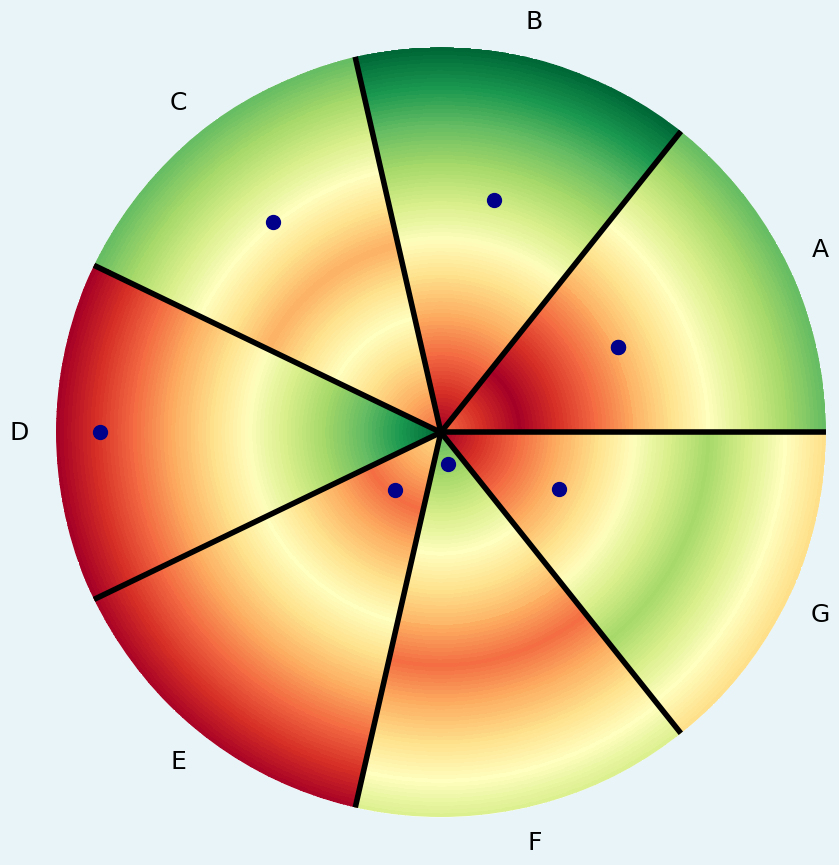

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors

# Generate sample data
np.random.seed(42)

percentiles = pd.DataFrame(
    {"perc": range(0, 101),
     "A": list(itertools.chain(range(20,0,-1) ,range(81))),
     "B": range(0, 101),
     "C": list(itertools.chain(range(20,50), range(50, 30, -1), range(30, 81))),
     "D": range(100,-1,-1),
     "E": list(itertools.chain(range(40,20,-1), range(20, 51), range(50, 0, -1))),
     "F": list(itertools.chain(range(81,20,-1), range(20, 60))),
     "G": list(itertools.chain(range(70), range(70, 39, -1)))})

color_hex_101 = ["#A50026", "#AA0426", "#AF0926", "#B40E26", "#B91326", "#BE1826", "#C31C26", "#C82126", "#CD2626", "#D22B26", "#D73027", "#D93629",
                 "#DC3C2C", "#DF422F", "#E24832", "#E54E34", "#E85437", "#EB5A3A", "#EE603D", "#F16640", "#F46D43", "#F47345", "#F57949", "#F6804C",
                 "#F7864E", "#F88D51", "#F99355", "#FA9A58", "#FBA15A", "#FCA75D", "#FDAD60", "#FDB365", "#FDB869", "#FDBC6D", "#FDC271", "#FDC775",
                 "#FDCB7A", "#FDD17E", "#FDD582", "#FDDB86", "#FEE08B", "#FEE390", "#FEE695", "#FEE99A", "#FEEC9F", "#FEEFA4", "#FEF2AA", "#FEF5AF",
                 "#FEF8B4", "#FEFBB9", "#FFFFBF", "#FBFDB9", "#F7FBB4", "#F3FAAF", "#EFF8AA", "#ECF7A4", "#E8F59F", "#E4F39A", "#E0F295", "#DCF090",
                 "#D9EF8B", "#D3EC87", "#CEEA84", "#C9E881", "#C4E67D", "#BFE47A", "#BAE177", "#B5DF73", "#B0DD70", "#ABDB6D", "#A6D96A", "#9FD669",
                 "#99D368", "#92D067", "#8CCD67", "#86CB66", "#7FC865", "#79C565", "#72C264", "#6CBF63", "#66BD63", "#5EB961", "#56B55F", "#4FB15D",
                 "#47AE5B", "#40AA59", "#38A657", "#30A355", "#299F53", "#219B51", "#1A9850", "#17934D", "#148E4A", "#128948", "#0F8445", "#0C7F43",
                 "#0A7B41", "#07763E", "#05713C", "#026C39", "#006837"]
color_hex_pdf = pd.DataFrame(enumerate(color_hex_101))

col_names = percentiles.columns[1:].tolist()
for i in col_names:
    percentiles = percentiles.merge(color_hex_pdf.rename(columns = {0 : str(i), 1 : str(i)+"_c"}),
                                    how="left",
                                    on=i)

# Prepare data
num_vars = len(col_names)
num_segments = num_vars
segment_size = 2 * np.pi / num_segments

# Create circular heatmap
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for i, col in enumerate(percentiles.columns[1:8]):
    theta = np.linspace(i * segment_size, (i + 1) * segment_size, 100)
    r = np.linspace(0, 100, 100)
    T, R = np.meshgrid(theta, r)
    Z = R

    ax.pcolormesh(T, R, Z,
                  shading='auto',
                  cmap=mcolors.ListedColormap(percentiles[str(col) + "_c"].values))

# Add lines for each segment
for i in range(num_segments):
    ax.plot([i * segment_size, i * segment_size], [0, 100], color='black', linewidth=4)

# Remove grid lines
ax.grid(False)

# Remove axis and labels
ax.set_yticklabels([])
ax.set_xticklabels([])

# Remove the default polar spine
ax.spines['polar'].set_visible(False)

# If you want to display outside borders
# ax.spines['polar'].set_visible(True)
# ax.spines['polar'].set_linewidth(4)

# Generate sample pred data
pred = pd.DataFrame(
    {"A": [51],
     "B": [62],
     "C": [70],
     "D": [89],
     "E": [19],
     "F": [8],
     "G": [34]})

# Radar plot
labels = col_names
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles = [angle + segment_size / 2 for angle in angles]  # Center points in the middle of the segments
angles += angles[:1]

values = pred.iloc[0].tolist()
values += values[:1]

ax.plot(angles, values, color='darkblue', linewidth=2, linestyle="none")
ax.scatter(angles, values, color='darkblue', s=100)  # Adjust 's' for larger markers

# Add column names outside the segments with more space
label_distance = 110  # Adjust this value to increase/decrease the space between the diagram and the labels
for i, label in enumerate(labels):
    angle_rad = i * segment_size + segment_size / 2
    ax.text(angle_rad, label_distance, label, size=18, horizontalalignment="center", verticalalignment='center')

fig.patch.set_facecolor('#e8f4f8')

# plt.title('Circular Heatmap with Radar Overlay', fontsize=16, fontweight='bold', pad=20)
plt.show()

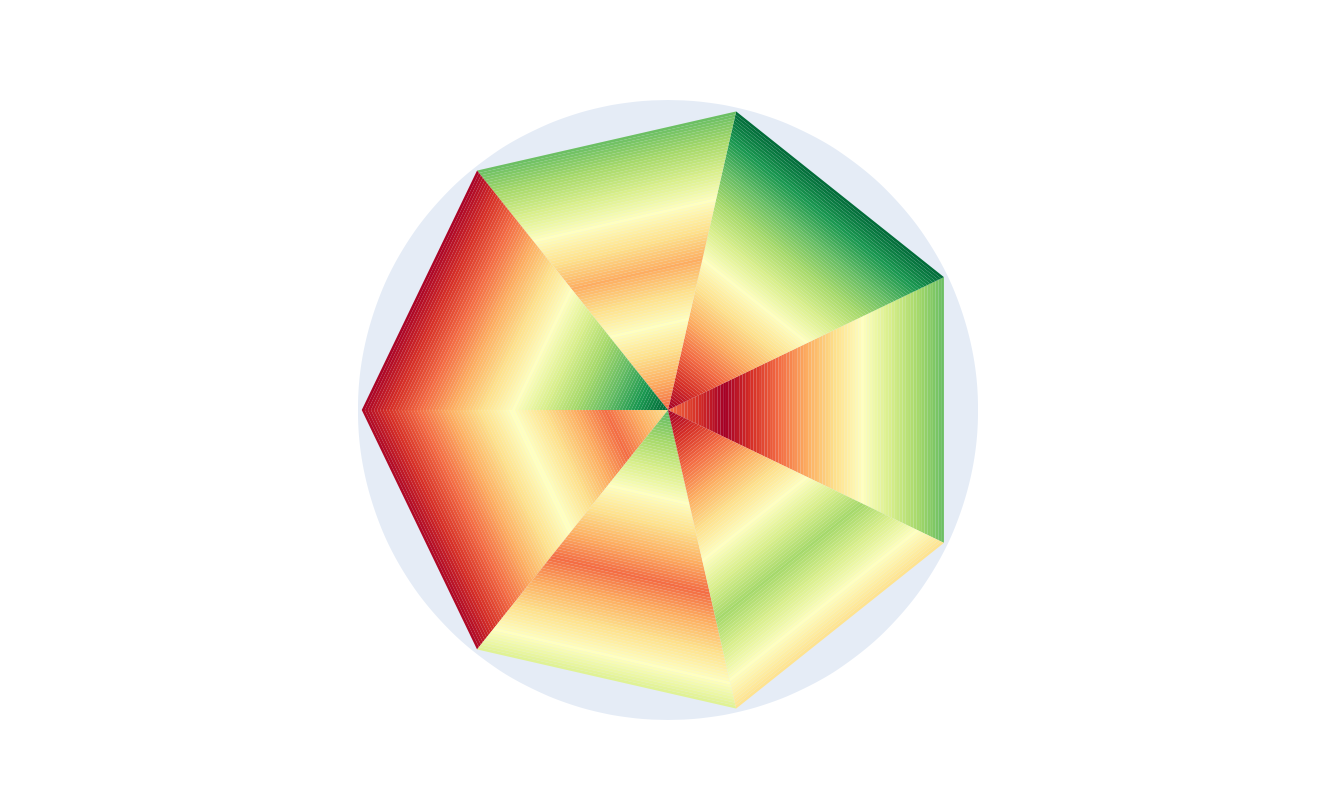

In [45]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import itertools

# Generate sample data
np.random.seed(42)

percentiles = pd.DataFrame(
    {"perc": range(0, 101),
     "A": list(itertools.chain(range(20, 0, -1), range(81))),
     "B": range(0, 101),
     "C": list(itertools.chain(range(20, 50), range(50, 30, -1), range(30, 81))),
     "D": range(100, -1, -1),
     "E": list(itertools.chain(range(40, 20, -1), range(20, 51), range(50, 0, -1))),
     "F": list(itertools.chain(range(81, 20, -1), range(20, 60))),
     "G": list(itertools.chain(range(70), range(70, 39, -1)))})

# Custom colormap
color_hex_101 = ["#A50026", "#AA0426", "#AF0926", "#B40E26", "#B91326", "#BE1826", "#C31C26", "#C82126", "#CD2626", "#D22B26", "#D73027", "#D93629",
                 "#DC3C2C", "#DF422F", "#E24832", "#E54E34", "#E85437", "#EB5A3A", "#EE603D", "#F16640", "#F46D43", "#F47345", "#F57949", "#F6804C",
                 "#F7864E", "#F88D51", "#F99355", "#FA9A58", "#FBA15A", "#FCA75D", "#FDAD60", "#FDB365", "#FDB869", "#FDBC6D", "#FDC271", "#FDC775",
                 "#FDCB7A", "#FDD17E", "#FDD582", "#FDDB86", "#FEE08B", "#FEE390", "#FEE695", "#FEE99A", "#FEEC9F", "#FEEFA4", "#FEF2AA", "#FEF5AF",
                 "#FEF8B4", "#FEFBB9", "#FFFFBF", "#FBFDB9", "#F7FBB4", "#F3FAAF", "#EFF8AA", "#ECF7A4", "#E8F59F", "#E4F39A", "#E0F295", "#DCF090",
                 "#D9EF8B", "#D3EC87", "#CEEA84", "#C9E881", "#C4E67D", "#BFE47A", "#BAE177", "#B5DF73", "#B0DD70", "#ABDB6D", "#A6D96A", "#9FD669",
                 "#99D368", "#92D067", "#8CCD67", "#86CB66", "#7FC865", "#79C565", "#72C264", "#6CBF63", "#66BD63", "#5EB961", "#56B55F", "#4FB15D",
                 "#47AE5B", "#40AA59", "#38A657", "#30A355", "#299F53", "#219B51", "#1A9850", "#17934D", "#148E4A", "#128948", "#0F8445", "#0C7F43",
                 "#0A7B41", "#07763E", "#05713C", "#026C39", "#006837"]

# Function to map values to the colormap
def get_color(val):
    return color_hex_101[val]

# Prepare data for radar plot overlay
pred = pd.DataFrame(
    {"A": [51],
     "B": [62],
     "C": [70],
     "D": [89],
     "E": [19],
     "F": [8],
     "G": [34]})

# Prepare layout
fig = go.Figure()

# Variables for the circular heatmap
num_vars = len(percentiles.columns[1:])
segment_size = 360 / num_vars  # This divides the circle equally for each column
theta_offset = segment_size / 2  # Offset to center the segments

# Circular heatmap
for i, col in enumerate(percentiles.columns[1:]):
    for r in range(100):  # For each percentile value (row 0 to 100)
        color = get_color(percentiles[col].iloc[r])  # Get color based on percentile
        fig.add_trace(go.Scatterpolar(
            r=[r, r + 1, r + 1, r],  # Radial values
            theta=[i * segment_size - theta_offset, i * segment_size - theta_offset, (i + 1) * segment_size - theta_offset, (i + 1) * segment_size - theta_offset],  # Angular values
            fill='toself',
            fillcolor=color,
            line=dict(color='rgba(0,0,0,0)'),
            hoverinfo='none',
            showlegend=False
        ))

# Overlay radar plot
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

values = pred.iloc[0].tolist()
values += values[:1]

fig.add_trace(go.Scatterpolar(
    r=values,
    theta=[f"{col}" for col in percentiles.columns[1:]] + [percentiles.columns[1]],
    mode='lines+markers',
    marker=dict(size=10, color='darkblue'),
    line=dict(color='darkblue', width=2),
    showlegend=False
))

# Layout adjustments
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=False),
        angularaxis=dict(visible=False),
    ),
    showlegend=False,
    autosize=False,
    width=800,
    height=800,
)

fig.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.io as pio
pio.renderers.default = 'iframe'
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import itertools

# Generate sample data
np.random.seed(42)

# Example Percentile Map
percentiles = pd.DataFrame(
    {"perc": range(0, 101),
     "A": list(itertools.chain(range(20,0,-1) ,range(81))),
     "B": range(0, 101),
     "C": list(itertools.chain(range(20,50), range(50, 30, -1), range(30, 81))),
     "D": range(100,-1,-1),
     "E": list(itertools.chain(range(40,20,-1), range(20, 51), range(50, 0, -1))),
     "F": list(itertools.chain(range(81,20,-1), range(20, 60))),
     "G": list(itertools.chain(range(70), range(70, 39, -1)))})

pred = pd.DataFrame(
    {"A": [51],
     "B": [62],
     "C": [70],
     "D": [89],
     "E": [19],
     "F": [3],
     "G": [34]})

color_hex_101 = ["#A50026", "#AA0426", "#AF0926", "#B40E26", "#B91326", "#BE1826", "#C31C26", "#C82126", "#CD2626", "#D22B26", "#D73027", "#D93629",
                 "#DC3C2C", "#DF422F", "#E24832", "#E54E34", "#E85437", "#EB5A3A", "#EE603D", "#F16640", "#F46D43", "#F47345", "#F57949", "#F6804C",
                 "#F7864E", "#F88D51", "#F99355", "#FA9A58", "#FBA15A", "#FCA75D", "#FDAD60", "#FDB365", "#FDB869", "#FDBC6D", "#FDC271", "#FDC775",
                 "#FDCB7A", "#FDD17E", "#FDD582", "#FDDB86", "#FEE08B", "#FEE390", "#FEE695", "#FEE99A", "#FEEC9F", "#FEEFA4", "#FEF2AA", "#FEF5AF",
                 "#FEF8B4", "#FEFBB9", "#FFFFBF", "#FBFDB9", "#F7FBB4", "#F3FAAF", "#EFF8AA", "#ECF7A4", "#E8F59F", "#E4F39A", "#E0F295", "#DCF090",
                 "#D9EF8B", "#D3EC87", "#CEEA84", "#C9E881", "#C4E67D", "#BFE47A", "#BAE177", "#B5DF73", "#B0DD70", "#ABDB6D", "#A6D96A", "#9FD669",
                 "#99D368", "#92D067", "#8CCD67", "#86CB66", "#7FC865", "#79C565", "#72C264", "#6CBF63", "#66BD63", "#5EB961", "#56B55F", "#4FB15D",
                 "#47AE5B", "#40AA59", "#38A657", "#30A355", "#299F53", "#219B51", "#1A9850", "#17934D", "#148E4A", "#128948", "#0F8445", "#0C7F43",
                 "#0A7B41", "#07763E", "#05713C", "#026C39", "#006837"]
custom_color_map_101 = [[i,j] for i,j in zip(np.linspace(0,1,len(color_hex_101)),color_hex_101)]

def bar_heatmap(df, percentiles, custom_cmap):

    num_vars = percentiles.shape[1] - 1

    # Create empty subplots
    fig = make_subplots(rows=num_vars, cols=1, vertical_spacing = 0.02)

    # Fill subplots
    for n, j in enumerate(percentiles.columns[1:]):

        # Add the heatmap
        fig.add_trace(
            go.Heatmap(z = [percentiles[j]],
                       colorscale = custom_cmap,
                       showscale = False),
            row = n + 1, col = 1)

        # Add the marker for current selection
        fig.add_trace(
            go.Scatter(x = df[j], y = [0],
                       mode = 'markers',
                       marker = dict(symbol = 'triangle-down', size = 15, color = 'black'),
                       name = f'{j} markers',
                       showlegend = False),
            row = n + 1, col = 1)

        # Update Layour
        fig.update_yaxes(tickmode='array',
                         tickvals=[0],  # Position for the pseudo title
                         ticktext=[str(j) + "  "],  # The pseudo title text
                         tickangle=0,  # Keep the tick (now title) horizontal
                         automargin=True,
                         row=n+1, col=1,
                         showticklabels=True)

    # Update full layout
    fig.update_xaxes(showticklabels=False)
    fig.update_layout(height=600)

    return fig

num_vars = 7
fig = make_subplots(rows=num_vars, cols=1, vertical_spacing = 0.02)

for n,j in enumerate(percentiles.columns[1:]):
    
    fig.add_trace(
            go.Heatmap(z=[percentiles[j]],
                       colorscale=custom_color_map_101,
                       showscale=False),
            row=n+1, col=1)

    fig.add_trace(
            go.Scatter(x=pred[j], y=[0],
                       mode='markers',
                       marker=dict(symbol='triangle-down', size=15, color='black'),
                       name=f'{j} markers',
                      showlegend=False),
            row=n+1, col=1)
    
    fig.update_yaxes(tickmode='array',
                             tickvals=[0],  # Position for the pseudo title
                             ticktext=[str(j) + "  "],  # The pseudo title text
                             tickangle=0,  # Keep the tick (now title) horizontal
                             automargin=True,
                             row=n+1, col=1,
                             showticklabels=True)


fig.update_xaxes(showticklabels=False, range=(0,100))

fig.update_layout(height=600)
# Save image
# fig.write_image("driver_bars_"+i+".png")

## Just display the last one to check it ran as expected
fig.show(renderer='iframe')

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State, ALL
import pandas as pd
import plotly.graph_objs as go
import json

# Extend the sample dataframe to include 25 rows
data = {
    'Names': [f'Name{i}' for i in range(1, 26)],
    'Category': ['Green', 'Yellow', 'Red', 'Orange'] * 6 + ['Green'],
    'Sales': [1000 + i * 100 for i in range(25)],
    'Assets': [2000 + i * 150 for i in range(25)],
    'Sector': ['Tech', 'Finance', 'Retail', 'Healthcare'] * 6 + ['Tech'],
    'Industry': ['Tech', 'Finance', 'Retail', 'Healthcare'] * 6 + ['Tech'],
    'Geography': ['USA', 'Canada', 'Germany', 'UK'] * 6 + ['USA'],
    'Size': ['Large', 'Medium', 'Small'] * 8 + ['Medium'],
    'SalesP': [10 + i for i in range(25)],
    'AssetP': [15 + i for i in range(25)],
    'ShrinkageP': [5 + i for i in range(25)],
    'DebtP': [30 - i for i in range(25)],
    'Sales_1': [950 + i * 100 for i in range(25)],
    'Sales_2': [900 + i * 100 for i in range(25)],
    'Sales_3': [850 + i * 100 for i in range(25)],
    'Sales_4': [800 + i * 100 for i in range(25)],
    'Sales_5': [750 + i * 100 for i in range(25)],
    'Assets_1': [1950 + i * 100 for i in range(25)],
    'Assets_2': [1800 + i * 100 for i in range(25)],
    'Assets_3': [1700 + i * 100 for i in range(25)],
    'Assets_4': [1600 + i * 100 for i in range(25)],
    'Assets_5': [1500 + i * 100 for i in range(25)],
}

df = pd.DataFrame(data)

# Function to create background line plot with filled area
def create_background_line_plot(values):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=[i for i in range(len(values))], y=values, mode='lines', fill='tozeroy', line=dict(color='rgba(0, 0, 255, 0.3)')))
    fig.update_layout(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(0,0,0,0)',
        margin=dict(l=0, r=0, t=0, b=0),
        height=150,  # Adjust the height to fit in the card
        autosize=True
    )
    return fig

# Your existing layout and callback code will be retained and integrated with this
# Only the data rows are extended and the graph's size is contained in the card

# Initialize Dash app
app = dash.Dash(__name__)

# Existing layout code

# Combined callback for "Okay" and "Next" button
@app.callback(
    Output('grid-output', 'children'),
    Output('names-container', 'style'),
    Output('next-button', 'style'),
    Output('selected-companies', 'data'),
    Output('page', 'data'),
    Input('okay-button', 'n_clicks'),
    Input('next-button', 'n_clicks'),
    State('selected-names', 'data'),
    State('selected-companies', 'data'),
    State('page', 'data')
)
def display_and_switch_grid(okay_clicks, next_clicks, selected_names, selected_companies, page):
    ctx = dash.callback_context
    if not ctx.triggered:
        return dash.no_update, dash.no_update, dash.no_update, dash.no_update, dash.no_update

    triggered_id = ctx.triggered[0]['prop_id'].split('.')[0]

    if triggered_id == 'okay-button':
        selected_companies = [name for name, selected in selected_names.items() if selected]
        if not selected_companies:
            return 'No companies selected.', {'display': 'none'}, {'display': 'none'}, [], 0

        first_company = selected_companies[0]
        company_data = df[df['Names'] == first_company].iloc[0]

        # Create cards for each data item
        cards = html.Div([
            html.H1(children=company_data["Names"], style={'text-align': 'center'}),
            html.Div([  ## Row 1
                html.Div([
                    html.H3("Company Sales", style={'text-align': 'center'}),
                    dcc.Graph(figure=create_background_line_plot(company_data[["Sales_5", "Sales_4", "Sales_3", "Sales_2", "Sales_1", "Sales"]].values.tolist()),
                             config={'displayModeBar': False},
                             style={'width': '100%', 'height': '100%'}),
                    html.P(company_data["Sales"], style={'text-align': 'center', 'font-size': '24px', 'position': 'relative', 'z-index': '1'}),
                ], style=CARD_STYLE),
                html.Div([
                    html.H3("Assets", style={'text-align': 'center'}),
                    dcc.Graph(figure=create_background_line_plot(company_data[["Assets_5", "Assets_4", "Assets_3", "Assets_2", "Assets_1", "Assets"]].values.tolist()),
                             config={'displayModeBar': False},
                             style={'width': '100%', 'height': '100%'}),
                    html.P(company_data["Assets"], style={'text-align': 'center', 'font-size': '24px', 'position': 'relative', 'z-index': '1'}),
                ], style=CARD_STYLE),
            ], style={'display': 'flex'}),
            # The rest of the card layout remains the same
        ])

        return cards, {'display': 'none'}, {'display': 'block'}, selected_companies, 0

    elif triggered_id == 'next-button':
        if selected_companies:
            page = (page + 1) % len(selected_companies)
            company = selected_companies[page]
            company_data = df[df['Names'] == company].iloc[0]

            # Create cards for each data item
            cards = html.Div([
                html.H1(children=company_data["Names"], style={'text-align': 'center'}),
                html.Div([  ## Row 1
                    html.Div([
                        html.H3("Company Sales", style={'text-align': 'center'}),
                        dcc.Graph(figure=create_background_line_plot(company_data[["Sales_5", "Sales_4", "Sales_3", "Sales_2", "Sales_1", "Sales"]].values.tolist()),
                                 config={'displayModeBar': False},
                                 style={'width': '100%', 'height': '100%'}),
                        html.P(company_data["Sales"], style={'text-align': 'center', 'font-size': '24px', 'position': 'relative', 'z-index': '1'}),
                    ], style=CARD_STYLE),
                    html.Div([
                        html.H3("Assets", style={'text-align': 'center'}),
                        dcc.Graph(figure=create_background_line_plot(company_data[["Assets_5", "Assets_4", "Assets_3", "Assets_2", "Assets_1", "Assets"]].values.tolist()),
                                 config={'displayModeBar': False},
                                 style={'width': '100%', 'height': '100%'}),
                        html.P(company_data["Assets"], style={'text-align': 'center', 'font-size': '24px', 'position': 'relative', 'z-index': '1'}),
                    ], style=CARD_STYLE),
                ], style={'display': 'flex'}),
                # The rest of the card layout remains the same
            ])

            return cards, dash.no_update, dash.no_update, dash.no_update, page

    return dash.no_update, dash.no_update, dash.no_update, dash.no_update, dash.no_update

# Run app
if __name__ == '__main__':
    app.run_server(debug=True)


In [1]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State, ALL
import pandas as pd
import json
import numpy as np
import itertools
import matplotlib
matplotlib.use('Agg')  # Use the non-GUI backend

import Network_Plots as NPlots
import Driver_Plots as DPlots
import DistMatrix_Plots as DMPlots
import Silhouette_Plots as SPlots
import RadarMeter_Plots as RPlots
import Geographical_Plots as GPlots
import AppSetup
import Setup
from Setup import OKAY_BUTTON_STYLE, SECTOR_CONTAINER_STYLE, COLOR_BUTTON_STYLE, BOX_STYLE_FULL, HOVER_STYLE, PRINT_STYLE, APP_BACKGROUND_COLOR, NEXT_BUTTON_STYLE, model_type_list, category_colors, sectors_ndy


## Load in example table of metadata
df = Setup.df

# Sort dataframe by base category order
model = "Sales" # Base model type

df = Setup.model_type_prep(df, model)

INITIAL_POOL = len(df) # Number of firms initially available

# Initialize selected status
initial_selected = {i: False for i in df["Names"]}

# External stylesheets
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# Initialize Dash app
app = dash.Dash(__name__)

app.index_string = Setup.index_string

# Layout of the app
app.layout = html.Div(
    id = "app-container",
    children = [
    # Store relevant state variables
    dcc.Store(id = "selected-status", data = initial_selected),  # Store dict with name status
    dcc.Store(id = "selected-companies", data = []),  # Store selected companies
    dcc.Store(id = "model-mode", data = model), # Store model mode
    dcc.Store(id = "page", data = 0),  # Store current page for grid display
    dcc.Store(id = "dataframe-store", data = df.to_dict('records')),  # Store dataframe as dict
    dcc.Store(id = 'selected-sectors', data = []),  # Store to keep track of selected sectors
    dcc.Store(id = 'selected-industries', data = []),  # Store to keep track of selected industries
    dcc.Store(id = "selected-geography", data = {}), # Store geographical data
    dcc.Store(id = 'step', data = 'maps1'),  # Track current step: 'sectors' or 'industries'
    dcc.Store(id='counter-store', data=INITIAL_POOL), # Track count of available firms
    dcc.Store(id='selected-size', data="Large"), # Store selected size

    html.Div(
        [],
        style = {'marginTop': '50px'},    # Add distance from the top of the page
    ),

    # Geographical plots container
    html.Div(
        dcc.Graph(id = 'map', 
                  figure = GPlots.plot_global_country(background_color = APP_BACKGROUND_COLOR).update_layout(clickmode='event+select')),
        style = {'display': 'flex',
                 'justifyContent': 'center',  # Horizontally center the graph
                 'alignItems': 'center', # Vertically center the graph
                'backgroundColor': APP_BACKGROUND_COLOR}  
    ),

    # Sector/NDY Grids
    AppSetup.initial_sector_ndy_grid(),

    # Size page
    AppSetup.initial_size_boxes_upper(),
    AppSetup.initial_size_boxes_lower(),

    # Print page before moving to names
    html.Div(id = 'display-out', style = {'display' : 'none'}),

    # "Okay" Button used for grid selection
    html.Button('Okay', id = 'okay-button', 
                n_clicks = 0, style = OKAY_BUTTON_STYLE), # This block is initially hidden

    # Model mode buttons
    AppSetup.initial_model_mode_button(model), # Hidden in the beginning

    # Category selection/deselection buttons
    AppSetup.initial_category_button(),

    # Display Names
    # id: names-container
    AppSetup.initial_bubble_elements(df),

    # Company page display
    html.Div(id='grid-output',
             style={'textAlign': 'center'}),

    # "Okay" Button. This block is initially hidden
    html.Button('Okay', id = 'okay-button2', 
                n_clicks = 0, style = OKAY_BUTTON_STYLE), # This is initially hidden

    # Next button for switching between companies
    # html.Button('Next', id='next-button', 
    #             style={'marginTop': '20px', 'display': 'none', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    html.Div([
        html.Button("➤", id='next-button', n_clicks=0, style={'display' : 'none'}),
    ], style={'textAlign': 'left', 'marginTop': '20px'}),  # Left-align the button and add top margin

    # Counter display
    AppSetup.initial_counter_display(INITIAL_POOL),
        
], style={
    'backgroundColor': APP_BACKGROUND_COLOR,  # Set the very light grey background color here
})

######### APP UPDATE FUNCTION ###########

@app.callback(
    [
        Output('button-sales', 'style'), # Sales button hidder or shown
        Output('button-asset', 'style'), # Asset button hidder or shown
        Output('button-borrow', 'style'), # Borrow button hidder or shown
        Output('button-shrink', 'style'), # Shrink button hidder or shown 
        Output('model-mode', 'data'), # Track model mode
        Output('selected-status', 'data'), # Track selected status of firms
        Output('names-container', 'children'), # What names to show for selection
        Output('btn-green', 'style'), # Green button hidder or shown
        Output('btn-yellow', 'style'), # Yellow button hidder or shown
        Output('btn-orange', 'style'), # Orange button hidder or shown
        Output('btn-red', 'style'), # Red button hidder or shown
        Output('okay-button2', 'style'), # Okay button 2 hidden or shown
        Output('selected-companies', 'data'), # Track of selected companies
        Output('page', 'data'), # Page number tracker
        Output('grid-output', 'children'), # Company display page
        Output('dataframe-store', 'data'), # Keep track of dataframe
        Output('names-container', 'style'), # Show or hide names container
        Output('map', 'figure'), # What map plot to display
        Output('map', 'style'), # Map plot hidden or shown
        Output('okay-button', 'style'), # Okay button hidden or shown
        Output('selected-sectors', 'data'), # Selected sectors to keep track of
        Output('sector-container', 'children'), # Sector grid layout updated
        Output('sector-container', 'style'), # Overall grid info to hide or show it
        Output('selected-industries', 'data'), # Selected industries to keep track of
        Output('selected-geography', 'data'), # Selected geographies
        Output('step', 'data'), # Track which step: 'plot' or 'sectors' or 'industries'
        Output('counter-display', 'children'), # What counter value to display
        Output('counter-display', 'style'), # The counter style
        Output('counter-store', 'data'), # Counter data
        Output('large-box-size', 'style'), # Large size box style
        Output('medium-box-size', 'style'), # Medium size box style
        Output('small-box-size', 'style'), # Small size box style
        Output('micro-box-size', 'style'), # Micro size box style
        Output('display-out', 'children'), # Selected output display
        Output('display-out', 'style'), # Selected output display style
        Output('selected-size', 'data'), # Selected size
        Output('next-button', 'style'), # Next button style
     ],
    [
        Input('button-sales', 'n_clicks'), # n_clicks are needed to identify if a button is clicked 
        Input('button-asset', 'n_clicks'), # n_clicks are needed to identify if a button is clicked 
        Input('button-borrow', 'n_clicks'), # n_clicks are needed to identify if a button is clicked 
        Input('button-shrink', 'n_clicks'), # n_clicks are needed to identify if a button is clicked 
        State('model-mode', 'data'),
        State('selected-status', 'data'),
        State('names-container', 'children'),
        Input('btn-green', 'n_clicks'), # n_clicks are needed to identify if a button is clicked 
        Input('btn-yellow', 'n_clicks'), # n_clicks are needed to identify if a button is clicked 
        Input('btn-orange', 'n_clicks'), # n_clicks are needed to identify if a button is clicked 
        Input('btn-red', 'n_clicks'), # n_clicks are needed to identify if a button is clicked 
        Input({'type': 'name-bubble', 'index': ALL}, 'n_clicks'),
        Input('okay-button2', 'n_clicks'), # n_clicks are needed to identify if a button is clicked 
        State('selected-companies', 'data'),
        State('page', 'data'),
        State('dataframe-store', 'data'),
        Input('map', 'clickData'), # If the plot has been clicked
        State('step', 'data'),
        State('selected-geography', 'data'),
        Input('okay-button', 'n_clicks'), # n_clicks are needed to identify if a button is clicked 
        State('selected-sectors', 'data'),
        State('selected-industries', 'data'),
        Input({'type': 'sector-box', 'index': ALL}, 'n_clicks'), # Selected sectors from the grid
        Input({'type': 'industry-box', 'index': ALL}, 'n_clicks'), # Selected industries from the grid
        State('counter-store', 'data'), # Counter value
        Input('large-box-size', 'n_clicks'), # n_clicks are needed to identify if a button is clicked 
        Input('medium-box-size', 'n_clicks'), # n_clicks are needed to identify if a button is clicked 
        Input('small-box-size', 'n_clicks'), # n_clicks are needed to identify if a button is clicked 
        Input('micro-box-size', 'n_clicks'), # n_clicks are needed to identify if a button is clicked 
        State('selected-size', 'data'), # Track selected size
        Input('next-button', 'n_clicks'), # n_clicks are needed to identify if a button is clicked 
    ]
)
def update_app(sales_clicks, asset_clicks, borrow_clicks, shrink_clicks, 
               mode, selected_status, names_container,
               green_btn, yellow_btn, orange_btn, red_btn,
               bubble_clicks, okay_clicks2, selected_companies,
               page, df, click_data, step, selected_geography,
               okay_clicks, selected_sectors, selected_industries,
               sector_grid_clicks, industry_grid_clicks,
               counter_value, 
               large_clicks, medium_clicks, small_clicks, micro_clicks,
               selected_size, 
               next_clicks):

    df = pd.DataFrame(df)

    # Default return: To return when nothing is to be done
    ret = ([dash.no_update] * 4 +  # The 4 model type buttons style
           [mode, selected_status, names_container] +  # Model mode, selected status, and bubble container
           [dash.no_update] * 5 +  # The 4 color buttons style & Okay button 2 style
           [selected_companies, page] +  # Selected companies tracker and page number
           [dash.no_update] +  # Company display page
           [df.to_dict('records')] +  # The dataframe
           [dash.no_update] +  # Show or hide names container
           [dash.no_update] * 2 +  # Maps figure and style
           [dash.no_update] +  # Okay button 1 style
           [selected_sectors] +  # Selected sectors to keep track of
           [dash.no_update] * 2 +  # Sector container children and style
           [selected_industries, selected_geography, step] +  # Selected industry, geography, and step
           [dash.no_update, dash.no_update, counter_value] + # Counter child, counter style, counter value 
           [dash.no_update] * 4 + # Size boxes style
           [dash.no_update] * 2 + # Print page display child and style
           [selected_size] + # Selected style
           [dash.no_update]) # Upper size box style

    # Callback
    ctx = dash.callback_context


    # Nothing triggered = Nothing to be done
    if not ctx.triggered:
        return ret

    # If we are on the global map and clicked on the map
    if step == "maps1" and click_data:

        # Save selected country
        selected_geography["Country"] = click_data["points"][0]["location"]

        # Update df
        df = df[df["Country"] == selected_geography["Country"]].copy()

        # Case 1: Clicked on USA so we display US States
        if selected_geography["Country"] == "USA":
            
            # Plot usa states
            fig = GPlots.plot_usa_states(background_color = APP_BACKGROUND_COLOR)

            return ([dash.no_update] * 4 + 
            [mode, selected_status, names_container] + 
            [dash.no_update] * 5 + 
            [selected_companies, page] + 
            [dash.no_update] + 
            [df.to_dict('records')] + # Updated df
            [dash.no_update] + 
            [fig, dash.no_update] +  # New map
            [dash.no_update] + 
            [selected_sectors] +  
            [dash.no_update] * 2 +  
            [selected_industries, selected_geography, "maps2"] + # Updated step and geography
            [f"{len(df):,}", AppSetup.counter_out_style(len(df), INITIAL_POOL), len(df)] + # Update counter child, counter style and counter value
            [dash.no_update] * 4 +
            [dash.no_update] * 2 +
            [selected_size] +
            [dash.no_update])
        
        # Case 2: European country selected so we plot NUTS1
        elif selected_geography["Country"] in GPlots.nuts_countries:

            # Plot NUTS1
            fig = GPlots.plot_nuts_country(selected_geography["Country"], 1, background_color = APP_BACKGROUND_COLOR)

            return ([dash.no_update] * 4 + 
            [mode, selected_status, names_container] + 
            [dash.no_update] * 5 + 
            [selected_companies, page] + 
            [dash.no_update] + 
            [df.to_dict('records')] + # Updated df
            [dash.no_update] + 
            [fig, dash.no_update] +  # New map
            [dash.no_update] + 
            [selected_sectors] + 
            [dash.no_update] * 2 + 
            [selected_industries, selected_geography, "maps2"] + # Updated step and geography
            [f"{len(df):,}", AppSetup.counter_out_style(len(df), INITIAL_POOL), len(df)] + # Update counter child, counter style and counter value
            [dash.no_update] * 4 +
            [dash.no_update] * 2 +
            [selected_size] +
            [dash.no_update])

        # Case 3: Move to sector/ndy grid
        else:
            return ([dash.no_update] * 4 + 
            [mode, selected_status, names_container] + 
            [dash.no_update] * 5 + 
            [selected_companies, page] + 
            [dash.no_update] + 
            [df.to_dict('records')] + # Updated df
            [dash.no_update] + 
            [dash.no_update, {'display' : 'none'}] +  # Hide map
            [{**OKAY_BUTTON_STYLE, 'display' : 'flex'}] +  # Display okay button 1
            [selected_sectors] + 
            [dash.no_update, {**SECTOR_CONTAINER_STYLE, 'display' : 'grid'}] + # Define grid & Show sector & NDY grid
            [selected_industries, selected_geography, "sectors"] +  # Updated step and geography
            [dash.no_update, dash.no_update, counter_value] +
            [dash.no_update] * 4 +
            [dash.no_update] * 2 +
            [selected_size] +
            [dash.no_update])

    # If current step is maps2, we are displaying US States or NUTS1. Move to next geo granularity aka counties & NUTS2
    if step == "maps2" and click_data:

        # Case 1: Clicked on US States so we display US counties
        if selected_geography["Country"] == "USA":

            # Save selected state
            selected_geography["State"] = click_data["points"][0]["location"]

            # Plot usa cities
            fig = GPlots.plot_usa_subnational(selected_geography["State"], background_color = APP_BACKGROUND_COLOR)

            return ([dash.no_update] * 4 + 
            [mode, selected_status, names_container] + 
            [dash.no_update] * 5 + 
            [selected_companies, page] + 
            [dash.no_update] + 
            [df.to_dict('records')] + 
            [dash.no_update] + 
            [fig, dash.no_update] +  # New map
            [dash.no_update] + 
            [selected_sectors] + 
            [dash.no_update] * 2 + 
            [selected_industries, selected_geography, "maps3"] + # Updated step and geography
            [f"{len(df):,}", AppSetup.counter_out_style(len(df), INITIAL_POOL), len(df)] + # Update counter child, counter style and counter value
            [dash.no_update] * 4 +
            [dash.no_update] * 2 +
            [selected_size] +
            [dash.no_update])
        
        # Case 2: Clicked on NUTS1 so we display NUTS2
        elif selected_geography["Country"] in GPlots.nuts_countries:

            # Save selected NUTS2
            selected_geography["NUTS1"] = click_data["points"][0]["location"]

            # Plot NUTS2
            fig = GPlots.plot_nuts_country(selected_geography["Country"], 2, selected_geography["NUTS1"], background_color = APP_BACKGROUND_COLOR)

            return ([dash.no_update] * 4 + 
            [mode, selected_status, names_container] + 
            [dash.no_update] * 5 + 
            [selected_companies, page] + 
            [dash.no_update] + 
            [df.to_dict('records')] + 
            [dash.no_update] + 
            [fig, dash.no_update] +  # New map
            [dash.no_update] + 
            [selected_sectors] +  
            [dash.no_update] * 2 +  
            [selected_industries, selected_geography, "maps3"] + # Updated step and geography
            [f"{len(df):,}", AppSetup.counter_out_style(len(df), INITIAL_POOL), len(df)] + # Update counter child, counter style and counter value
            [dash.no_update] * 4 +
            [dash.no_update] * 2 +
            [selected_size] +
            [dash.no_update])
            
    # If current step is maps3, we are displaying US Counties or NUTS2. Move to next geo granularity which is NUTS3
    if step == "maps3" and click_data:

        # Case 1: US County was clicked so we save data and dispay sector/ndy grid
        if selected_geography["Country"] == "USA":

            # Save selected state. This one uses hovertext
            selected_geography["City"] = click_data["points"][0]["hovertext"]

            return ([dash.no_update] * 4 + 
            [mode, selected_status, names_container] + 
            [dash.no_update] * 5 + 
            [selected_companies, page] + 
            [dash.no_update] + 
            [df.to_dict('records')] + 
            [dash.no_update] + 
            [dash.no_update, {'display' : 'none'}] +  # Hide map
            [{**OKAY_BUTTON_STYLE, 'display' : 'flex'}] +  # Display okay button 1
            [selected_sectors] + 
            [dash.no_update, {**SECTOR_CONTAINER_STYLE, 'display' : 'grid'}] + # Define grid & Show sector & NDY grid
            [selected_industries, selected_geography, "sectors"] + # Updated step and geography
            [f"{len(df):,}", AppSetup.counter_out_style(len(df), INITIAL_POOL), len(df)] + # Update counter child, counter style and counter value
            [dash.no_update] * 4 +
            [dash.no_update] * 2 +
            [selected_size] +
            [dash.no_update])
        
        # CAse 2: NUTS2 was clicked so we save data and display NUTS3
        elif selected_geography["Country"] in GPlots.nuts_countries:

            # Save selected NUTS2
            selected_geography["NUTS2"] = click_data["points"][0]["location"]

            # Plot NUTS3
            fig = GPlots.plot_nuts_country(selected_geography["Country"], 3, 
                                           selected_geography["NUTS1"], 
                                           selected_geography["NUTS2"],
                                           background_color = APP_BACKGROUND_COLOR)

            return ([dash.no_update] * 4 + 
            [mode, selected_status, names_container] + 
            [dash.no_update] * 5 + 
            [selected_companies, page] + 
            [dash.no_update] + 
            [df.to_dict('records')] + 
            [dash.no_update] + 
            [fig, dash.no_update] +  # New map
            [dash.no_update] + 
            [selected_sectors] + 
            [dash.no_update] * 2 + 
            [selected_industries, selected_geography, "maps4"] + # Updated step and geography
            [f"{len(df):,}", AppSetup.counter_out_style(len(df), INITIAL_POOL), len(df)] + # Update counter child, counter style and counter value
            [dash.no_update] * 4 +
            [dash.no_update] * 2 +
            [selected_size] +
            [dash.no_update])
    
    # If current step is maps4, we are displaying NUTS3 and we want to move onto sector/ndy grid
    if step == 'maps4' and click_data:

        # Save selected NUTS2
        selected_geography["NUTS3"] = click_data["points"][0]["location"]
        
        return ([dash.no_update] * 4 + 
        [mode, selected_status, names_container] + 
        [dash.no_update] * 5 + 
        [selected_companies, page] + 
        [dash.no_update] + 
        [df.to_dict('records')] + 
        [dash.no_update] + 
        [dash.no_update, {'display' : 'none'}] + # Hide map
        [{**OKAY_BUTTON_STYLE, 'display' : 'flex'}] + # Display okay button 1
        [selected_sectors] + 
        [dash.no_update, {**SECTOR_CONTAINER_STYLE, 'display' : 'grid'}] + # Define grid & Show sector & NDY grid
        [selected_industries, selected_geography, "sectors"] + # Updated step
        [f"{len(df):,}", AppSetup.counter_out_style(len(df), INITIAL_POOL), len(df)] + # Update counter child, counter style and counter value
        [dash.no_update] * 4 +
        [dash.no_update] * 2 +
        [selected_size] +
        [dash.no_update])
    
    # If the current step is sector and the grid was clicked, we update the grid colors to reflect selection
    if step == 'sectors' and ctx.triggered and 'sector-box' in ctx.triggered[0]['prop_id']:
        
        # Selected sector on grid
        clicked_index = json.loads(ctx.triggered[0]['prop_id'].split('.')[0])['index']
        selected_sector = sectors_ndy[clicked_index]["name"]

        # Toggle the selected sector
        # If a sector is selected add it for tracking
        # If a sector was already selected, deselect it
        if selected_sector in selected_sectors:
            selected_sectors.remove(selected_sector)
        else:
            selected_sectors.append(selected_sector)

        # Update the sector grid with new colors
        sector_children = AppSetup.sector_ndy_containers(selected_sectors)
        
        return ([dash.no_update] * 4 + 
        [mode, selected_status, names_container] + 
        [dash.no_update] * 5 + 
        [selected_companies, page] + 
        [dash.no_update] + 
        [df.to_dict('records')] + 
        [dash.no_update] + 
        [dash.no_update] * 2 + 
        [dash.no_update] +
        [selected_sectors] + # Update selected sectors
        [sector_children, dash.no_update] + # Update grid and maintain style
        [selected_industries, selected_geography, step] +
        [dash.no_update, dash.no_update, counter_value] +
        [dash.no_update] * 4 +
        [dash.no_update] * 2 +
        [selected_size] +
        [dash.no_update])

    # Get clicked id
    clicked_id = ctx.triggered[0]['prop_id'].split('.')[0]

    # Handle case when the okay button is clicked and we are on sector grid. Move to ndy grid.
    # Hide the sector grid and display industry grid of industries in the selected sectors
    if clicked_id == 'okay-button' and step == "sectors":

        industry_children = AppSetup.associated_ndy_grid(selected_sectors)

        return ([dash.no_update] * 4 + 
        [mode, selected_status, names_container] + 
        [dash.no_update] * 5 + 
        [selected_companies, page] + 
        [dash.no_update] + 
        [df.to_dict('records')] + 
        [dash.no_update] + 
        [dash.no_update] * 2 + 
        [dash.no_update] + 
        [selected_sectors] + 
        [industry_children, {**SECTOR_CONTAINER_STYLE, 'display': 'grid'}] +  # Update grid and reload grid style
        [selected_industries, selected_geography, "industries"] + # Update step
        [f"{len(df):,}", AppSetup.counter_out_style(len(df), INITIAL_POOL), len(df)] + # Update counter child, counter style and counter value
        [dash.no_update] * 4 +
        [dash.no_update] * 2 +
        [selected_size] +
        [dash.no_update])
        
    # If current step is industries and the grid was clicked: Updated the grid colors to show selection
    if step == 'industries' and 'industry-box' in ctx.triggered[0]['prop_id']:

        # Selected industry on grid
        clicked_index = json.loads(ctx.triggered[0]['prop_id'].split('.')[0])['index']

        # Identify the selected industry and its sector color
        selected_industry = None
        sector_color = None
        industry_counter = 0
        for sector in sectors_ndy:
            if sector["name"] in selected_sectors:
                for industry in sector["industries"]:
                    if industry_counter == clicked_index:
                        selected_industry = industry
                        sector_color = sector["color"]
                        break
                    industry_counter += 1
            if selected_industry:
                break
        
        # Toggle the selected industry
        # If a industry is selected add it for tracking
        # If a industry was already selected, deselect it
        if selected_industry in selected_industries:
            selected_industries.remove(selected_industry)
        else:
            selected_industries.append(selected_industry)

        # Update the industry grid with the new selection and color change
        industry_children = AppSetup.associated_ndy_grid(selected_sectors, selected_industries)

        return ([dash.no_update] * 4 + 
        [mode, selected_status, names_container] + 
        [dash.no_update] * 5 + 
        [selected_companies, page] + 
        [dash.no_update] + 
        [df.to_dict('records')] + 
        [dash.no_update] + 
        [dash.no_update] * 2 + 
        [dash.no_update] + 
        [selected_sectors] + 
        [industry_children, dash.no_update] + # Update grid
        [selected_industries, selected_geography, "industries"] + # Selected industries updated
        [dash.no_update, dash.no_update, counter_value] + 
        [dash.no_update] * 4 +
        [dash.no_update] * 2 +
        [selected_size] +
        [dash.no_update])

    # Handle case when the okay button is clicked and we are on ndy grid. Move to size page
    # Hide the sector grid and display industry grid of industries in the selected sectors
    if clicked_id == 'okay-button' and step == "industries":

        # Define style for size boxes
        size_styles = {
            'large': {**BOX_STYLE_FULL['large']},
            'medium': {**BOX_STYLE_FULL['medium']},
            'small': {**BOX_STYLE_FULL['small']},
            'micro': {**BOX_STYLE_FULL['micro']},
            }

        return ([dash.no_update]*4 + 
        [mode, selected_status, names_container] +
        [dash.no_update] * 5 + 
        [selected_companies, page] + 
        [dash.no_update] + 
        [df.to_dict('records')] +
        [dash.no_update] + 
        [dash.no_update] * 2 + 
        [dash.no_update] + 
        [selected_sectors] + 
        [[], {"display" : 'none'}] + # Update grid with empty list and hide plot
        [selected_industries, selected_geography, "size"] + # Update step 
        [f"{len(df):,}", AppSetup.counter_out_style(len(df), INITIAL_POOL), len(df)] + # Update counter child, counter style and counter value
        [size_styles['large'], size_styles['medium'], size_styles['small'], size_styles['micro']] + # Updated size box styles
        [dash.no_update] * 2 +
        [selected_size] +
        [dash.no_update])

    # Handle cases when size boxes are clicked
    if step == "size" and "-size" in clicked_id:

        size_styles = {
            'large': {**BOX_STYLE_FULL['large']},
            'medium': {**BOX_STYLE_FULL['medium']},
            'small': {**BOX_STYLE_FULL['small']},
            'micro': {**BOX_STYLE_FULL['micro']},
            }

        # Save selected size
        selected_size = clicked_id.replace('-box-size', '')

        # Slightly zoom in to the selection
        size_styles[selected_size].update(HOVER_STYLE)

        return ([dash.no_update]*4 + 
        [mode, selected_status, names_container] +
        [dash.no_update] * 5 + 
        [selected_companies, page] + 
        [dash.no_update] + 
        [df.to_dict('records')] +
        [dash.no_update] + 
        [dash.no_update] * 2 + 
        [dash.no_update] + 
        [selected_sectors] + 
        [dash.no_update] * 2 +
        [selected_industries, selected_geography, step] +
        [f"{len(df):,}", AppSetup.counter_out_style(len(df), INITIAL_POOL), len(df)] + # Update counter child, counter style and counter value
        [size_styles['large'], size_styles['medium'], size_styles['small'], size_styles['micro']] + # Updated size box styles
        [dash.no_update] * 2 +
        [selected_size] + # Selected size updated
        [dash.no_update])

    # Handle cases when okay button is pressed on size page. We move on to name print page
    if clicked_id == "okay-button" and step == "size":

        print_page_child = AppSetup.print_page(selected_sectors, selected_industries, selected_geography, selected_size)

        df = df[df["Size"] == selected_size.capitalize()].copy()

        return ([dash.no_update]*4 + 
        [mode, selected_status, names_container] +
        [dash.no_update] * 5 + 
        [selected_companies, page] + 
        [dash.no_update] + 
        [df.to_dict('records')] +
        [dash.no_update] + 
        [dash.no_update] * 2 + 
        [dash.no_update] + 
        [selected_sectors] + 
        [dash.no_update] * 2 +
        [selected_industries, selected_geography, "print"] + # Update step
        [f"{len(df):,}", AppSetup.counter_out_style(len(df), INITIAL_POOL), len(df)] + # Update counter child, counter style and counter value
        [{'display' : 'none'}]*4 + # Updated size box styles
        [print_page_child, {**PRINT_STYLE}] + # Update print page
        [selected_size] +
        [dash.no_update])

    if clicked_id == "okay-button" and step == "print":

        # Define names container
        names_container = AppSetup.bubble_element_child(df)

        return ([AppSetup.model_mode_button_style(mode == "Sales"), 
                AppSetup.model_mode_button_style(mode == "Asset"), 
                AppSetup.model_mode_button_style(mode == "Borrow"), 
                AppSetup.model_mode_button_style(mode == "Shrink")] + # Display the category buttons
        [mode, selected_status, names_container] + # Updated names container
        [{**COLOR_BUTTON_STYLE, 'backgroundColor': category_colors['Green']},
         {**COLOR_BUTTON_STYLE, 'backgroundColor': category_colors['Yellow']},
         {**COLOR_BUTTON_STYLE, 'backgroundColor': category_colors['Orange']},
         {**COLOR_BUTTON_STYLE, 'backgroundColor': category_colors['Red']}
        ] + # Display the color buttons
        [{**OKAY_BUTTON_STYLE, 'display': 'flex'}] + # Display okay button 2
        [selected_companies, page] + 
        [dash.no_update] + 
        [df.to_dict('records')] +
        [{'textAlign': 'center', 'display': 'flex', 'flexWrap': 'wrap', 
          'justifyContent': 'center', 'margin_top':'15px'}] + # Start displaying the names container
        [dash.no_update] * 2 + 
        [{'display' : 'none'}] + # Hide okay button 1
        [selected_sectors] + 
        [dash.no_update] * 2 +
        [selected_industries, selected_geography, "finished"] + # Update step and it is no longer used
        [f"{len(df):,}", AppSetup.counter_out_style(len(df), INITIAL_POOL), len(df)] + # Update counter child, counter style and counter value
        [{'display' : 'none'}]*4 + 
        [[], {'display' : 'none'}] + # Hide print page
        [selected_size] +
        [dash.no_update])

    # The mode selection buttons start with button, other buttons have a different starting expression for easy differentiation
    if clicked_id.startswith('button-'):  # Check that a color button was clicked

        # Extract selected mode
        mode_clicked = clicked_id.split('-')[1].capitalize()

        # Check if the selected mode is the current mode only so return everything as is
        if mode == mode_clicked:
            return ret

        ## Continued from if a different mode was selected

        # Deselect all the selected ones by setting it to initial value which is all False
        selected_status = initial_selected

        # Update model mode parameter for tracking
        mode = mode_clicked

        # Reorder the dataframe using the new mode column
        df = Setup.model_type_prep(df, mode)

        # Update the bubble selections
        ## TODO
        names_container = AppSetup.bubble_element_child(df)

        # Update the style of the buttons to reflect what was selected
        return ([AppSetup.model_mode_button_style(mode == "Sales"), 
                AppSetup.model_mode_button_style(mode == "Asset"), 
                AppSetup.model_mode_button_style(mode == "Borrow"), 
                AppSetup.model_mode_button_style(mode == "Shrink")] + # Display the category buttons with updated mode
        [mode, selected_status, names_container] + # Mode, selected status and names container are updated
        [dash.no_update] * 5 +
        [selected_companies, page] + 
        [dash.no_update] + 
        [df.to_dict('records')] + 
        [dash.no_update] + 
        [dash.no_update] * 2 + 
        [dash.no_update] + 
        [selected_sectors] + 
        [dash.no_update] * 2 +
        [selected_industries, selected_geography, step] + # Update step and it is no longer used
        [dash.no_update, dash.no_update, counter_value] +
        [dash.no_update] * 4 +
        [dash.no_update] * 2 +
        [selected_size] +
        [dash.no_update])
    
    # Handle color category click
    if clicked_id.startswith('btn-'):  # Check that a color button was clicked

        # Extract color category
        category_clicked = clicked_id.split('-')[1].capitalize()

        # Whether the clicked category should select or deselct
        toggle_select = not all([selected_status[name] for name in df[df["Category"] == category_clicked]["Names"]])

        # Update the grid selections status
        for name in df[df['Category'] == category_clicked]['Names']:
            selected_status[name] = toggle_select

        # Update names container bubble colors based on selection status
        names_container = AppSetup.bubble_element_child(df, selected_status)

        return ([dash.no_update] * 4 +
        [mode, selected_status, names_container] + # Selected status and names container are updated
        [dash.no_update] * 5 +
        [selected_companies, page] + 
        [dash.no_update] + 
        [df.to_dict('records')] + 
        [dash.no_update] + 
        [dash.no_update] * 2 + 
        [dash.no_update] + 
        [selected_sectors] + 
        [dash.no_update] * 2 + 
        [selected_industries, selected_geography, step] +
        [dash.no_update, dash.no_update, counter_value] +
        [dash.no_update] * 4 +
        [dash.no_update] * 2 +
        [selected_size] +
        [dash.no_update])

    
    # Handle cases when a name bubble is clicked.
    if 'name-bubble' in clicked_id:

        # Get index of clicked bubble
        name_clicked = json.loads(clicked_id)['index']

        # Toggle on/off
        selected_status[name_clicked] = not selected_status[name_clicked]

        # Update names container bubble colors based on selection status
        names_container = AppSetup.bubble_element_child(df, selected_status)

        return ([dash.no_update] * 4 + 
        [mode, selected_status, names_container] + # Selected status and names container are updated
        [dash.no_update] * 5 +
        [selected_companies, page] + 
        [dash.no_update] + 
        [df.to_dict('records')] + 
        [dash.no_update] + 
        [dash.no_update] * 2 + 
        [dash.no_update] + 
        [selected_sectors] + 
        [dash.no_update] * 2 + 
        [selected_industries, selected_geography, step] + 
        [dash.no_update, dash.no_update, counter_value] +
        [dash.no_update] * 4 +
        [dash.no_update] * 2 +
        [selected_size] +
        [dash.no_update])
    
    
    # Handle case when the okay button is clicked: Move to company page and hide the model mode and color category buttons
    if clicked_id == 'okay-button2':

        # Start tracking selected names
        selected_companies = [name for name, selected in selected_status.items() if selected]

        # Return everything as is
        if not selected_companies:
            return ret

        # Get the first company info
        first_company = selected_companies[0]
        company_data = df[df['Names'] == first_company].iloc[0]

        # Okay button new style: Hidden
        # new_style = {**OKAY_BUTTON_STYLE, 'display': 'none'}

        # Get the cards for this particular company
        cards = AppSetup.company_page_generator(company_data, df, page, model_type_list)

        return ([{'display' : 'none'}] * 4 +  # Hide mode buttons
        [mode, selected_status, []] +  # Update names container with empty list
        [{'display' : 'none'}] * 5 + # hide 4 color category buttons & okay button 2
        [selected_companies, page] +  # Selected companies updated
        [cards] +  # Company page displayed
        [df.to_dict('records')] + 
        [dash.no_update] + 
        [dash.no_update] * 2 + 
        [dash.no_update] + 
        [selected_sectors] + 
        [dash.no_update] * 2 + 
        [selected_industries, selected_geography, step] + 
        [dash.no_update, {'display' : 'none'}, counter_value] + # Hide the counter
        [dash.no_update] * 4 +
        [dash.no_update] * 2 +
        [selected_size] +
        [{**NEXT_BUTTON_STYLE}])

    # If the next button is clicked then we move on to the next company
    if clicked_id == "next-button":

        # Get new page and relevant company data
        page = (page + 1) % len(selected_companies)
        company = selected_companies[page]
        company_data = df[df['Names'] == company].iloc[0]

        # Get the cards for this particular company
        cards = AppSetup.company_page_generator(company_data, df, page, model_type_list)

        return ([dash.no_update] * 4 + 
        [mode, selected_status, names_container] + 
        [dash.no_update] * 5 +
        [selected_companies, page] + # page updated
        [cards] +  # Company page displayed
        [df.to_dict('records')] + 
        [dash.no_update] + 
        [dash.no_update] * 2 + 
        [dash.no_update] + 
        [selected_sectors] + 
        [dash.no_update] * 2 + 
        [selected_industries, selected_geography, step] + 
        [dash.no_update, dash.no_update, counter_value] +
        [dash.no_update] * 4 +
        [dash.no_update] * 2 +
        [selected_size] +
        [dash.no_update])

    # If everything passes through, return default
    return ret

# Run app
if __name__ == '__main__':
    app.run_server(debug=True)

In [3]:
import pandas as pd

In [6]:
pd.Series([1,2,3], name=1).to_frame(name="RC")

,RC
0,1
1,2
2,3


In [ ]:
pd.Series([1,2,3]).rename("